# Assignment 3:  Histograms, Data Analysis and Fitting

The file "edmonton.pickle" contains the historical temperature data from Environment Canada, for weather stations that include "Edmonton" in their name( downloaded from climate.weather.gc.ca).  

The data are organized by "station"; a station object contains "name", "latitude", "longitude", "firstYear", "climateID", "stationID", "dates", "minT", "maxT","doy", and "year" and consist of the readings from a single station.

The important objects are "dates", which is an array of datetime objects, "minT", which is a corresponding array of minimum temperature for each date, "maxT" which is the array of maximum temperatures for those dates.  "doy" and "year" refer to "day of the year" (from 0-365) and the year (from 1880-2019).

The snippet of code below will allow you to read in the data.  You will need to download "edmonton.pickle", and "station.py" into your working directory.


### Grade Breakdown
- Q1 (19/31)
- Q2 (16/19)
- Total (35/50)

#### Comments
- Your pair finding was difficult to verify, create a code with an inbuilt filter to remove any stations that don't overlap.
- As a sanity check your model data didn't oscillate between a max and min temperature over the course of a day which is odd. We would've expected that you would have a higher T during the day with F(t) > 0 and a lower T at night when F(t) = 0.

In [21]:
# Import the data

import station  
import pickle
import datetime as dt

with open('edmonton.pickle','rb') as f:
    s=pickle.load(f)
    
#for stations in s:
    #print(stations.name)
    #print(stations.maxT)

Look at the data.  

1.  Make plots that show the max and min temperatures as a function of date for a single station


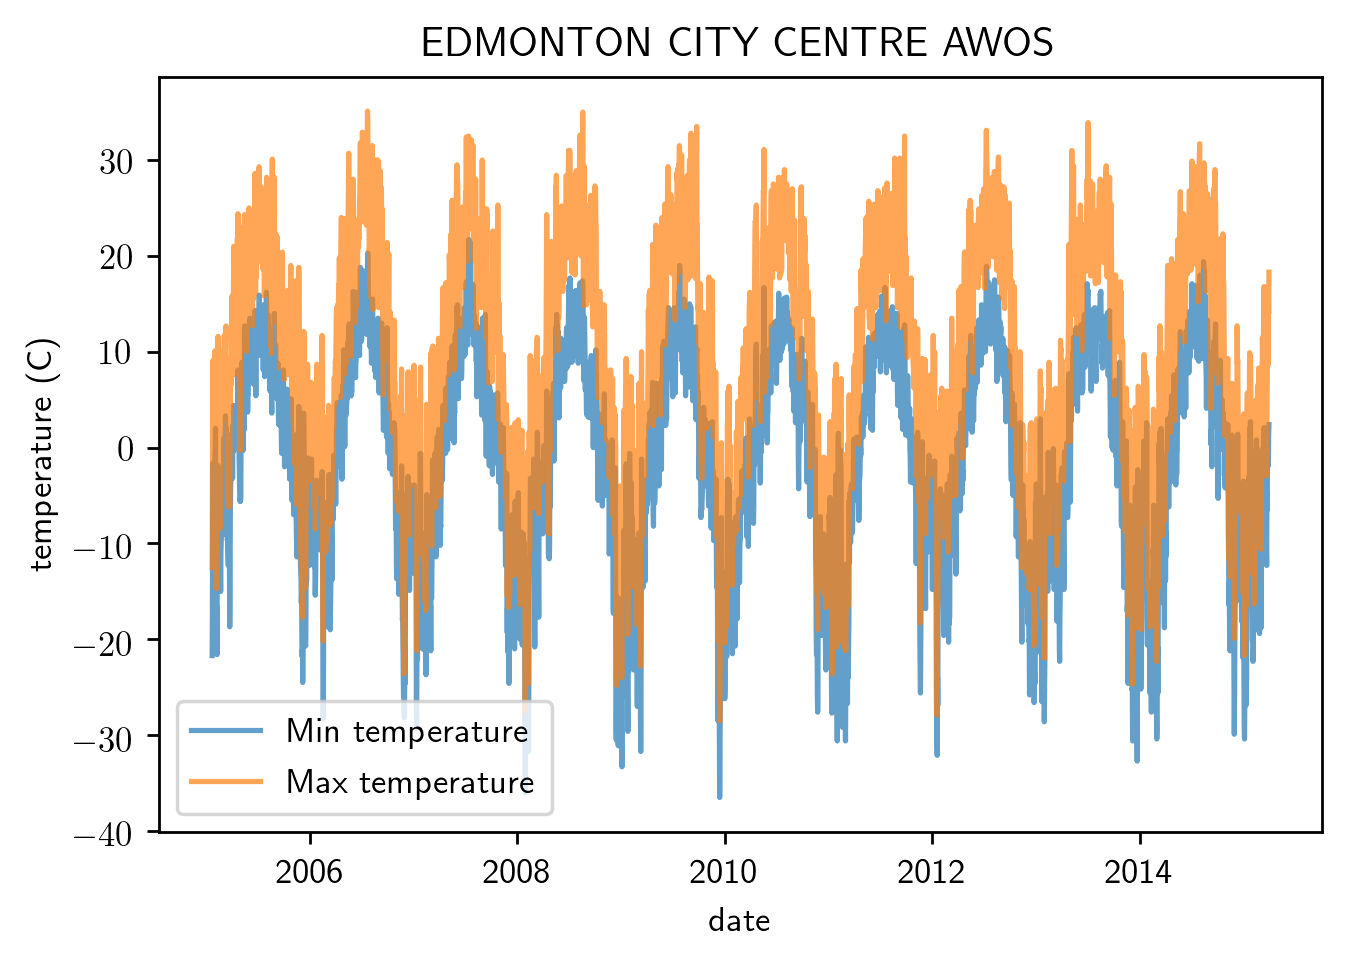

In [22]:
# Solution to Question 1.

# Imports
import matplotlib as mpl 
mpl.rc('figure',dpi=250)
mpl.rc('text',usetex=True)

import matplotlib.pyplot as plt
import numpy as np

def plot_min_max_temperature(station):
    plt.figure()
    plt.plot(station.dates,station.minT, label="Min temperature",alpha=0.7) #Plot the min temperature
    plt.plot(station.dates,station.maxT, label='Max temperature',alpha=0.7) #Plot the max temperature
    plt.title(station.name) #Title
    plt.xlabel('date') #Xlabel
    plt.ylabel('temperature (C)') #Ylabel
    plt.legend() #Legend

plot_min_max_temperature(s[1])

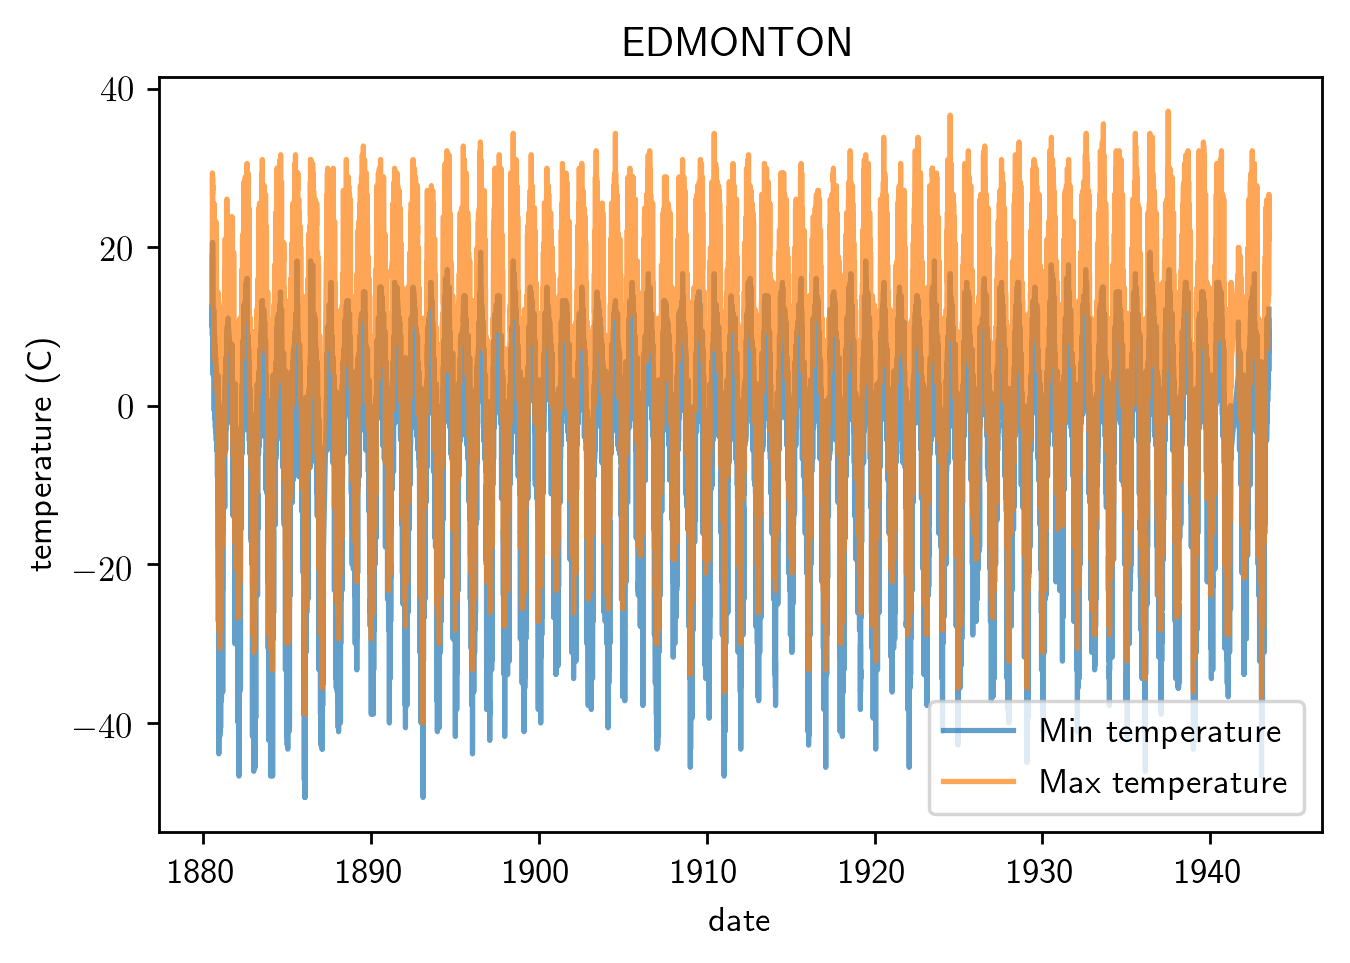

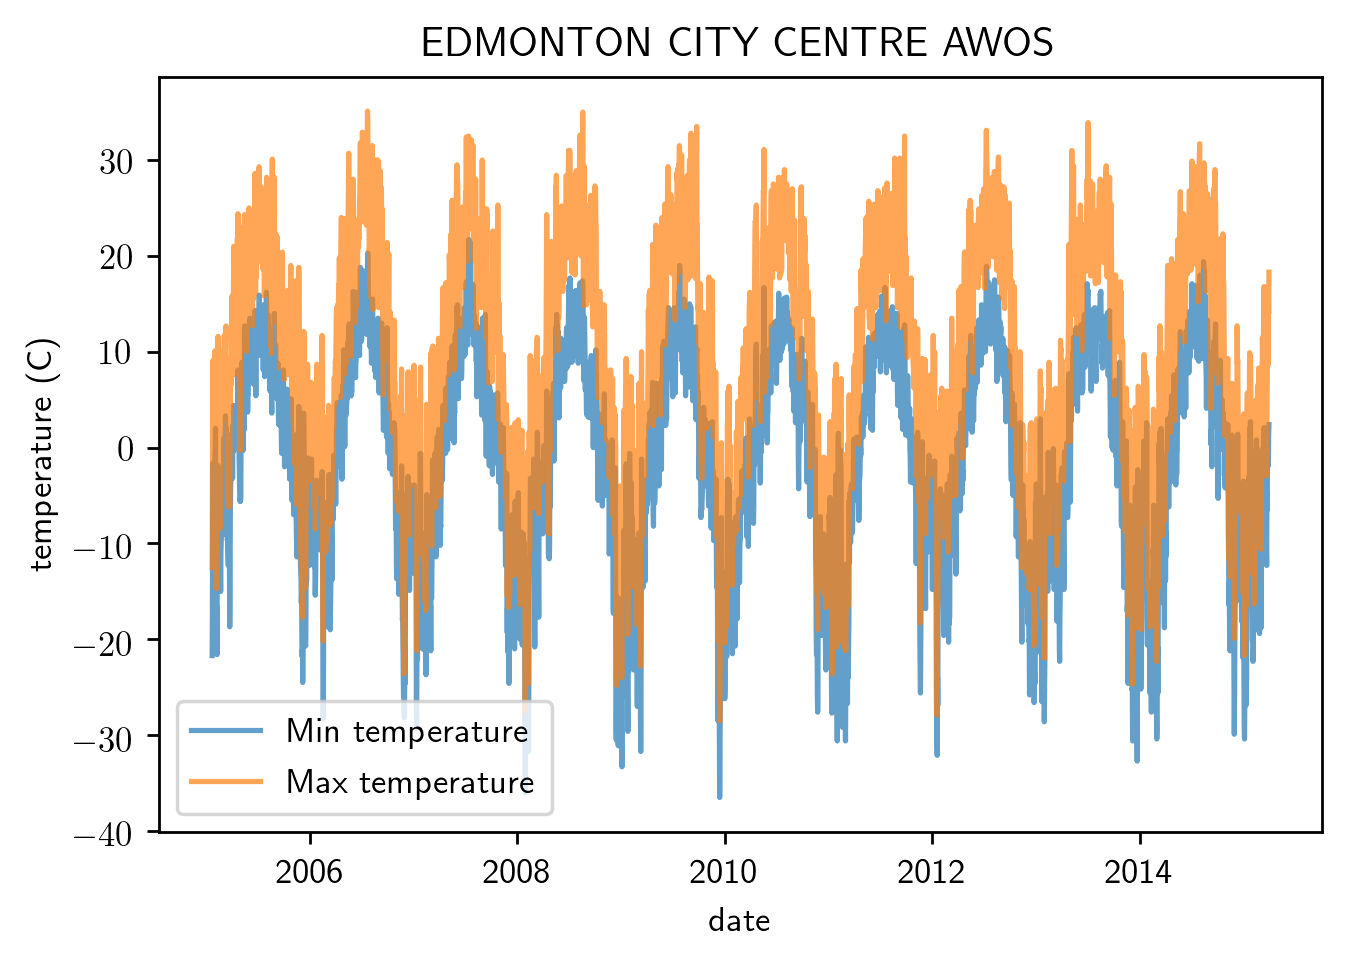

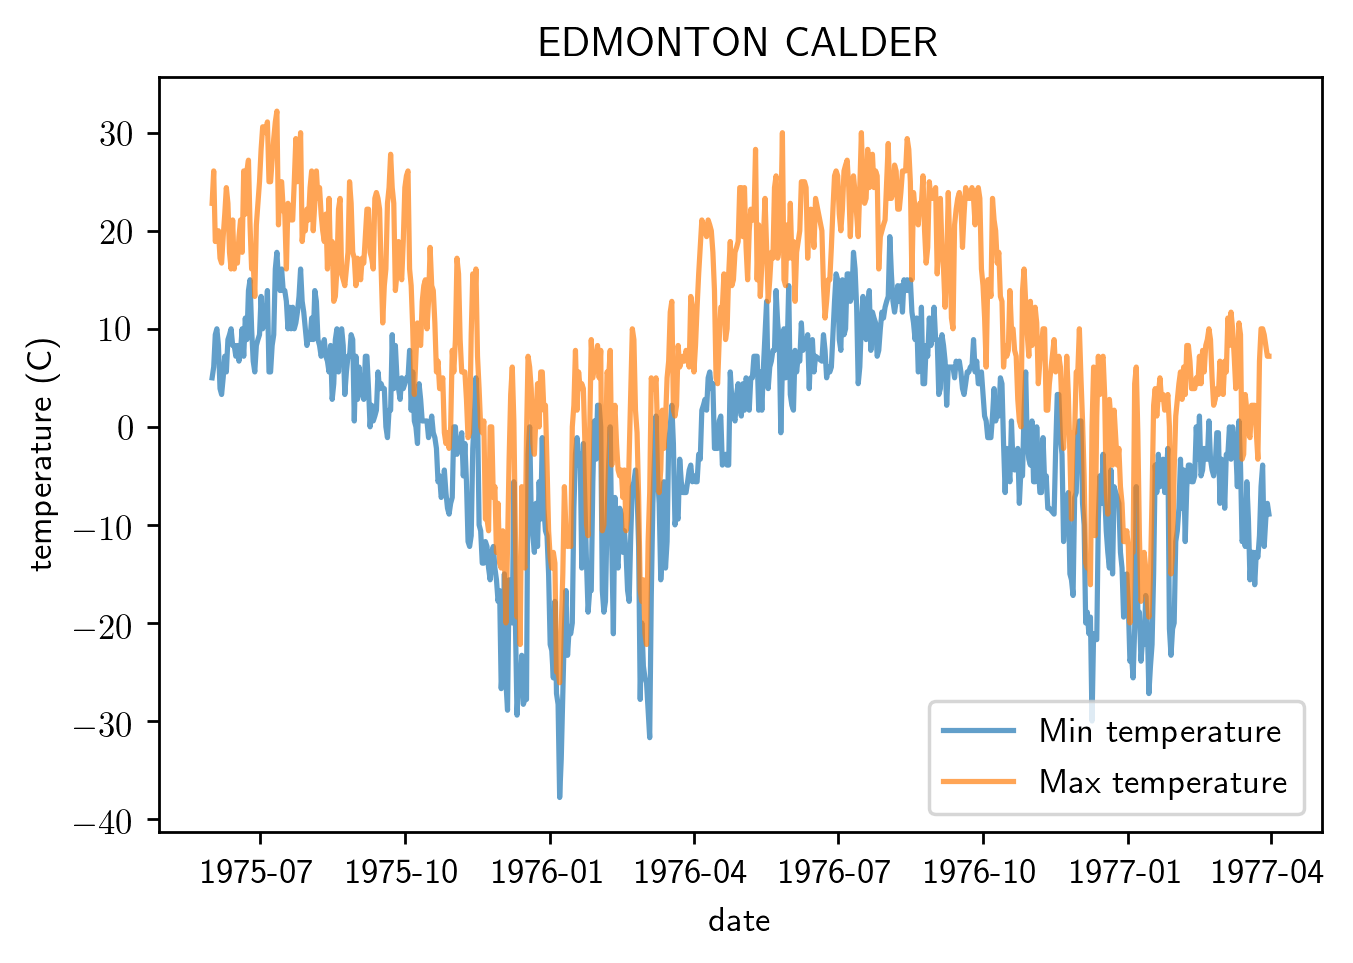

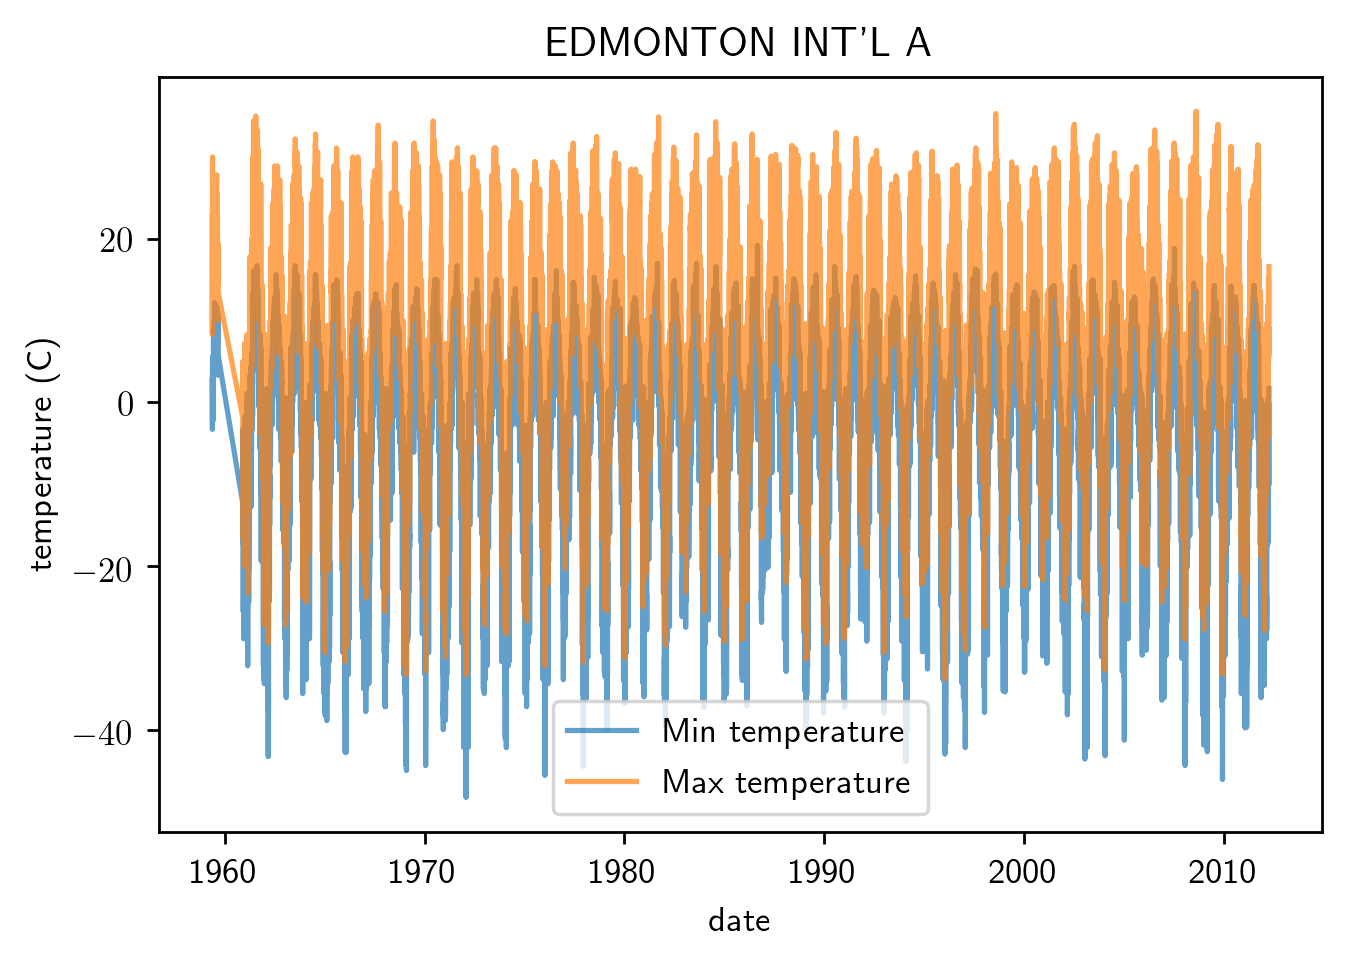

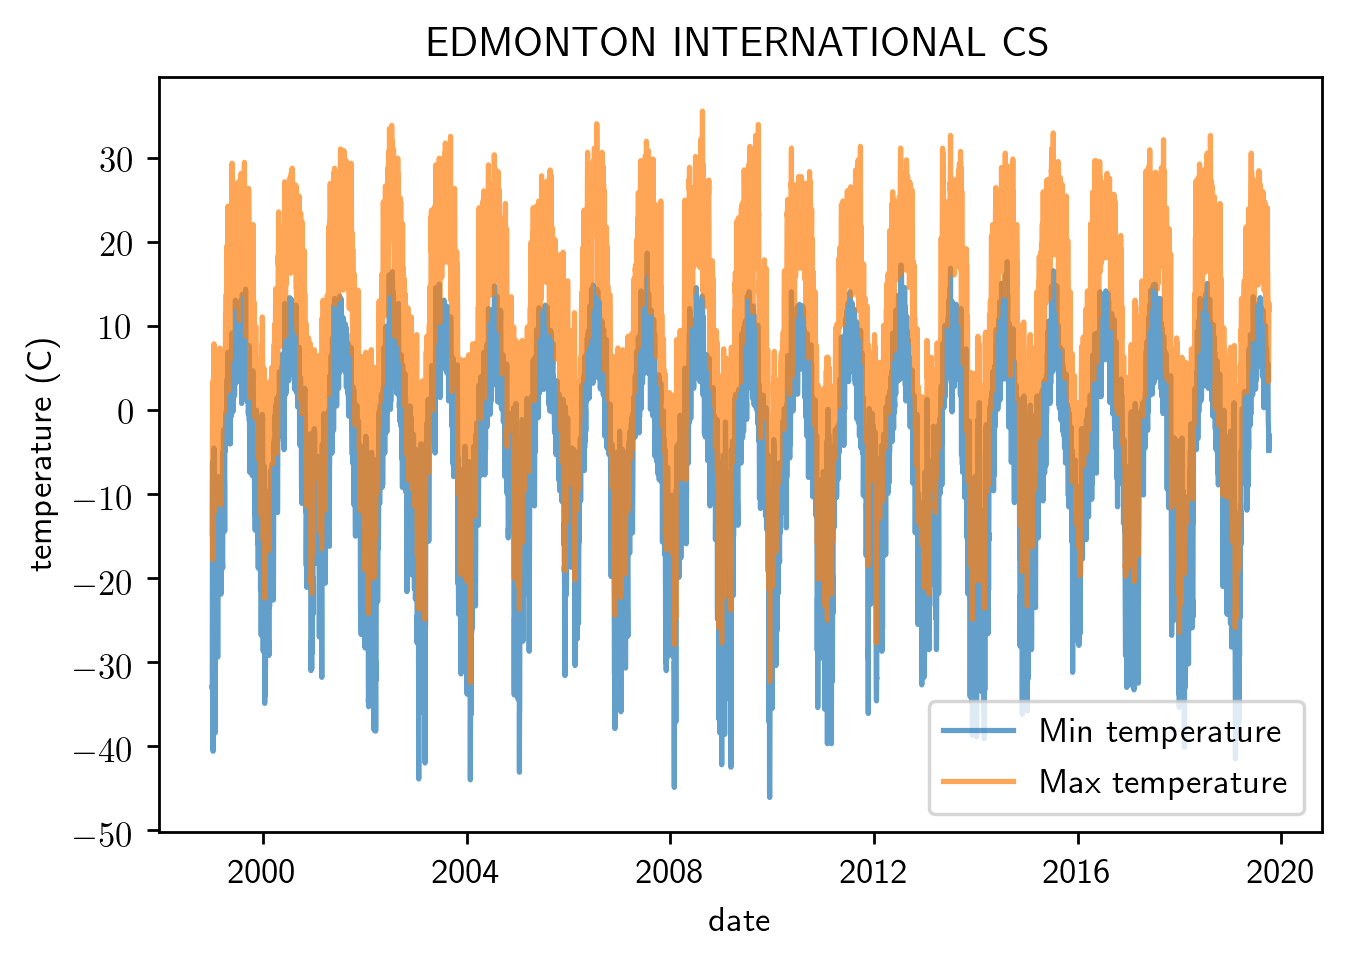

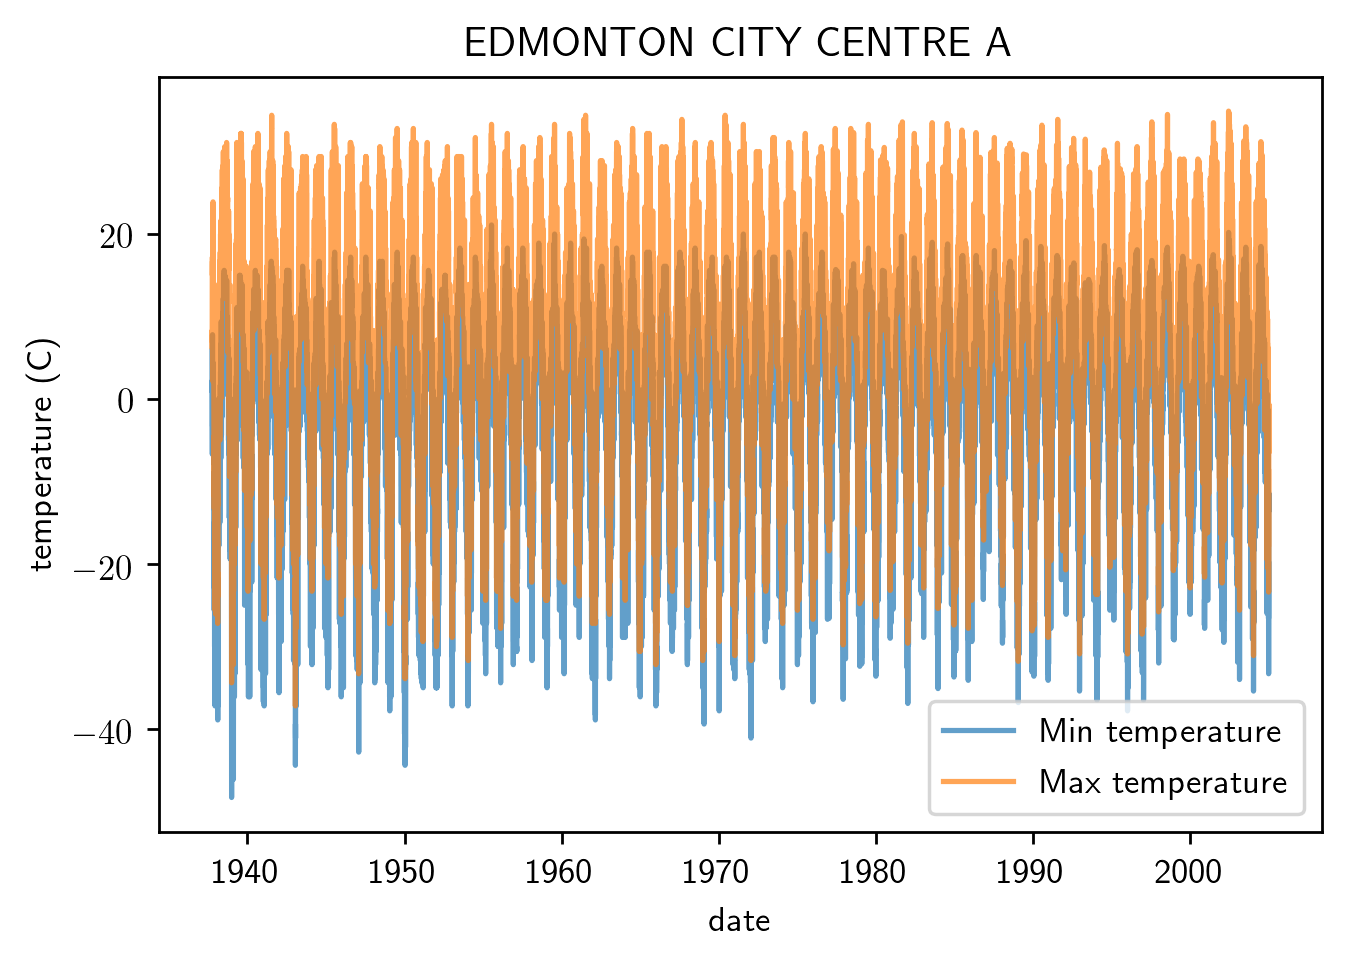

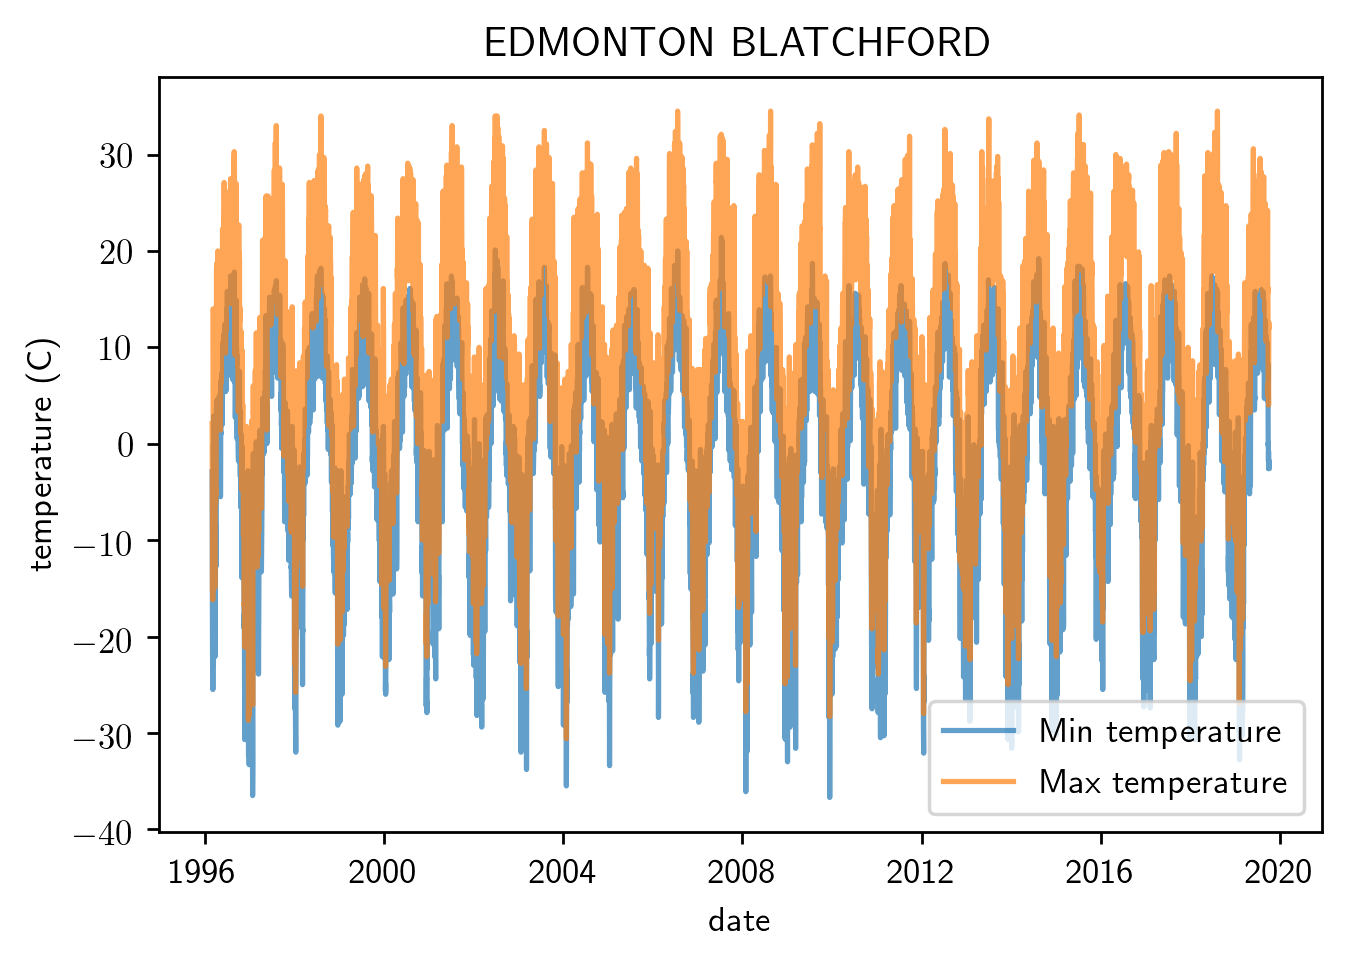

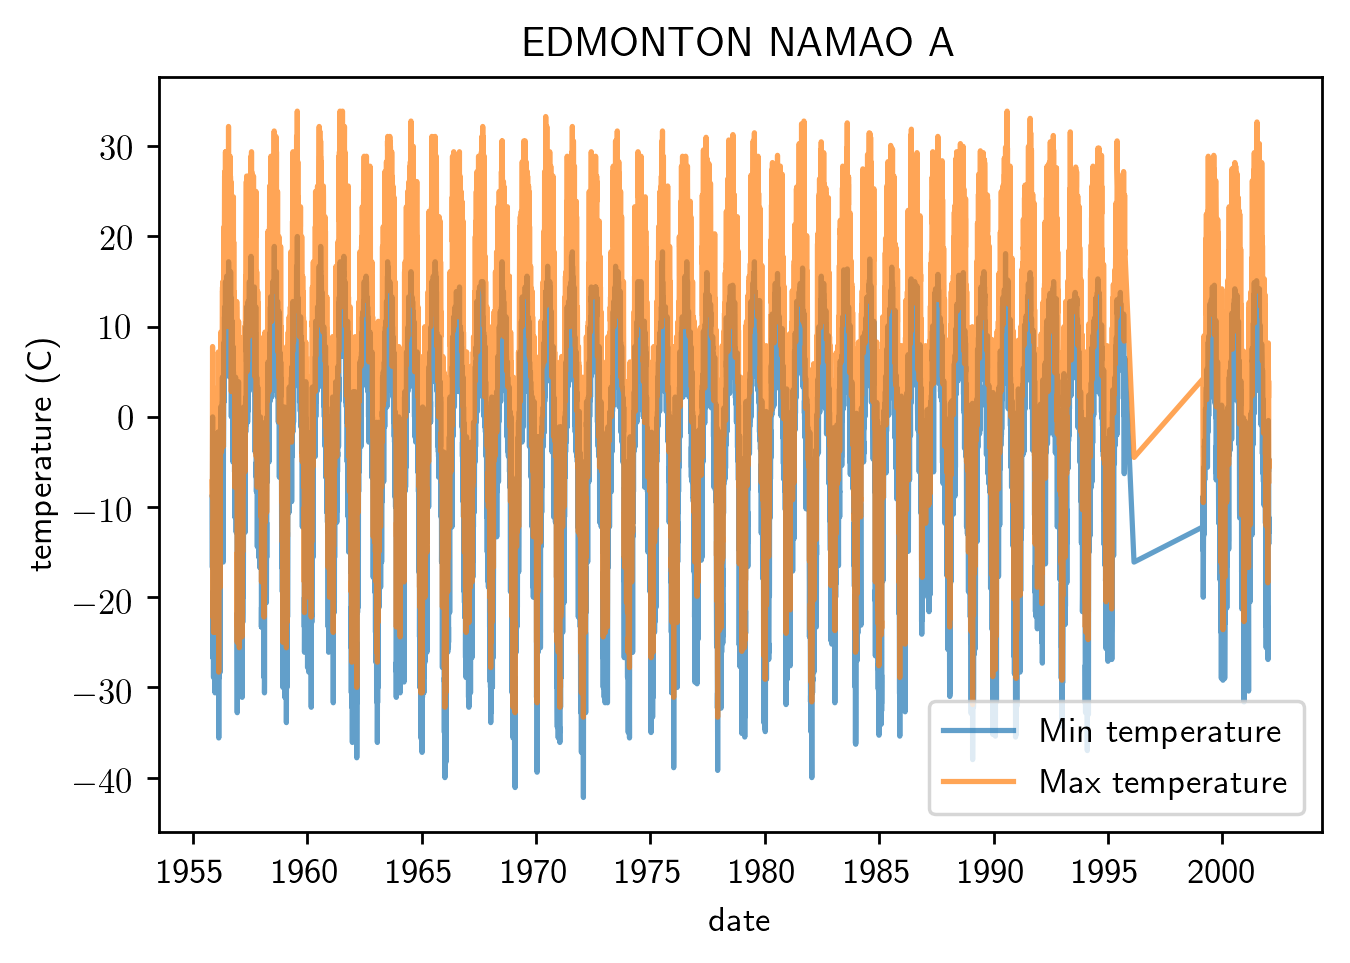

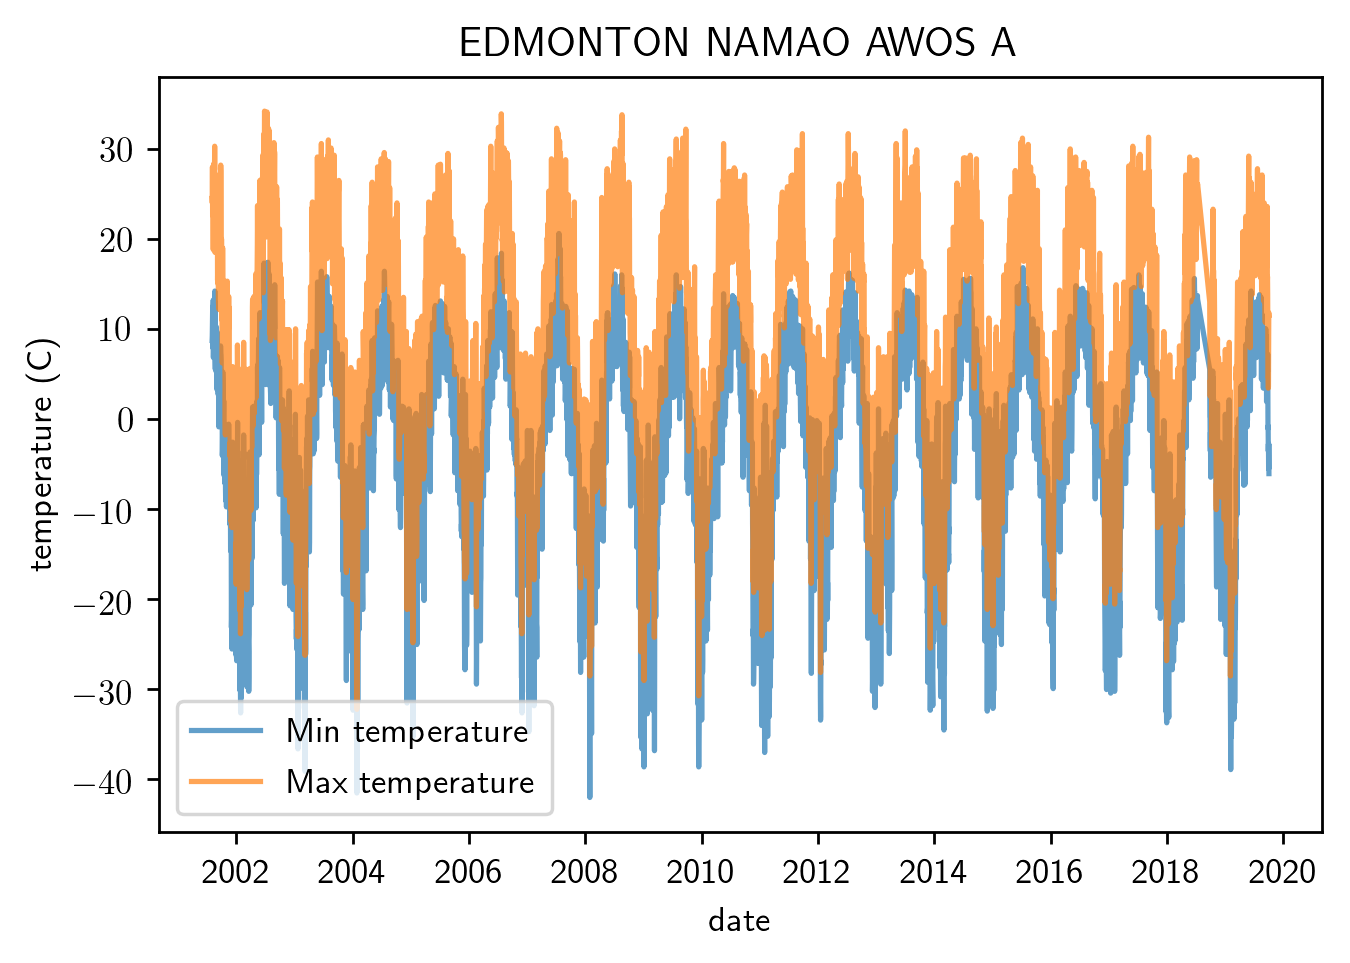

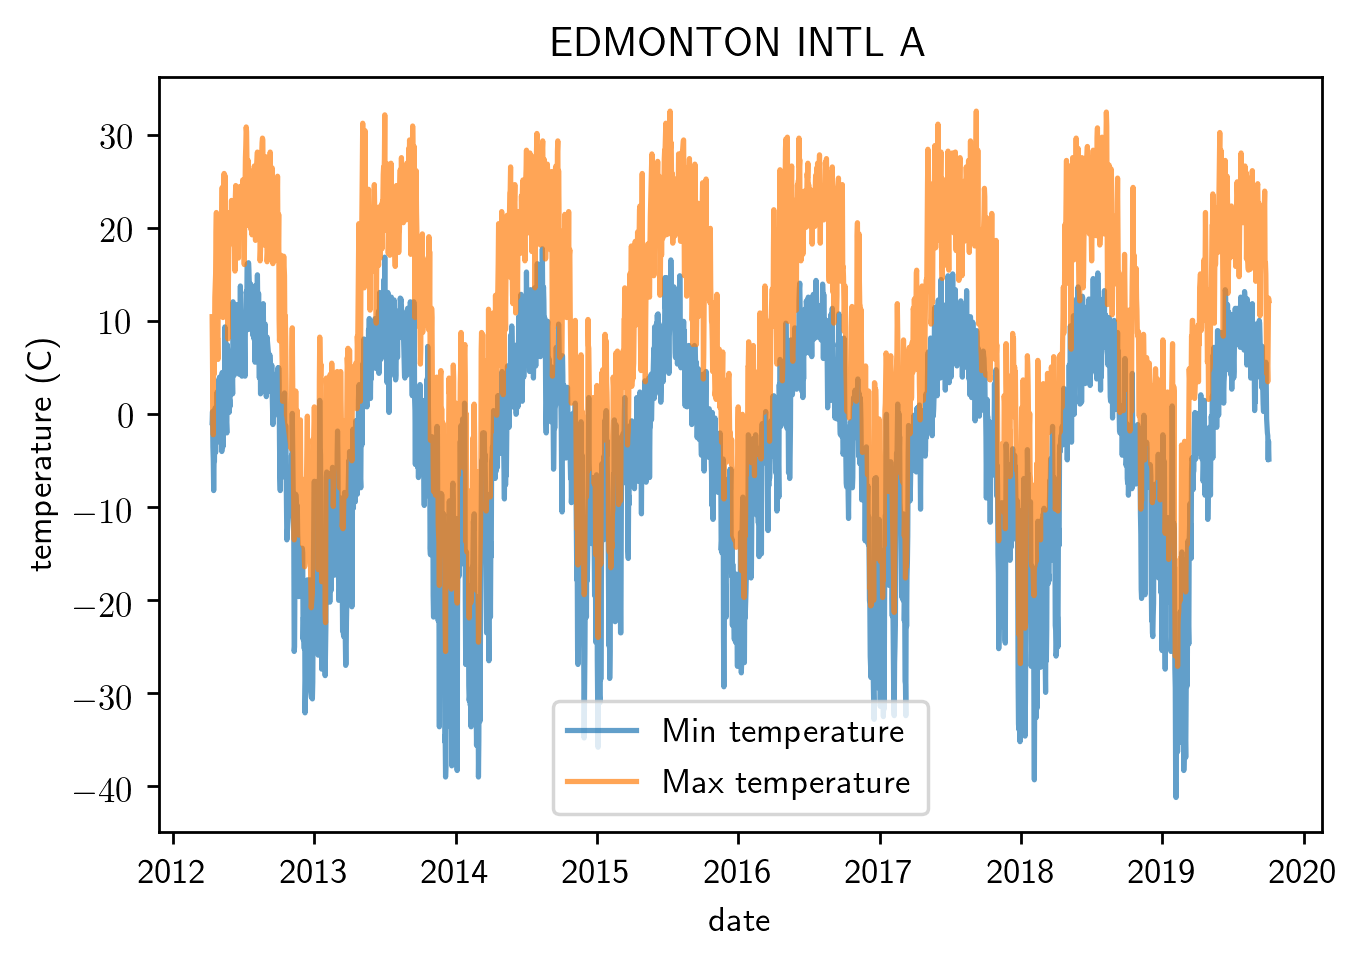

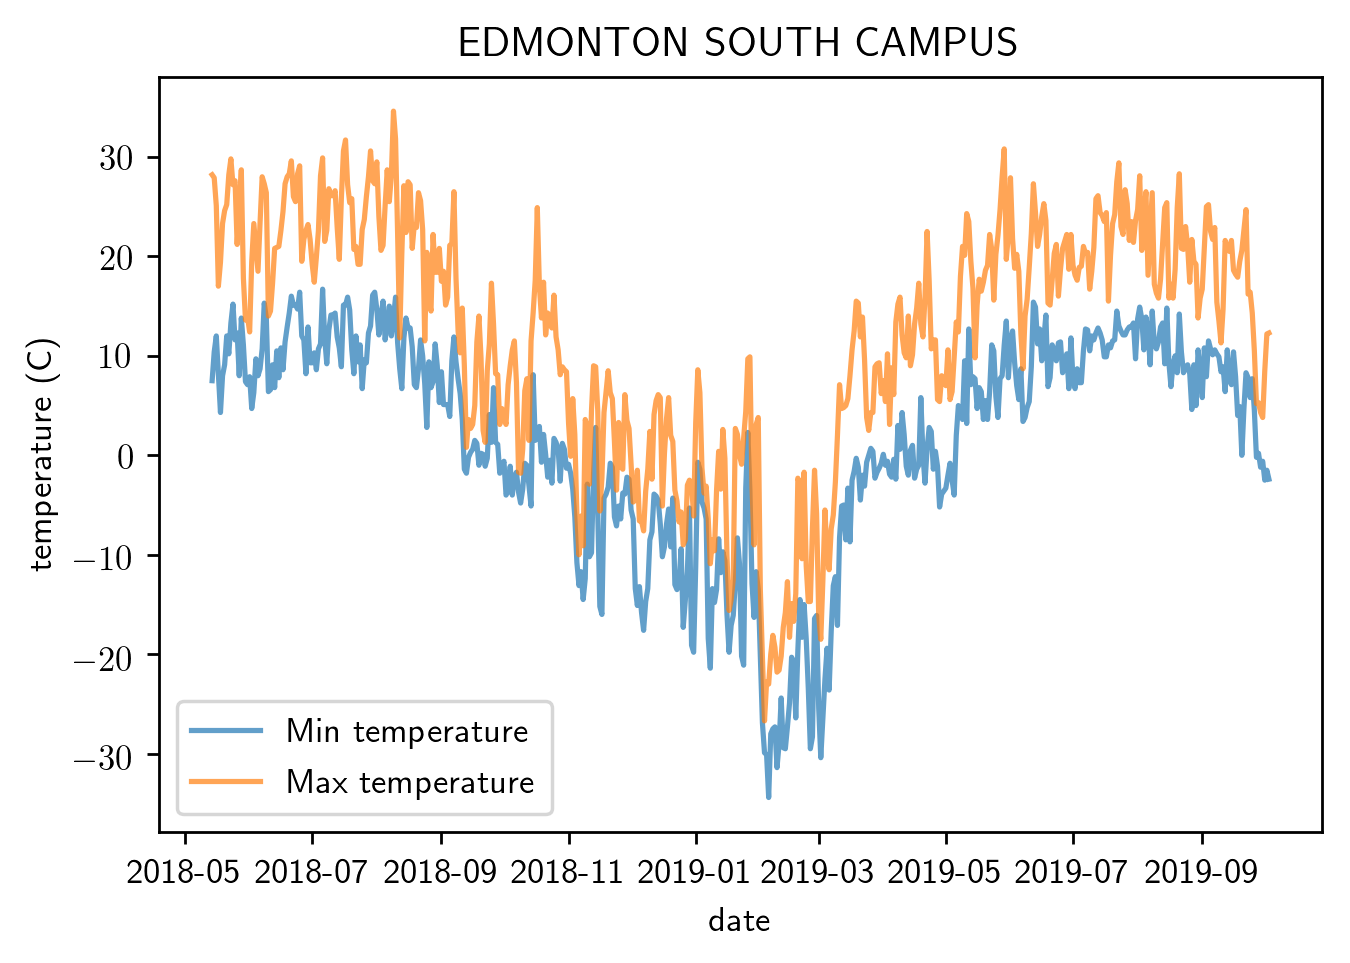

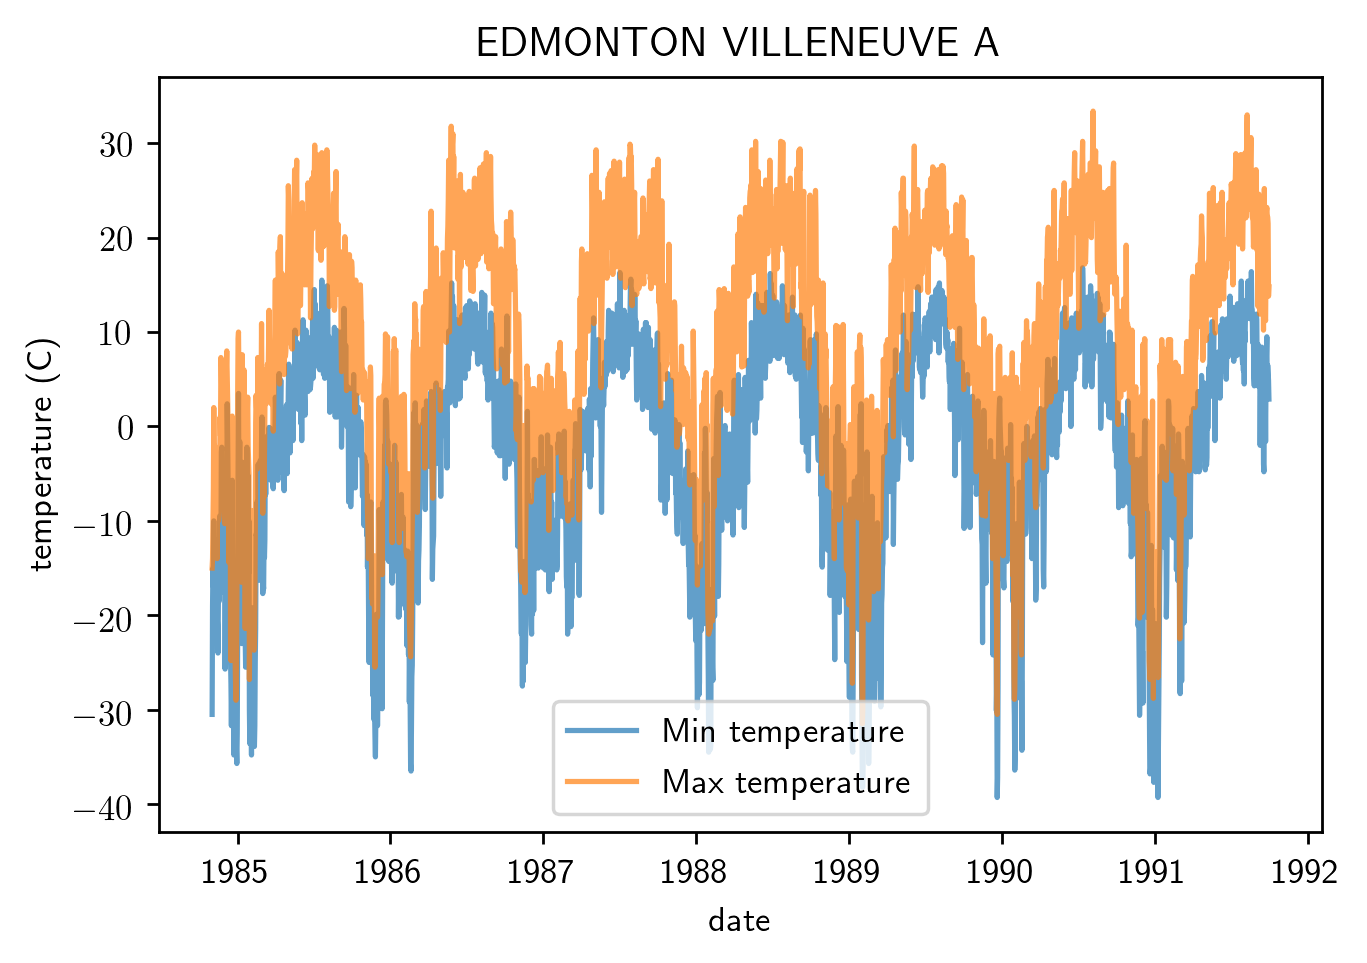

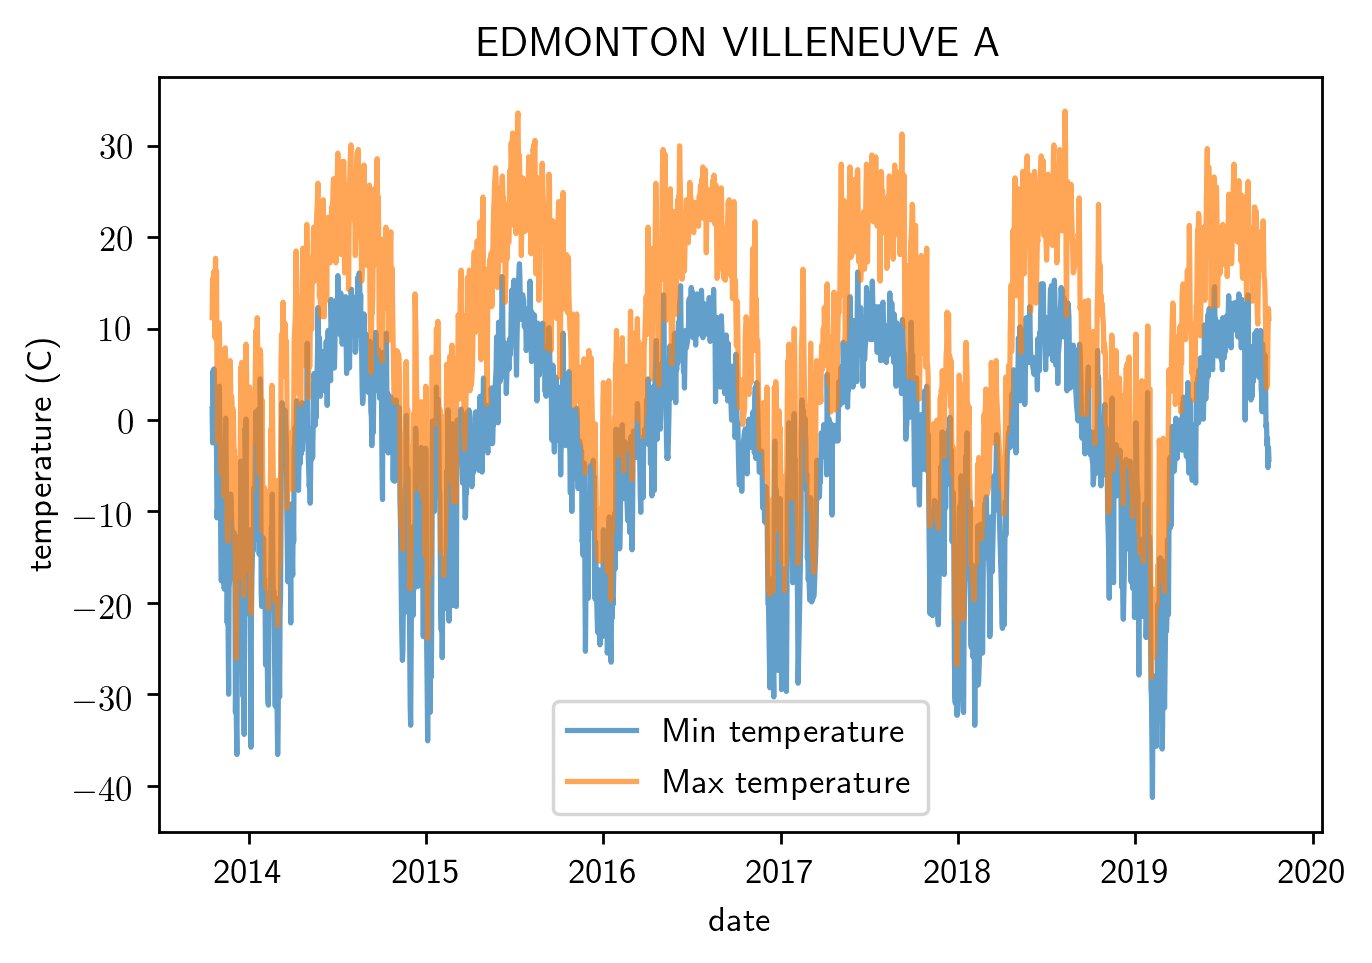

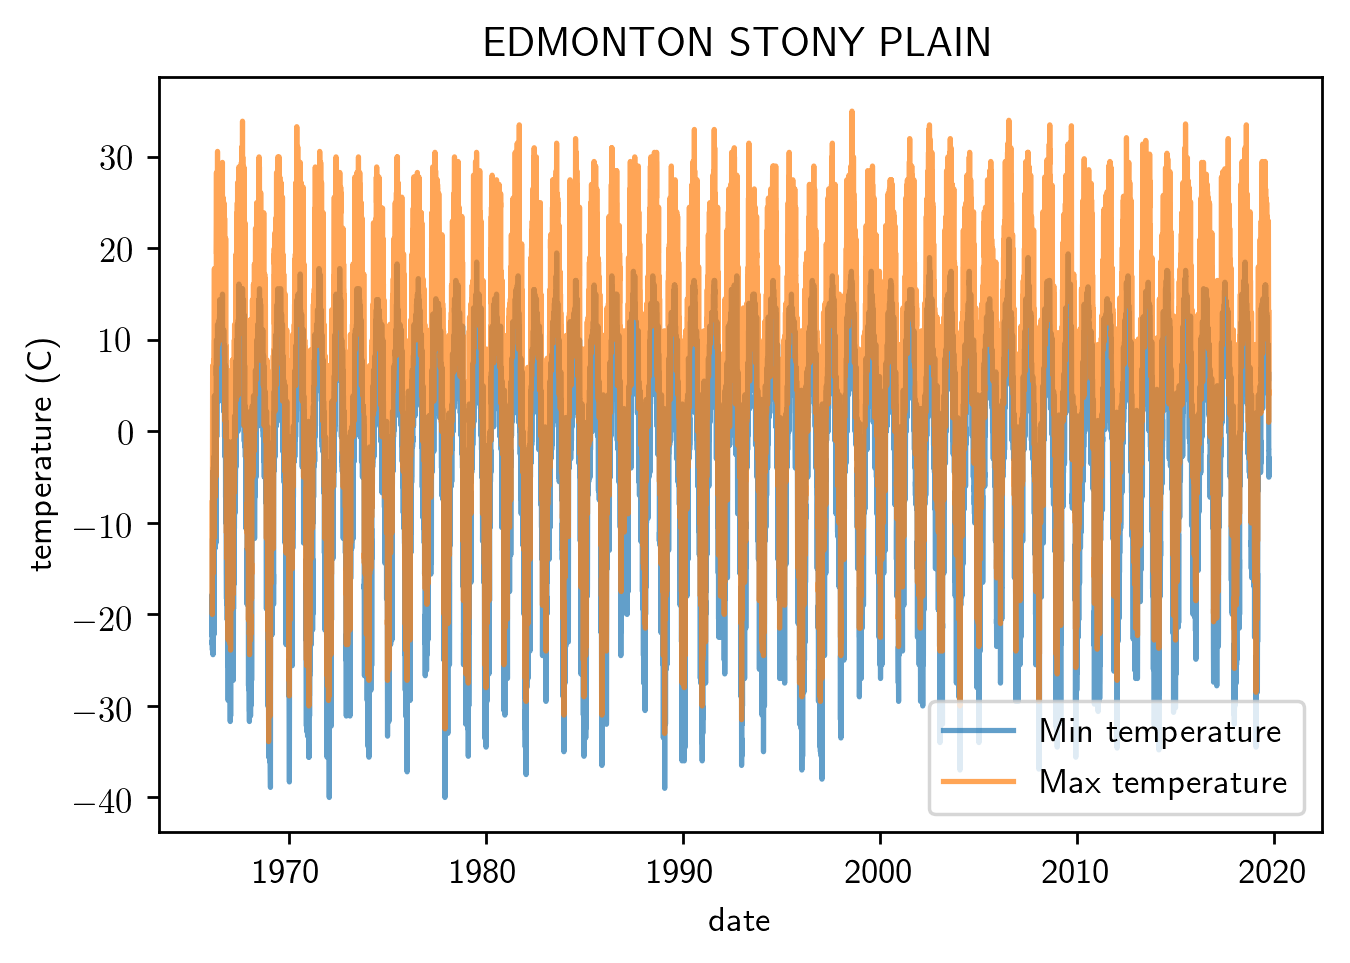

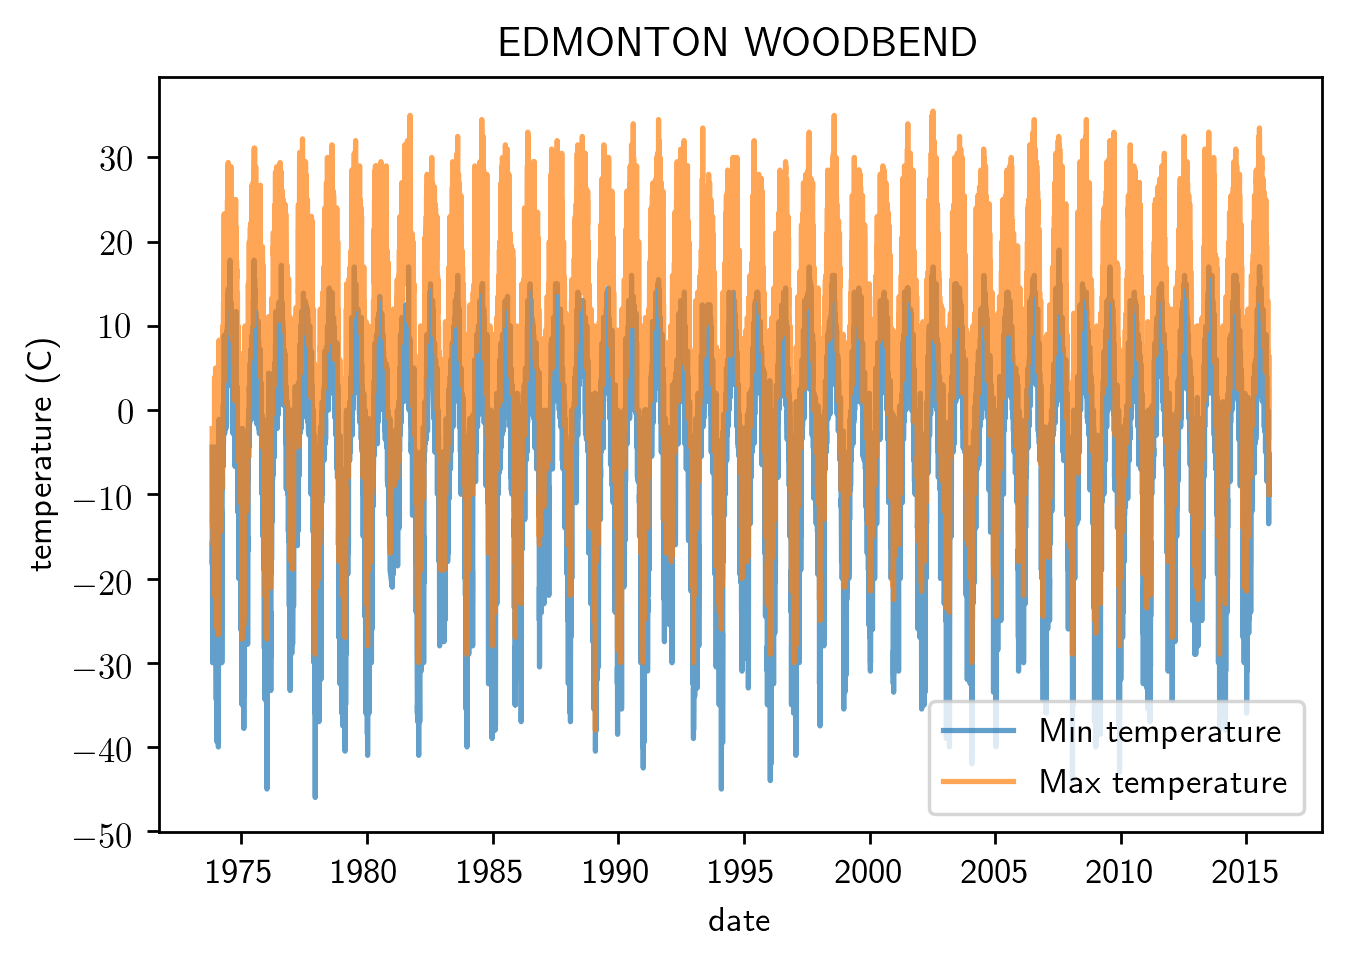

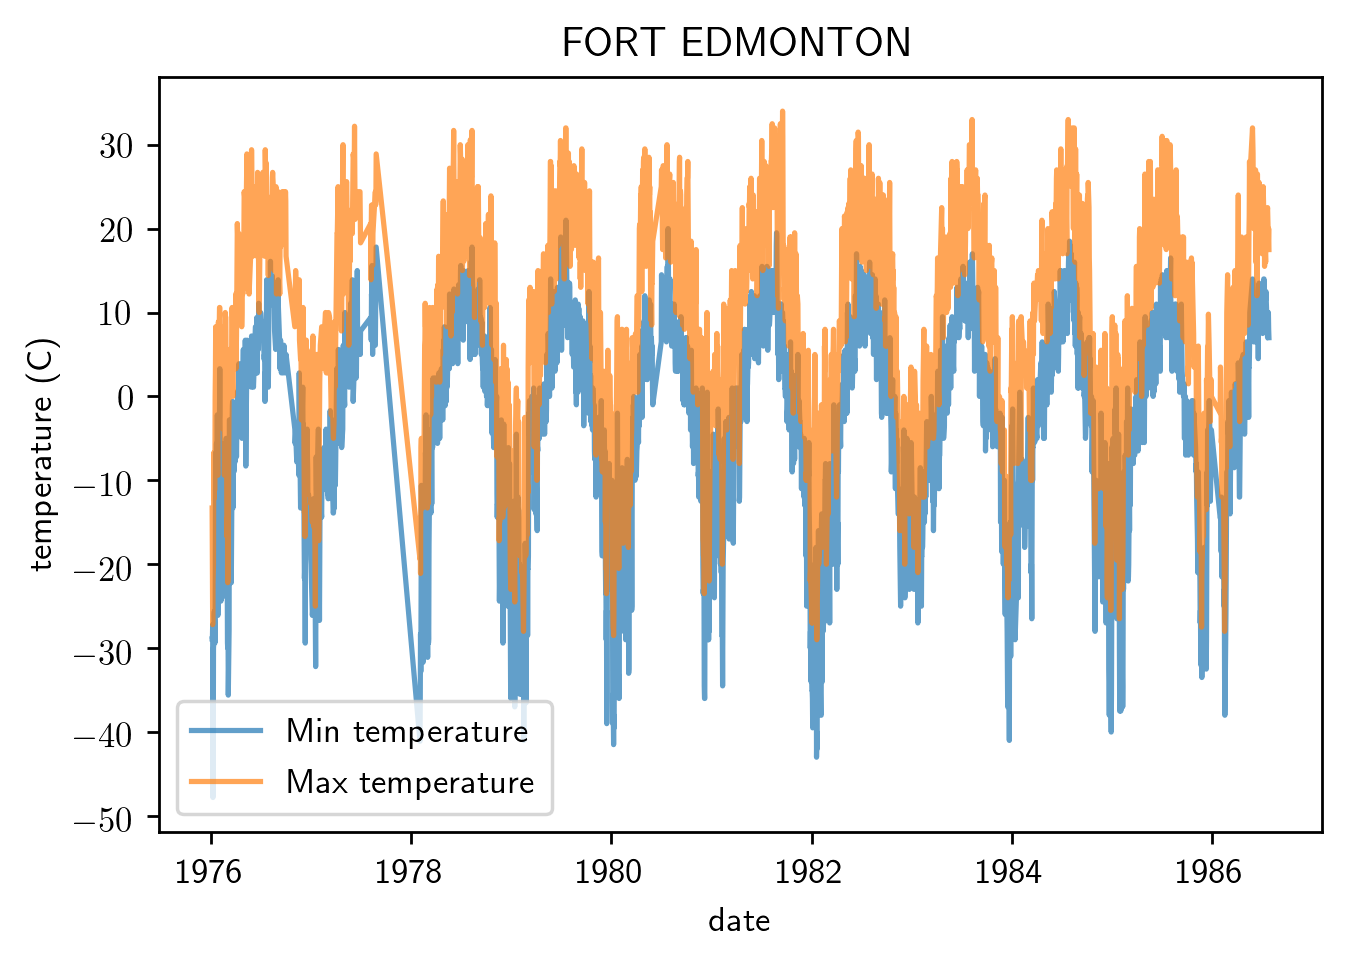

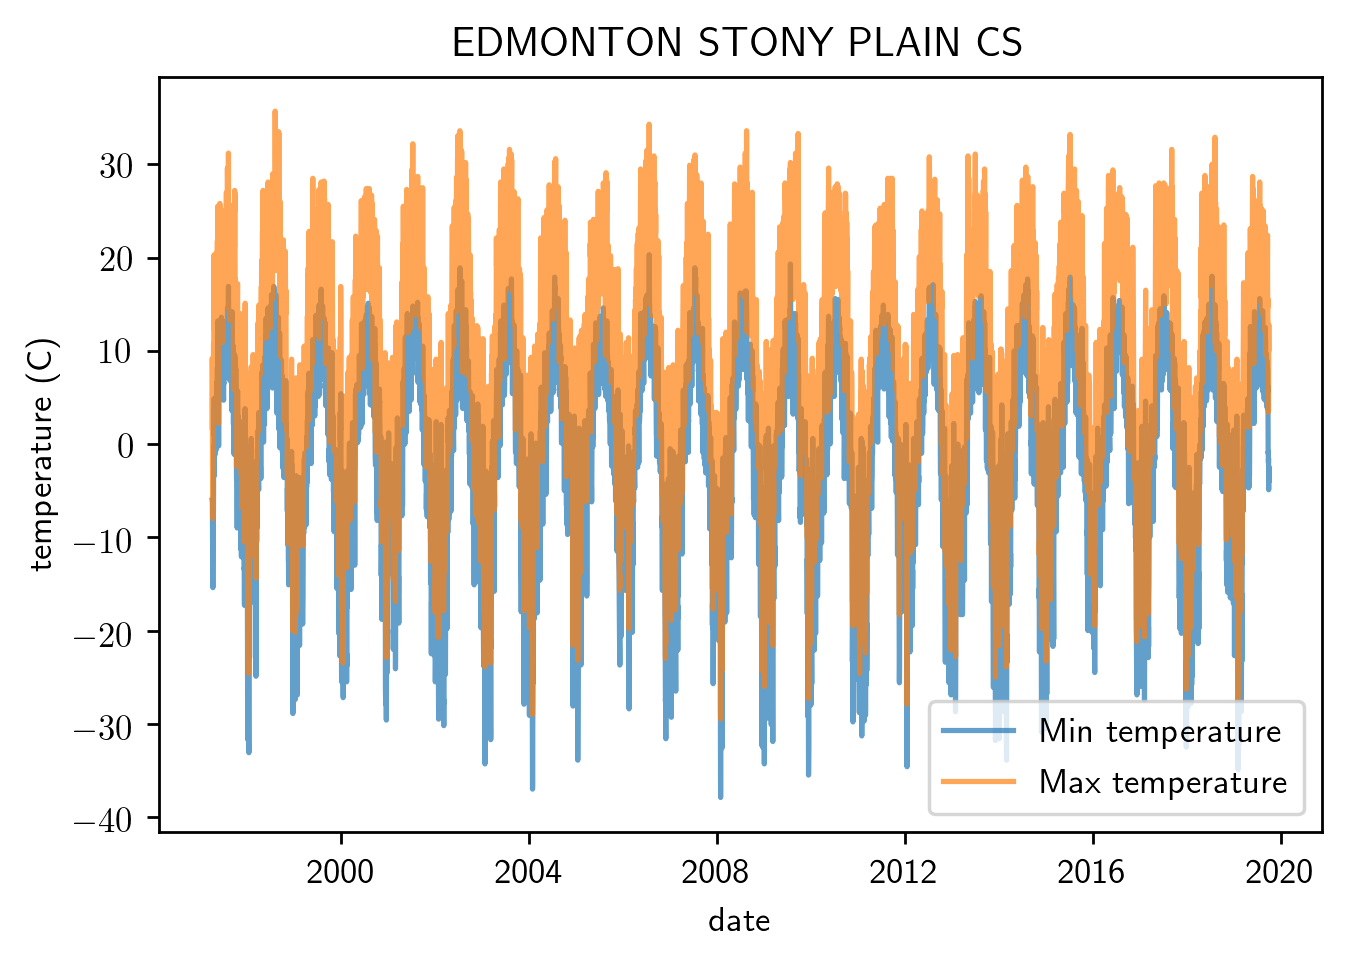

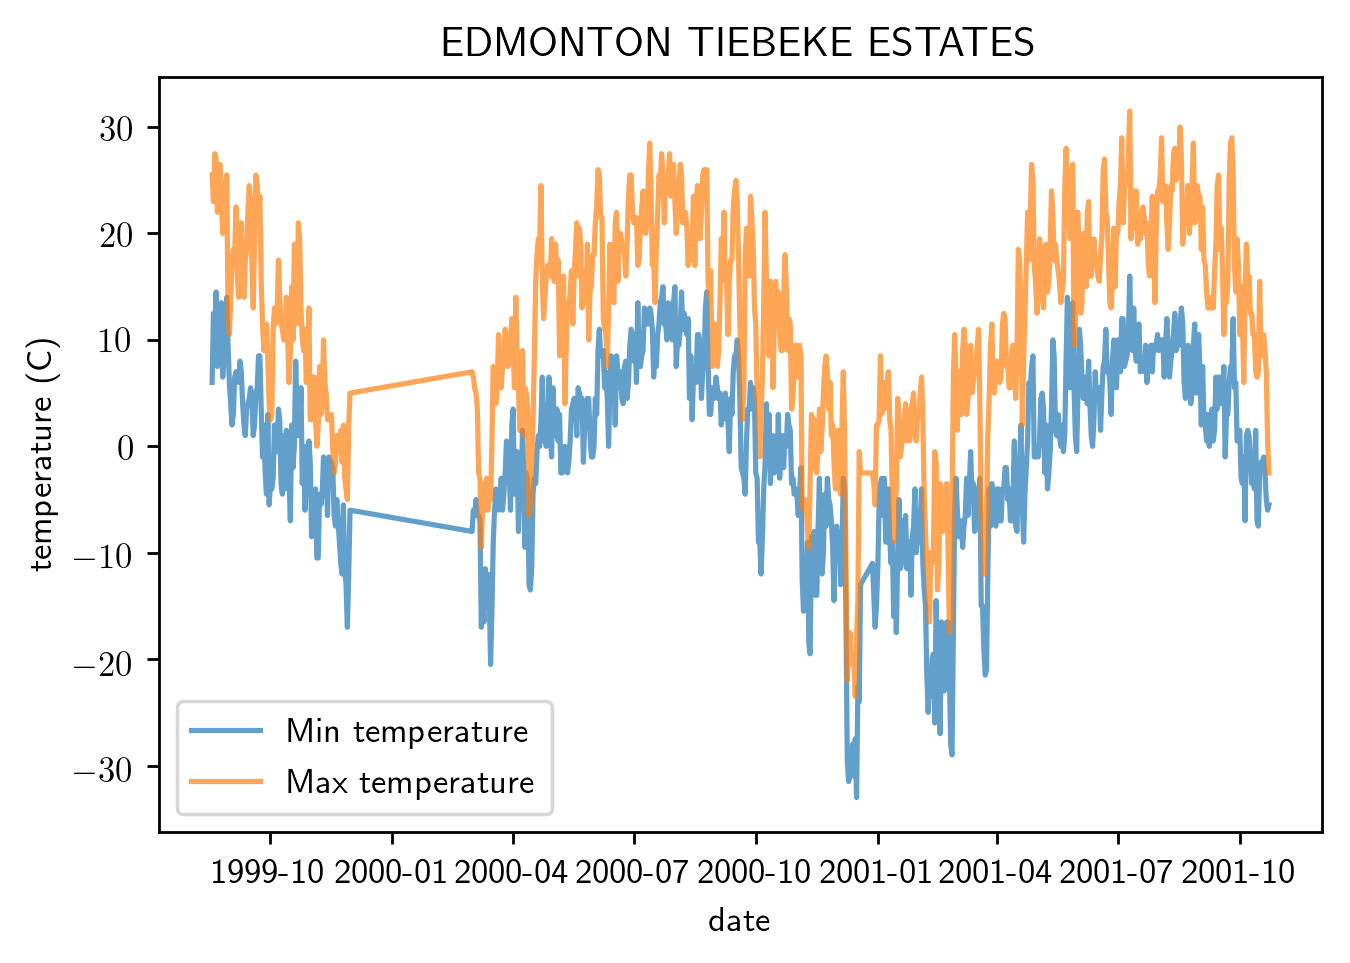

In [23]:
#In the following code, we generate over all stations. 
for stations in s:
    plot_min_max_temperature(stations)

#### Grade breakdown
- Properly read in the temperatures and dates for one station (2/2)
- Plot the temperatures with the correct axis (2/2)

##### Total (4/4)

2.  Histogram the max and min temperatures for a single station at a few dates throughout the year. Make sure the histograms have a reasonable number and range for the bins.  

In [24]:
# Solution to Question 2. 

import pandas as pd # Import

def make_dataFrame(station, index=True):
    '''
    This function converts a stations object to a pandas dataframe.
    '''
    df = pd.DataFrame([]) #Construct a pandas dataframe   
    df['minT_'+station.name] = pd.Series(station.minT) #Put the min temperature into a column 
    df['maxT_'+station.name] = pd.Series(station.maxT) #Put the max temperature into a column
    df['dates_'+station.name] = pd.Series(station.dates, dtype='datetime64[ns]') # Put the dates as the index
    df = df.set_index('dates_'+station.name)
    return df

df = make_dataFrame(s[1])
df

minT_EDMONTON CITY CENTRE AWOS  \
dates_EDMONTON CITY CENTRE AWOS                                   
2005-01-21                                                -21.7   
2005-01-22                                                -17.3   
2005-01-23                                                 -6.6   
2005-01-24                                                 -1.6   
2005-01-25                                                 -7.3   
2005-01-26                                                -11.1   
2005-01-27                                                 -5.6   
2005-01-28                                                 -9.6   
2005-01-29                                                 -9.0   
2005-01-30                                                 -4.3   
2005-01-31                                                 -0.9   
2005-02-01                                                 -0.2   
2005-02-02                                                  2.0   
2005-02-03                                                -11.2   
2005-02-04                                                -15.6   
2005-02-05                                                -16.3   
2005-02-06                                                -16.7   
2005-02-07                                                -21.6   
2005-02-08                                                -13.6   
2005-02-09                                                 -9.6   
2005-02-10                                                 -4.9   
2005-02-11                                                 -1.9   
2005-02-12                                                 -5.1   
2005-02-13                                                 -8.8   
2005-02-14                                                -12.1   
2005-02-15                                                -12.7   
2005-02-16                                                -14.6   
2005-02-17                                                -10.1   
2005-02-18                                                -13.5   
2005-02-19                                                -12.1   
...                                                         ...   
2015-03-02                                                -15.8   
2015-03-03                                                -18.8   
2015-03-04                                                -18.7   
2015-03-05                                                 -7.8   
2015-03-06                                                 -0.2   
2015-03-07                                                 -1.4   
2015-03-08                                                 -2.0   
2015-03-09                                                 -0.9   
2015-03-10                                                 -1.4   
2015-03-11                                                 -0.3   
2015-03-12                                                 -1.1   
2015-03-13                                                  0.3   
2015-03-14                                                  2.1   
2015-03-15                                                 -1.8   
2015-03-16                                                 -5.8   
2015-03-17                                                 -5.5   
2015-03-18                                                 -2.4   
2015-03-19                                                 -2.4   
2015-03-20                                                 -4.1   
2015-03-21                                                 -6.2   
2015-03-22                                                -10.4   
2015-03-23                                                -12.3   
2015-03-24                                                 -4.7   
2015-03-25                                                 -6.5   
2015-03-26                                                  0.9   
2015-03-27                                                 -0.9   
2015-03-28                                                  1.1   
2015-03-29   

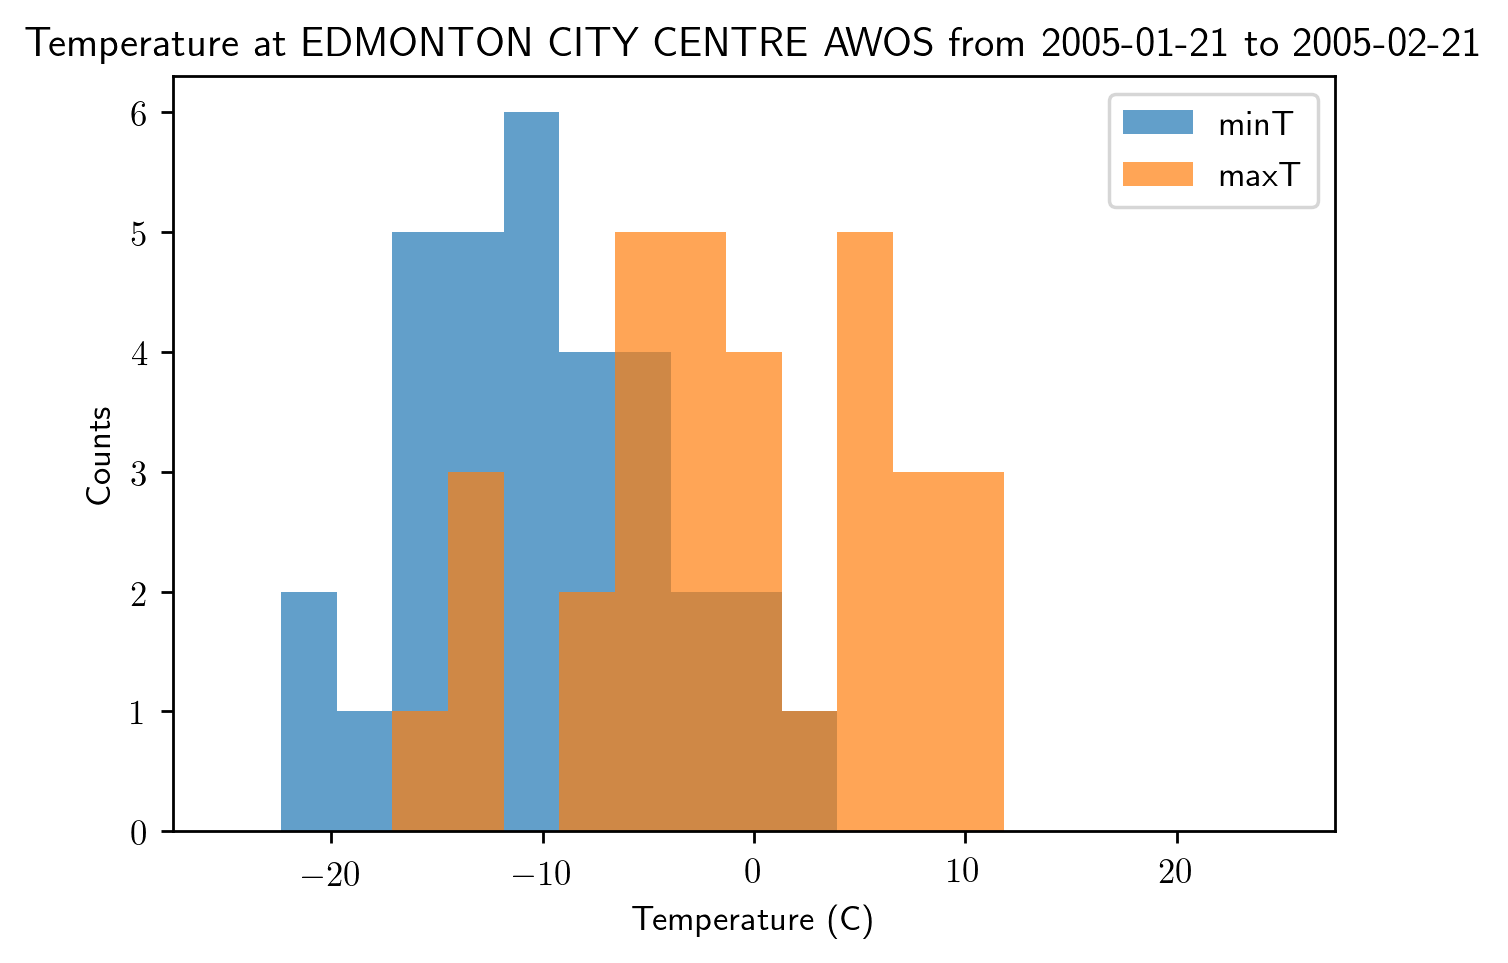

In [25]:
# Solution to Question 2 continued.

def plot_histogram(station):
    df = make_dataFrame(station) #Convert a station into a dataframe.
    df_2005_2006 = df['2005-01-21':'2005-02-21'] #Our few dates will one month
    
    bins = np.linspace(-25,25,num=20) # Bins
    
    plt.figure()
    plt.title('Temperature at '+station.name+' from 2005-01-21 to 2005-02-21')
    plt.ylabel('Counts')
    plt.xlabel('Temperature (C)')
    plt.hist(df_2005_2006['minT_'+station.name],label='minT', alpha=0.7,bins=bins) #Plot the Minimum temperature
    plt.hist(df_2005_2006['maxT_'+station.name],label='maxT', alpha=0.7,bins=bins) #Plot the Maximum temperature
    plt.legend()
    
plot_histogram(s[1])

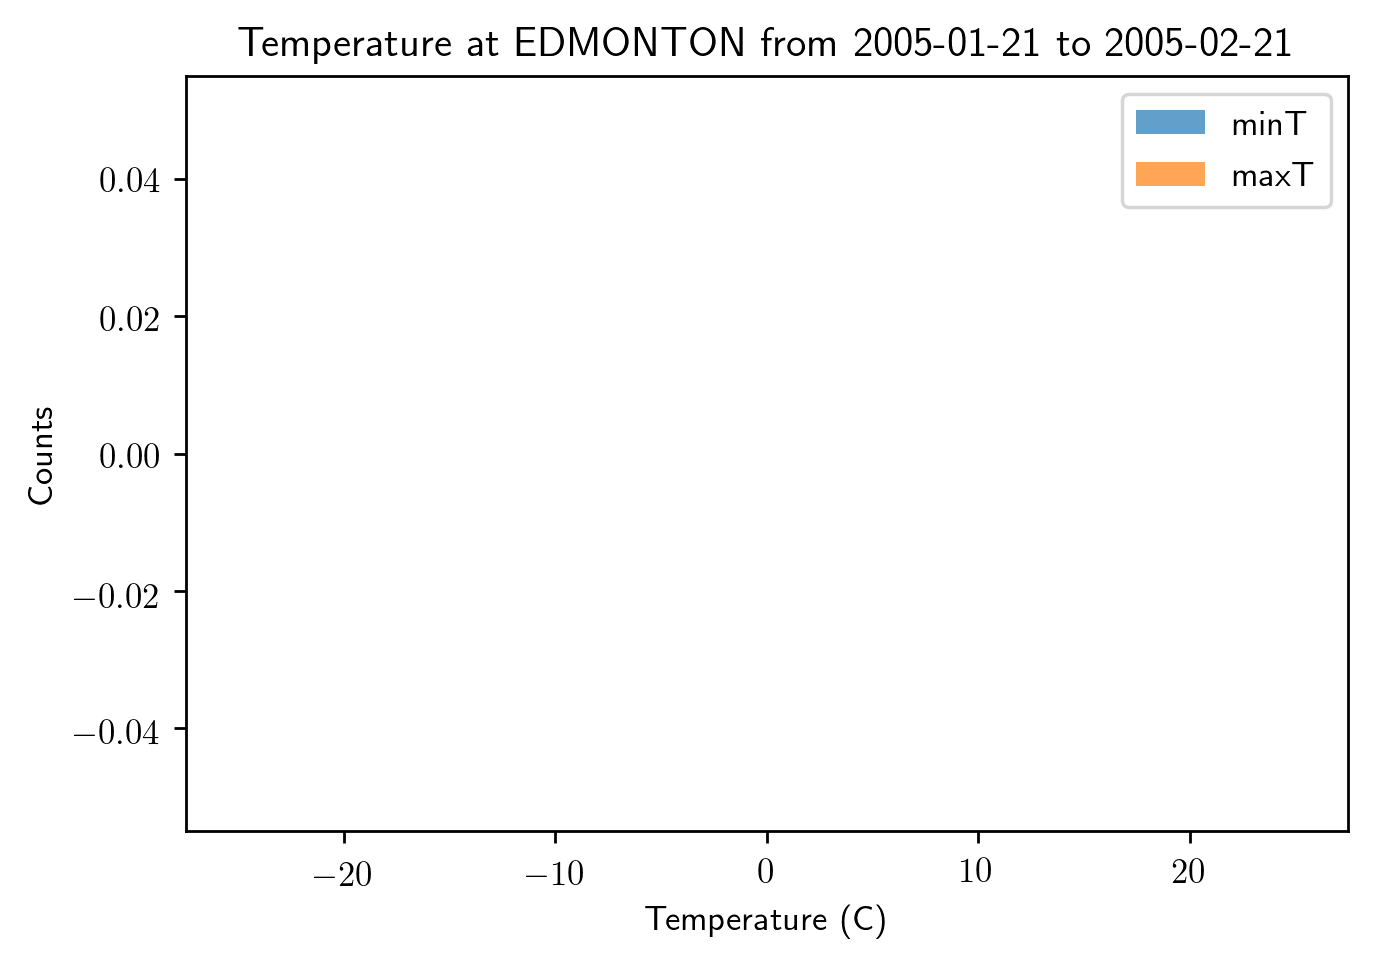

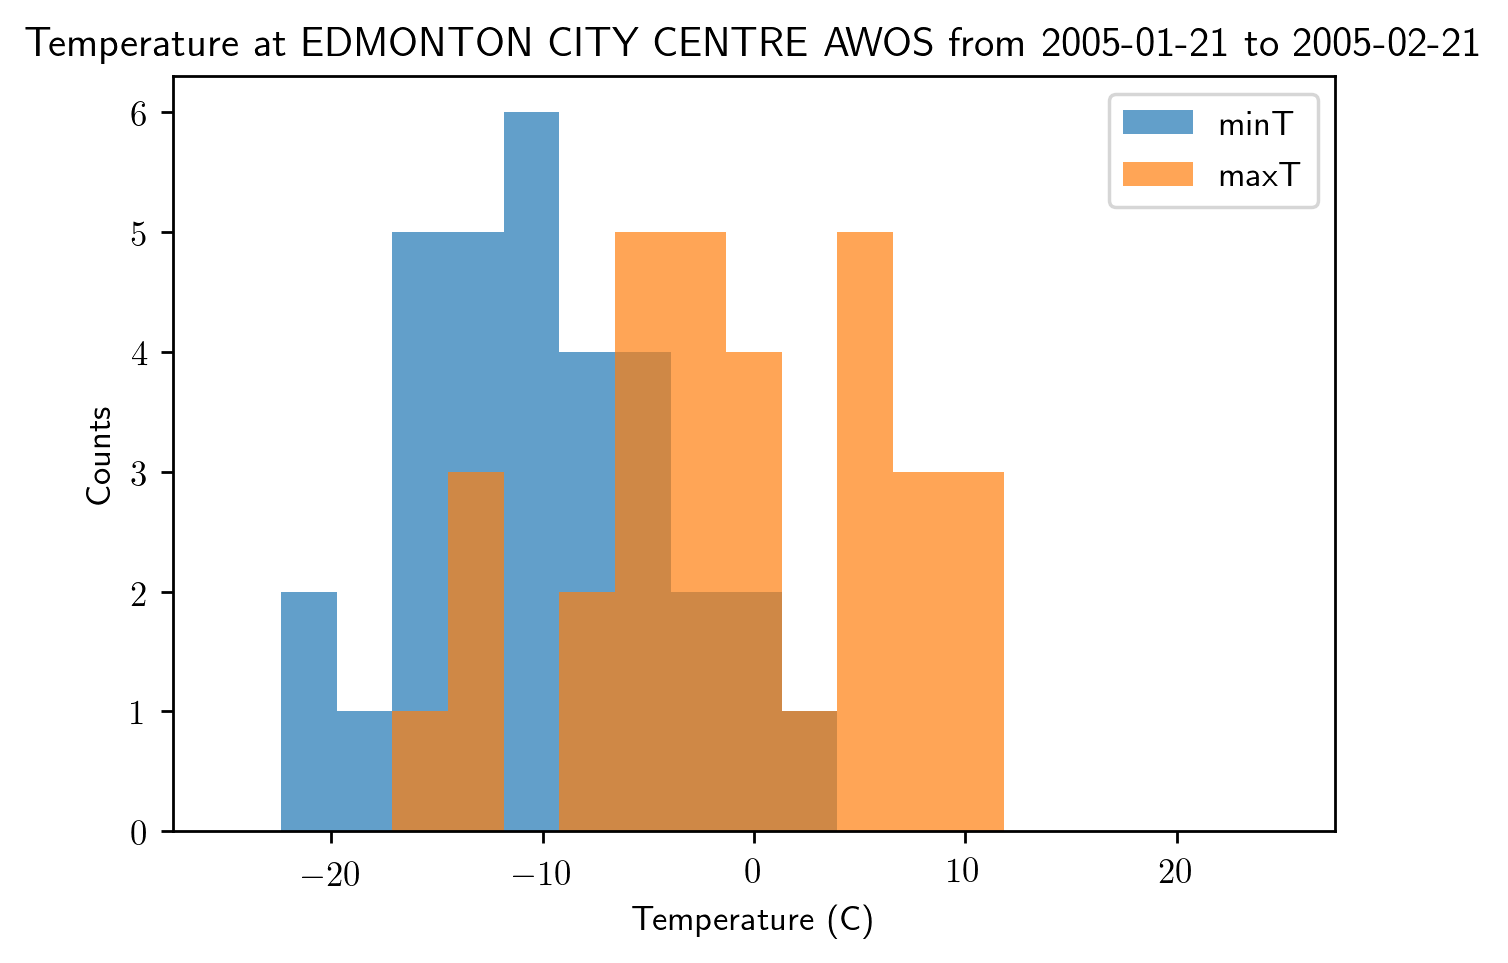

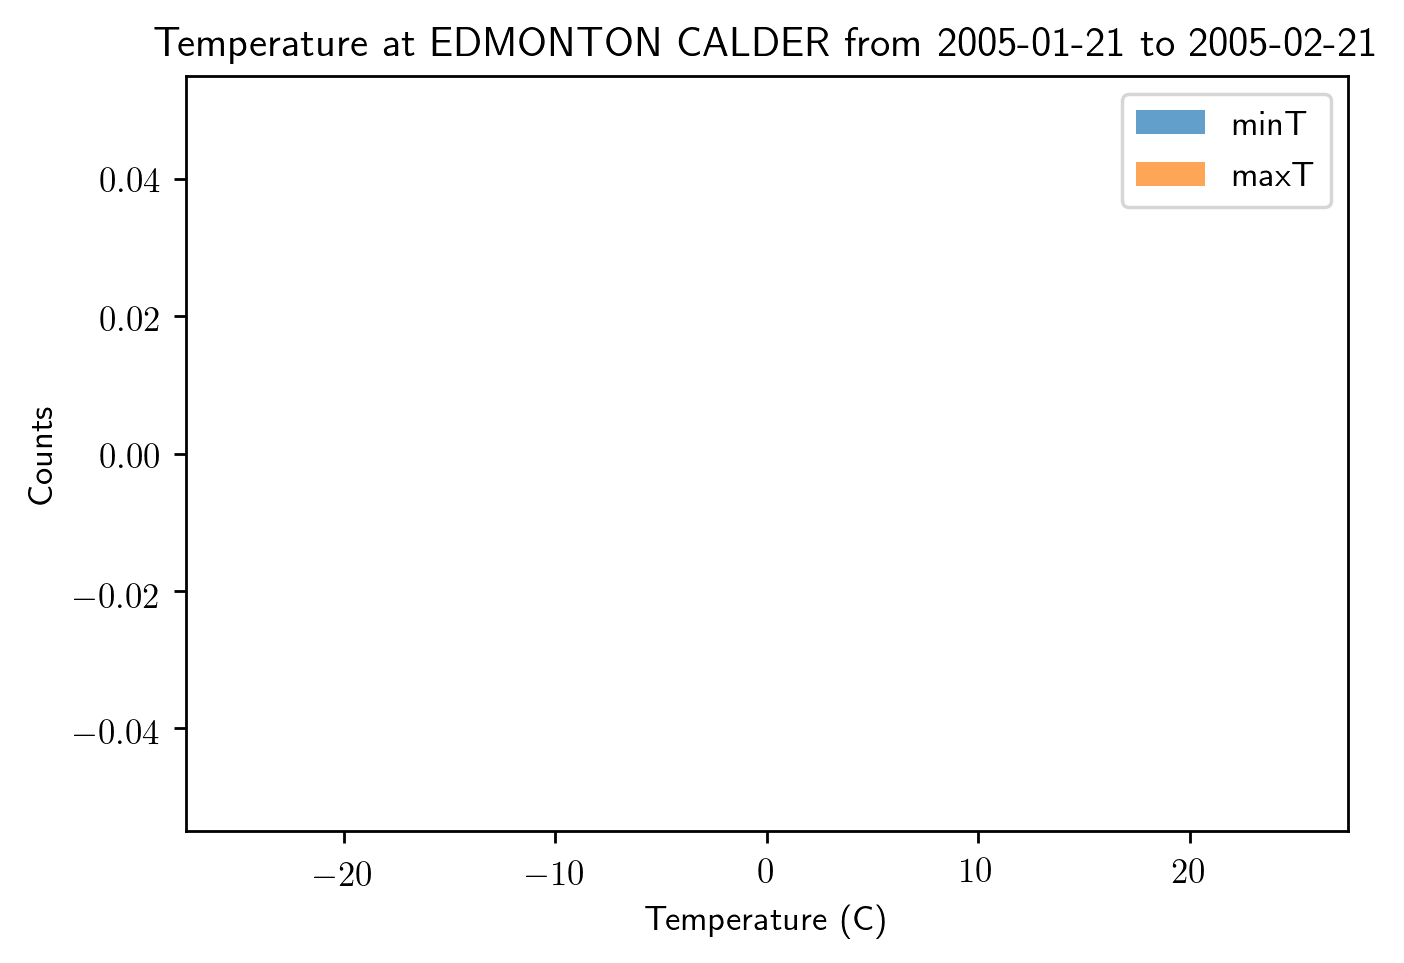

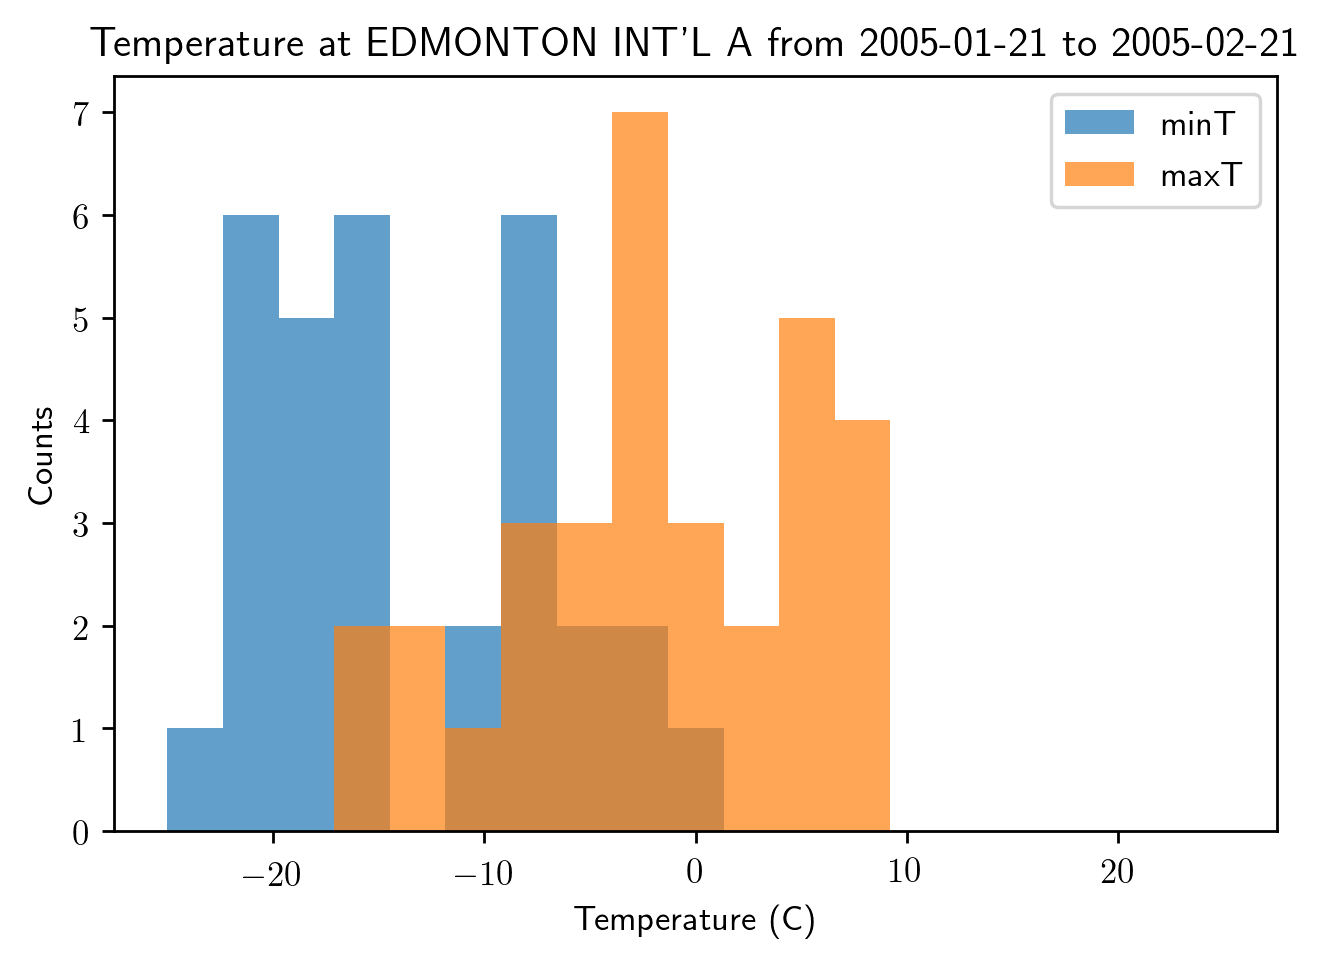

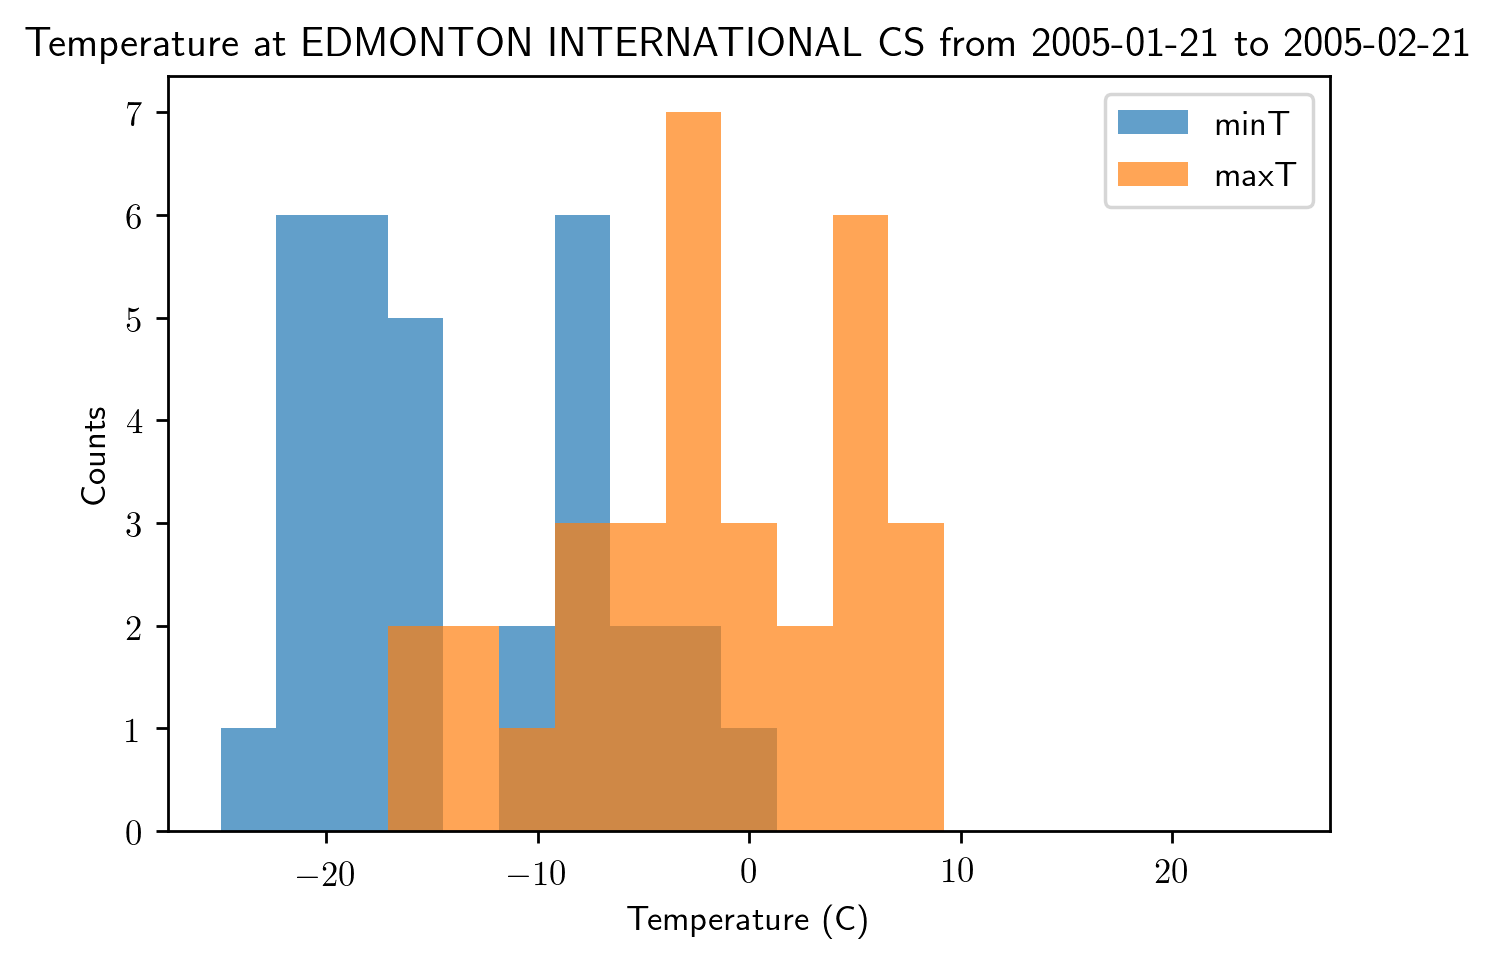

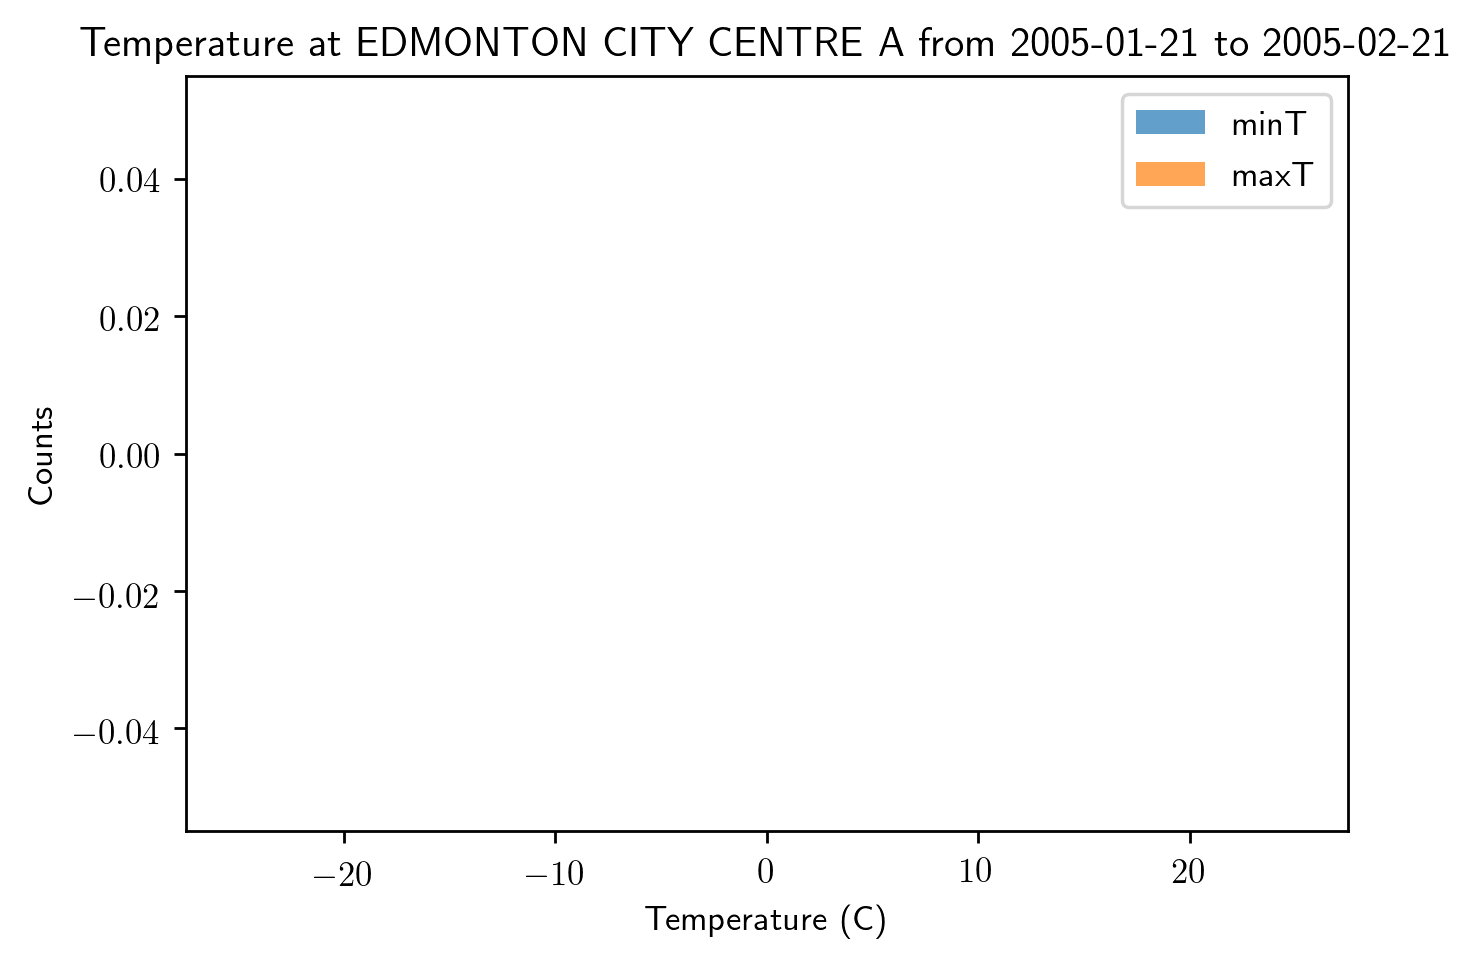

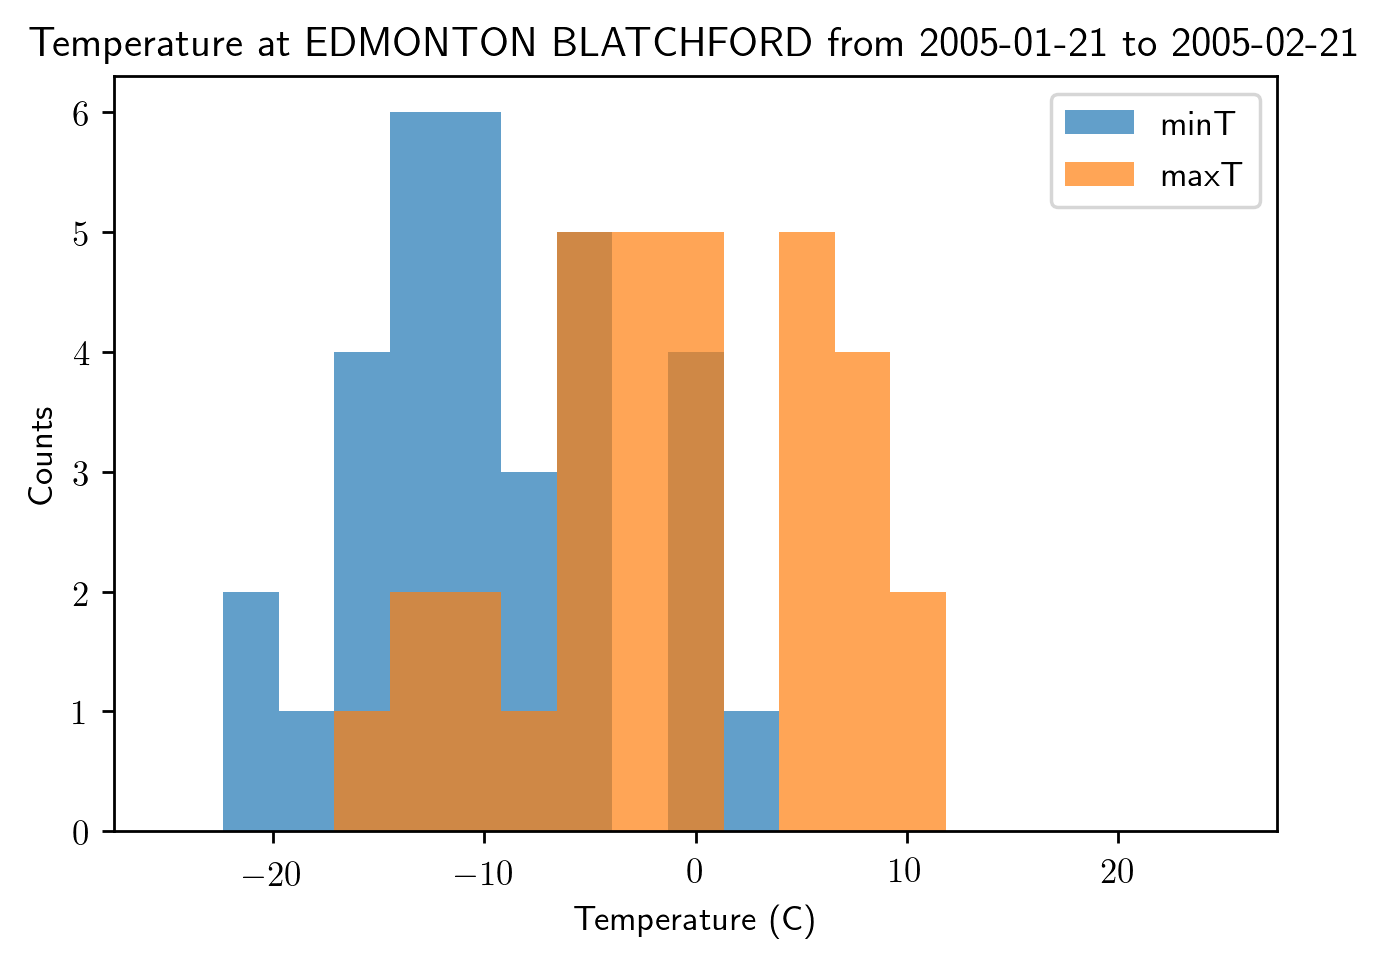

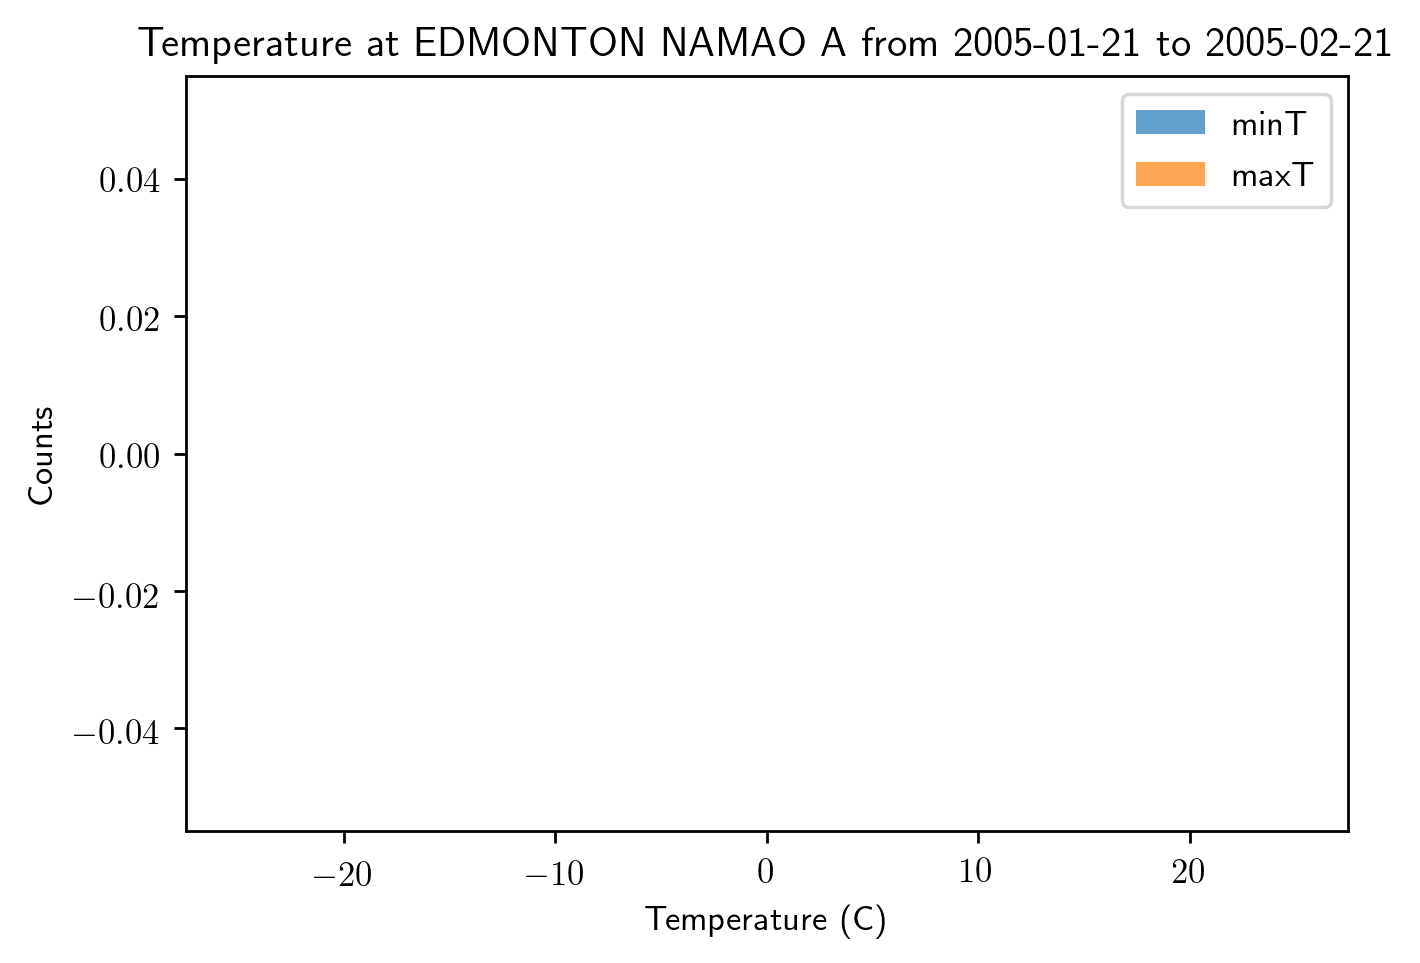

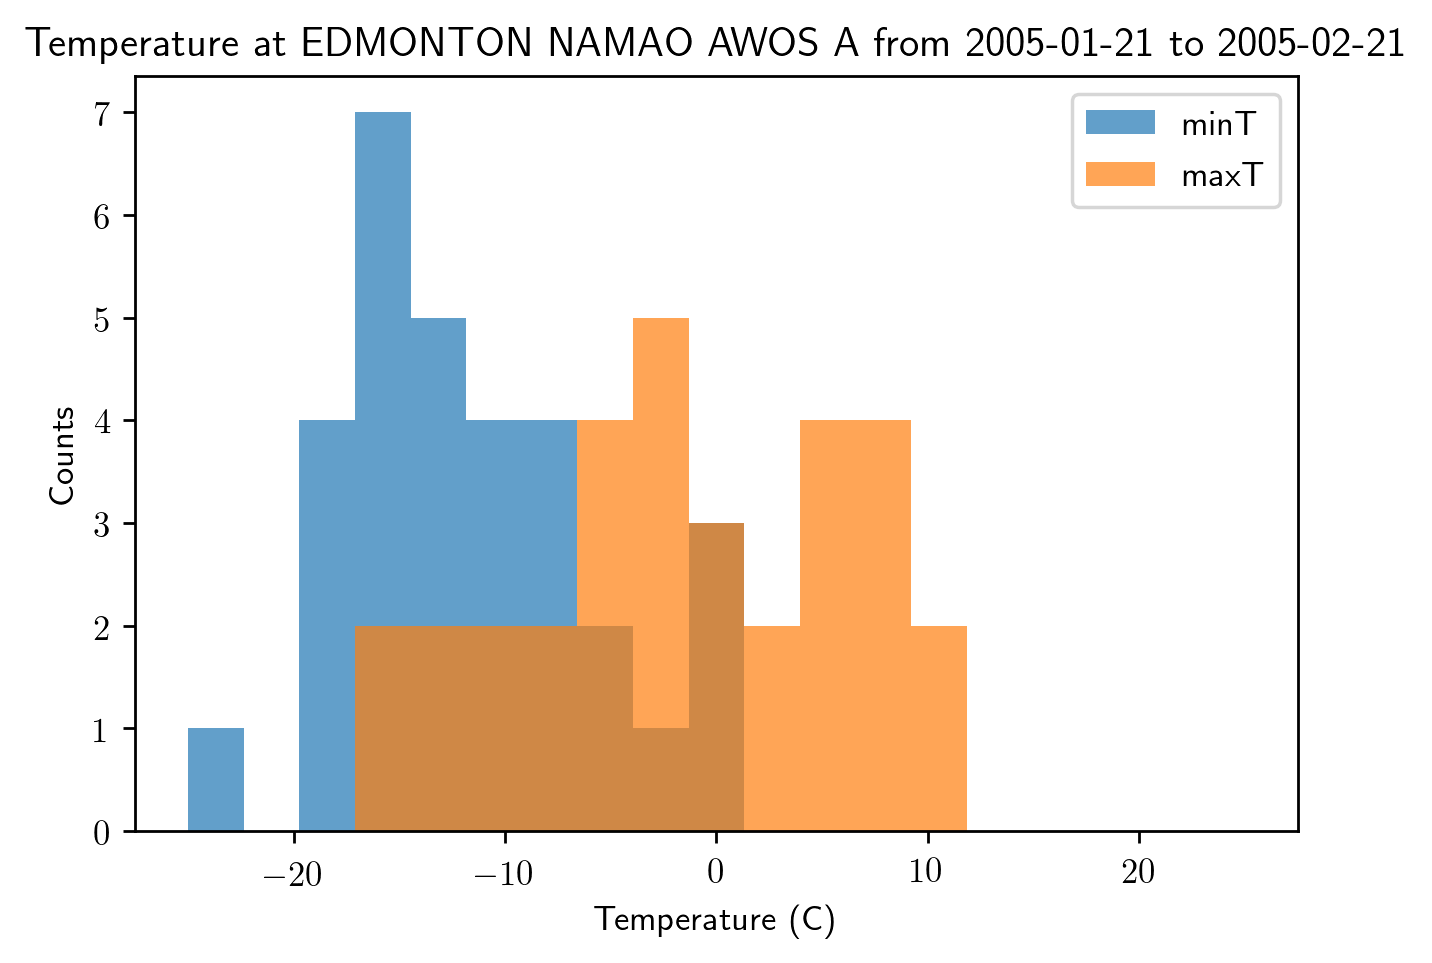

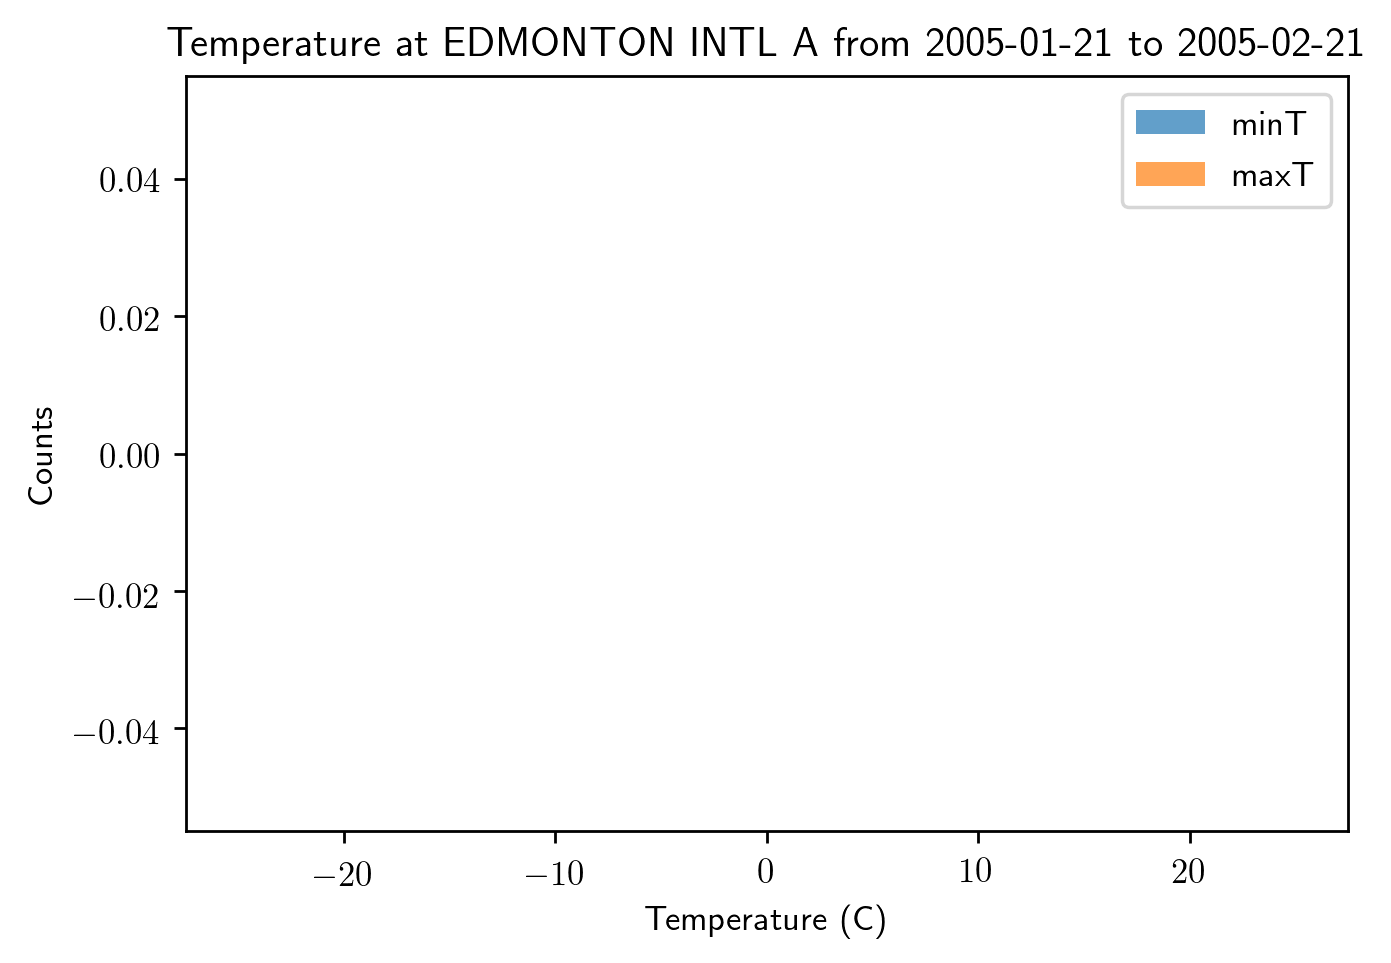

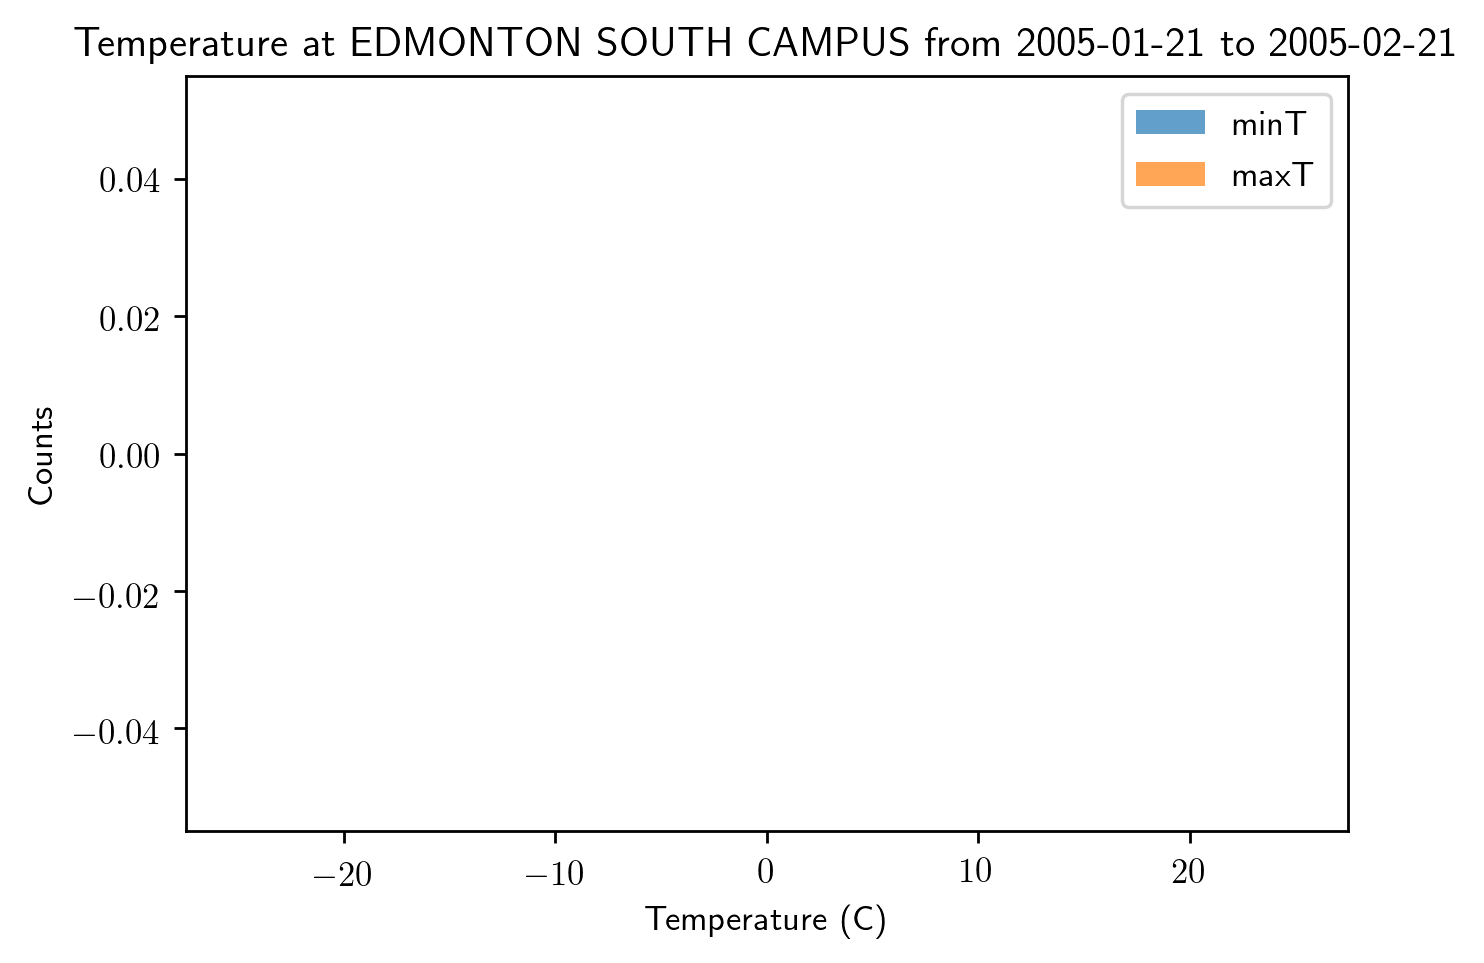

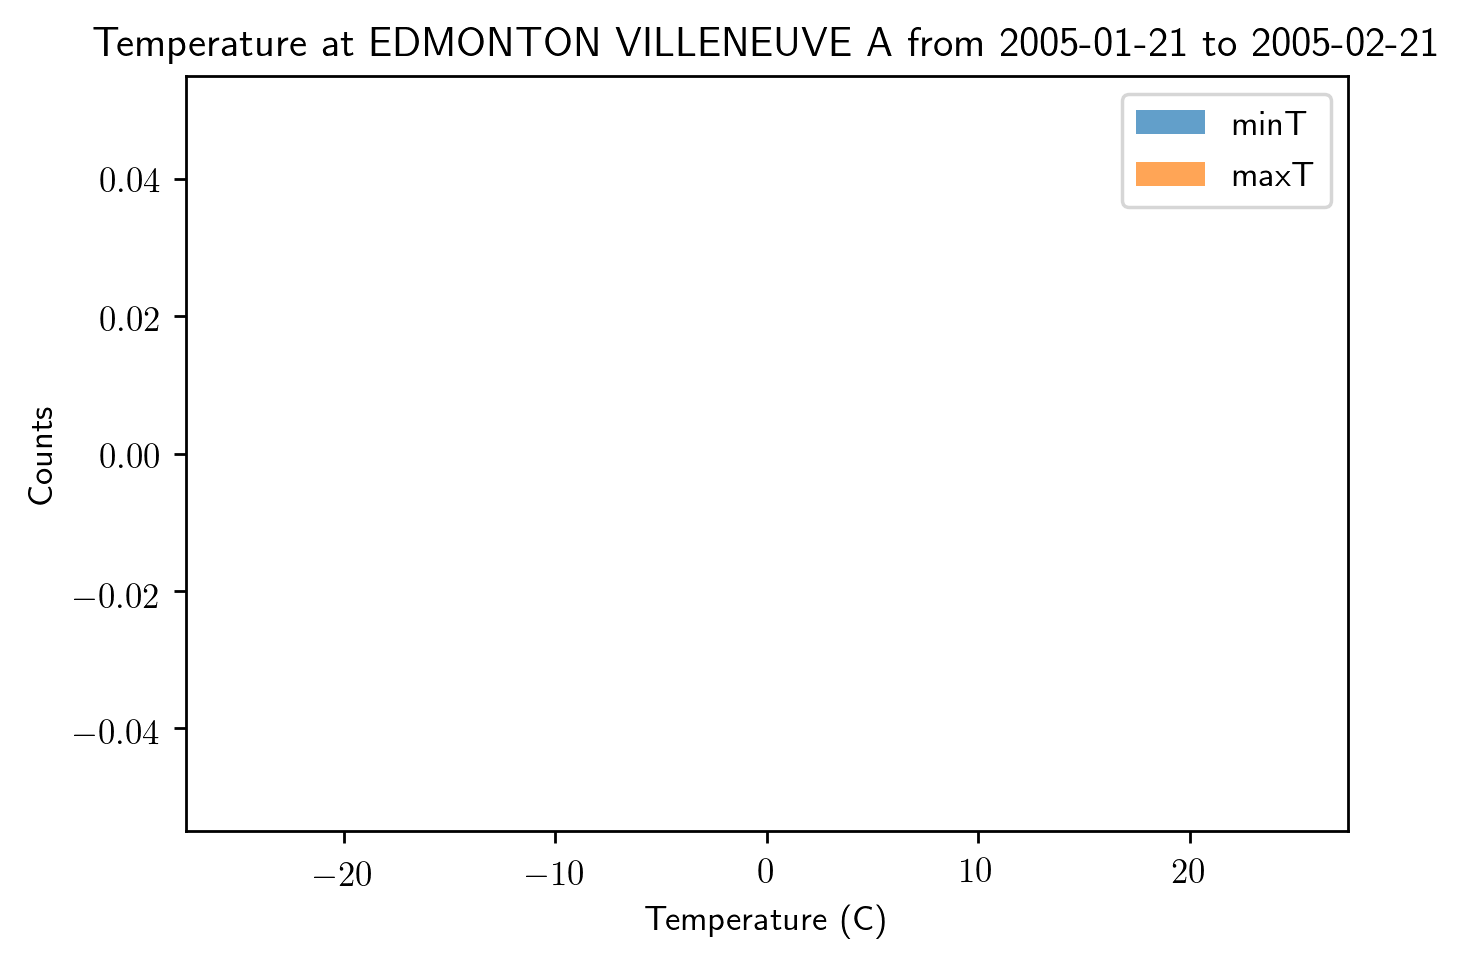

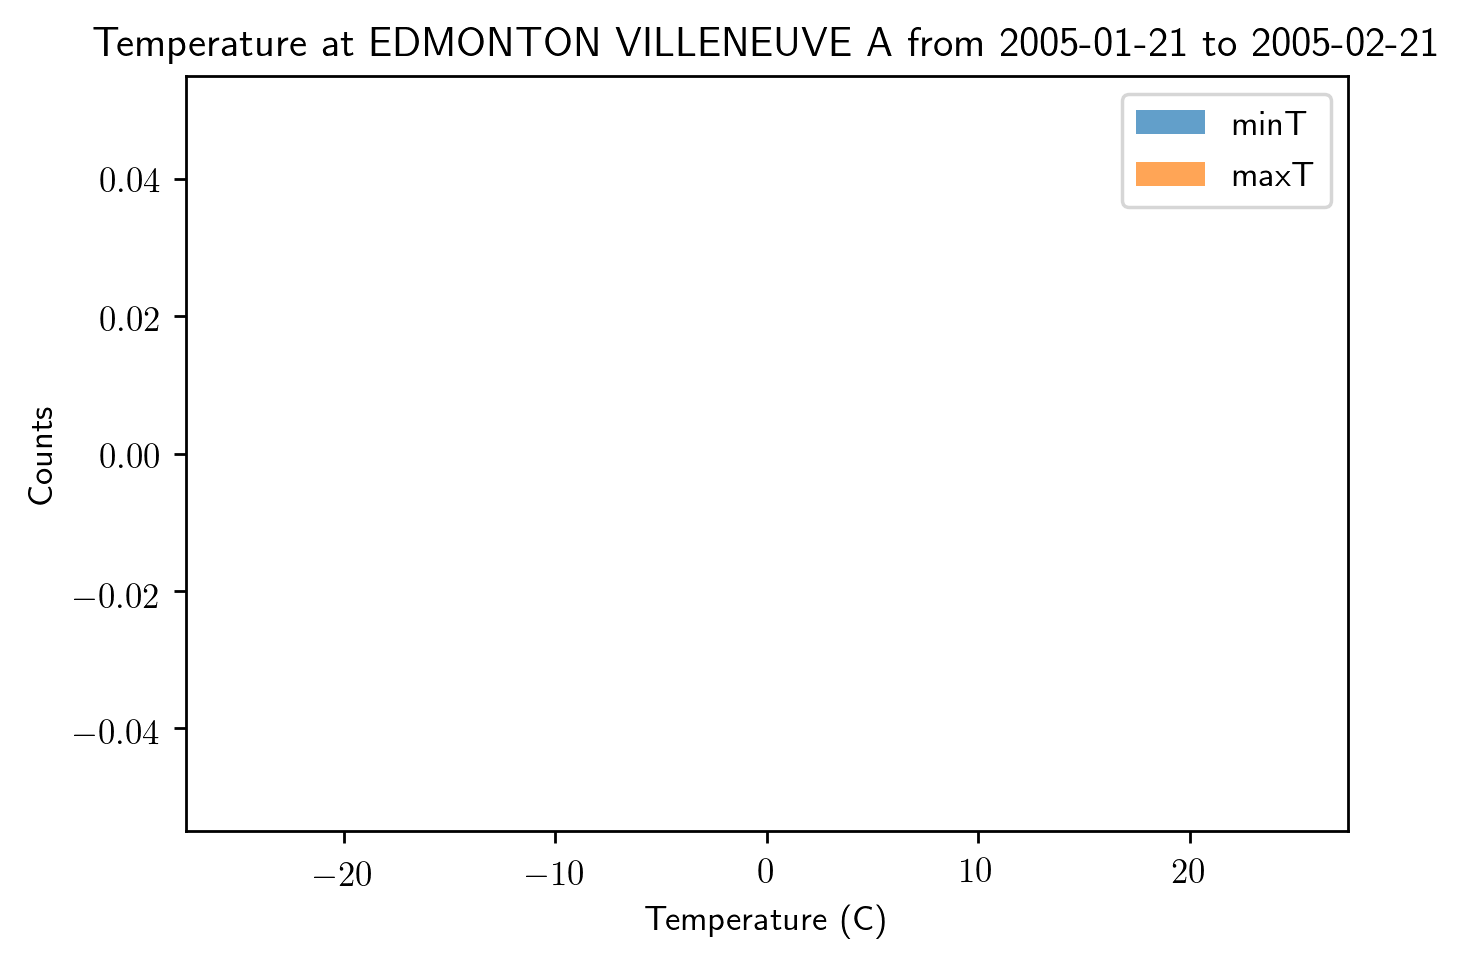

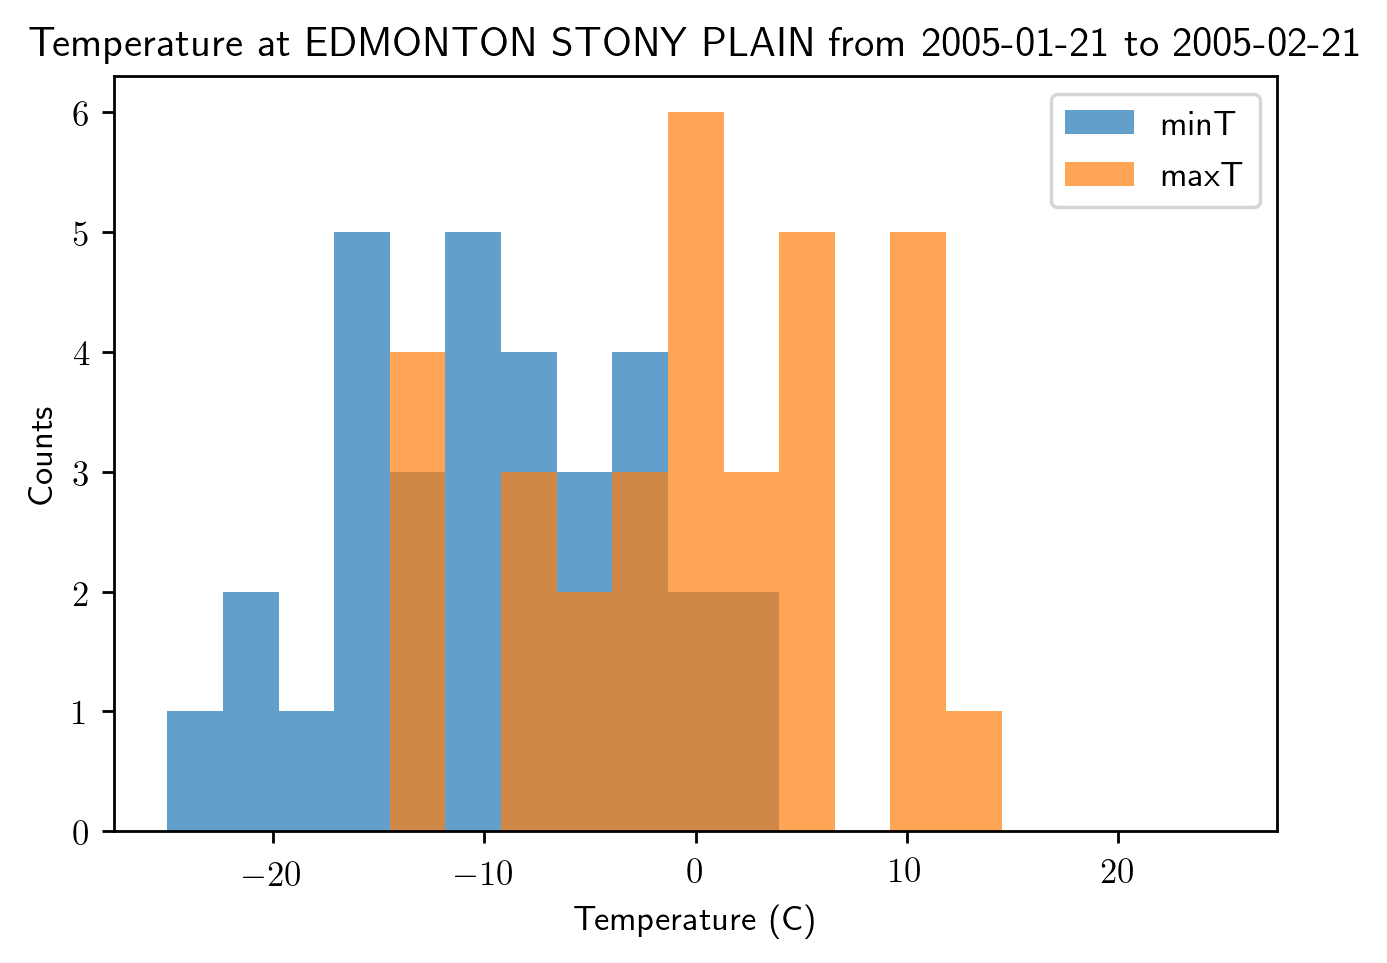

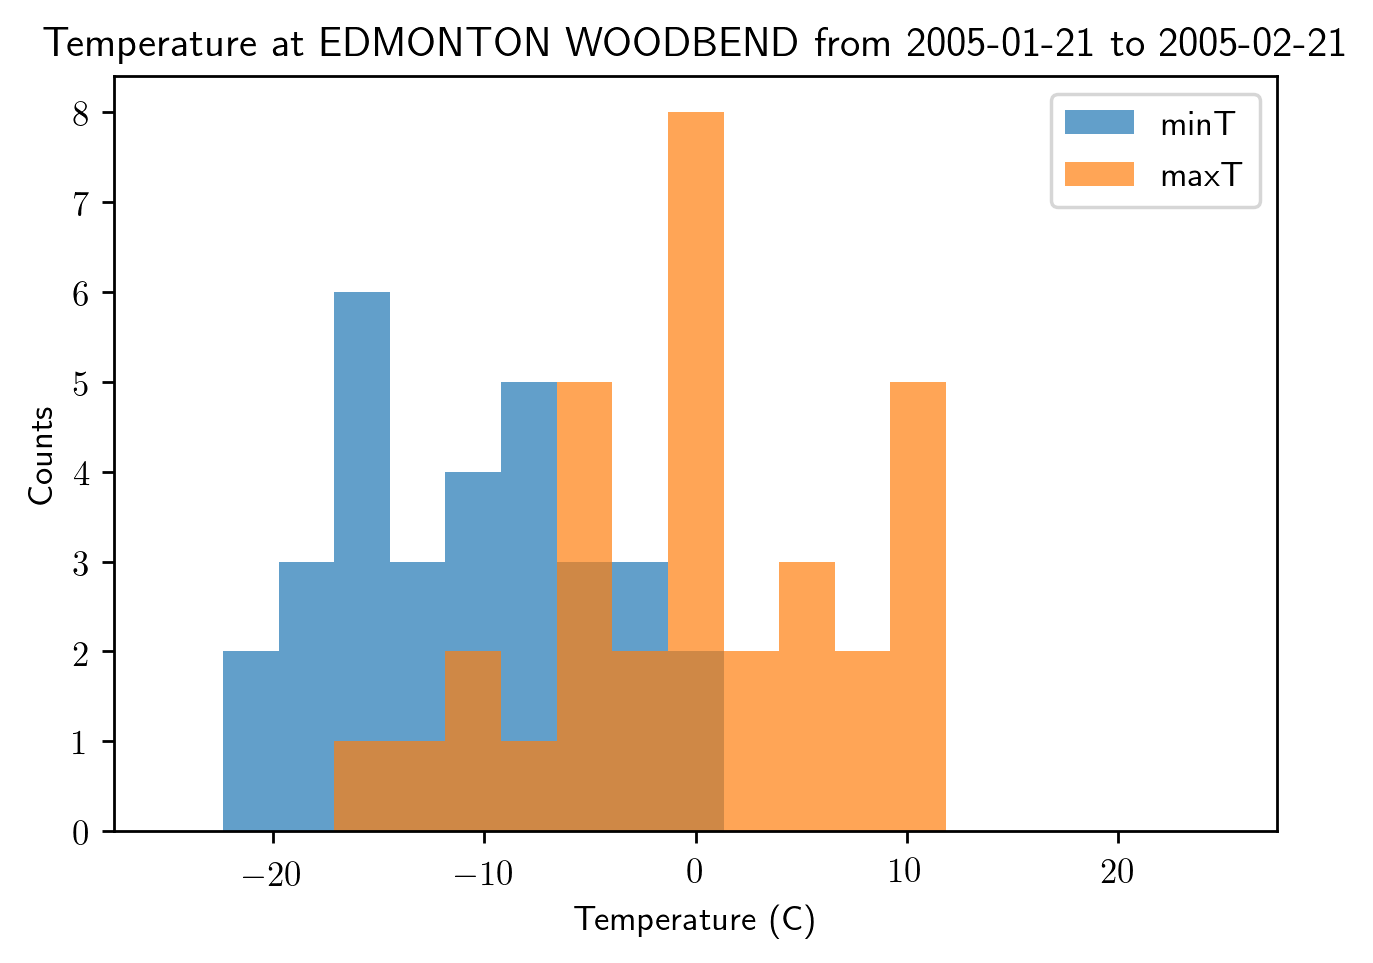

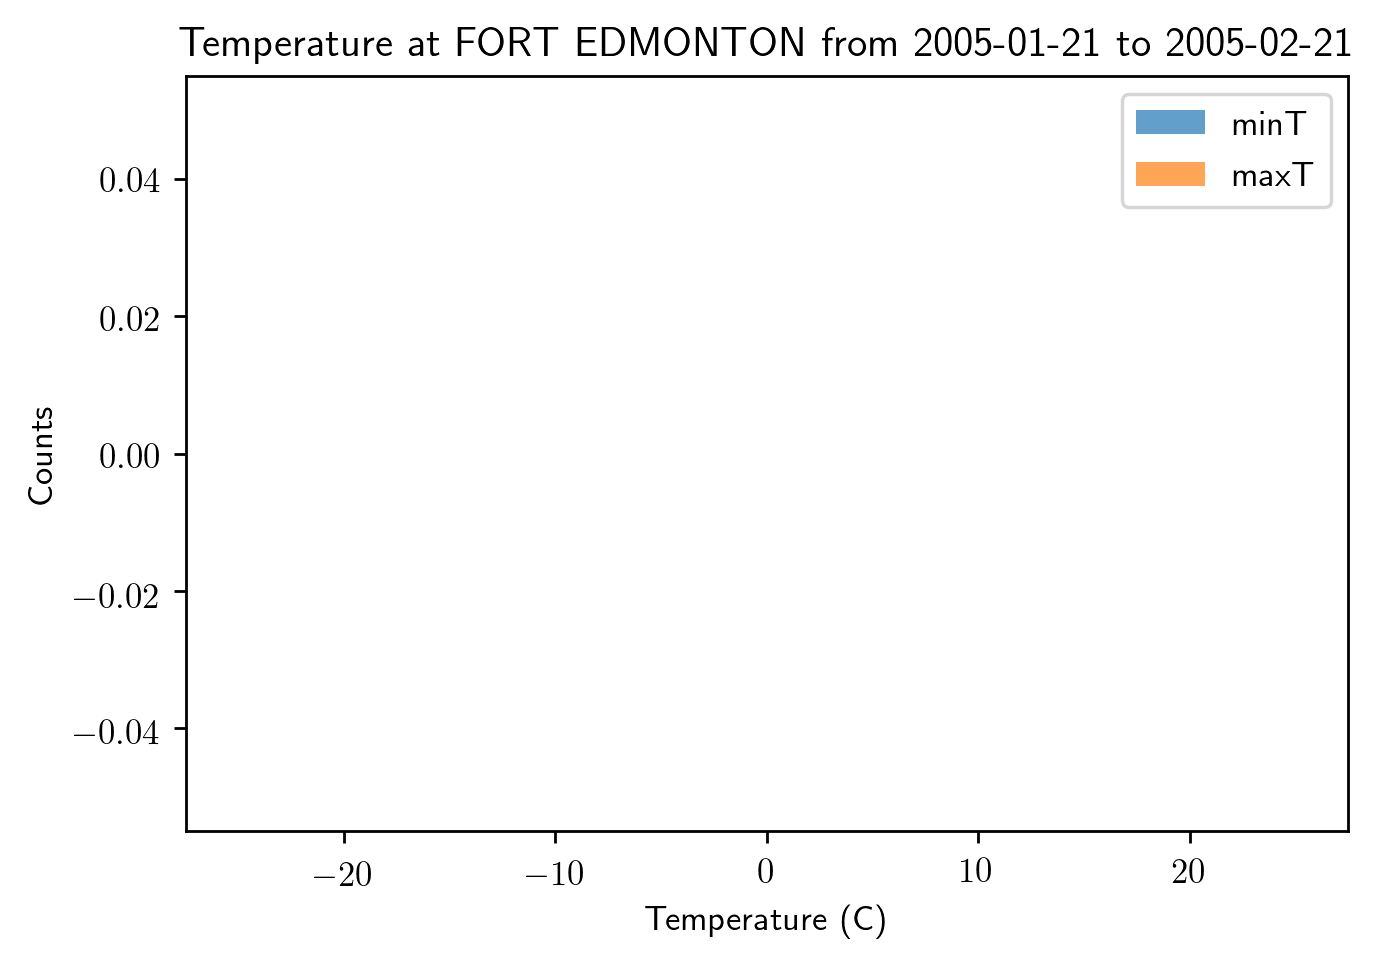

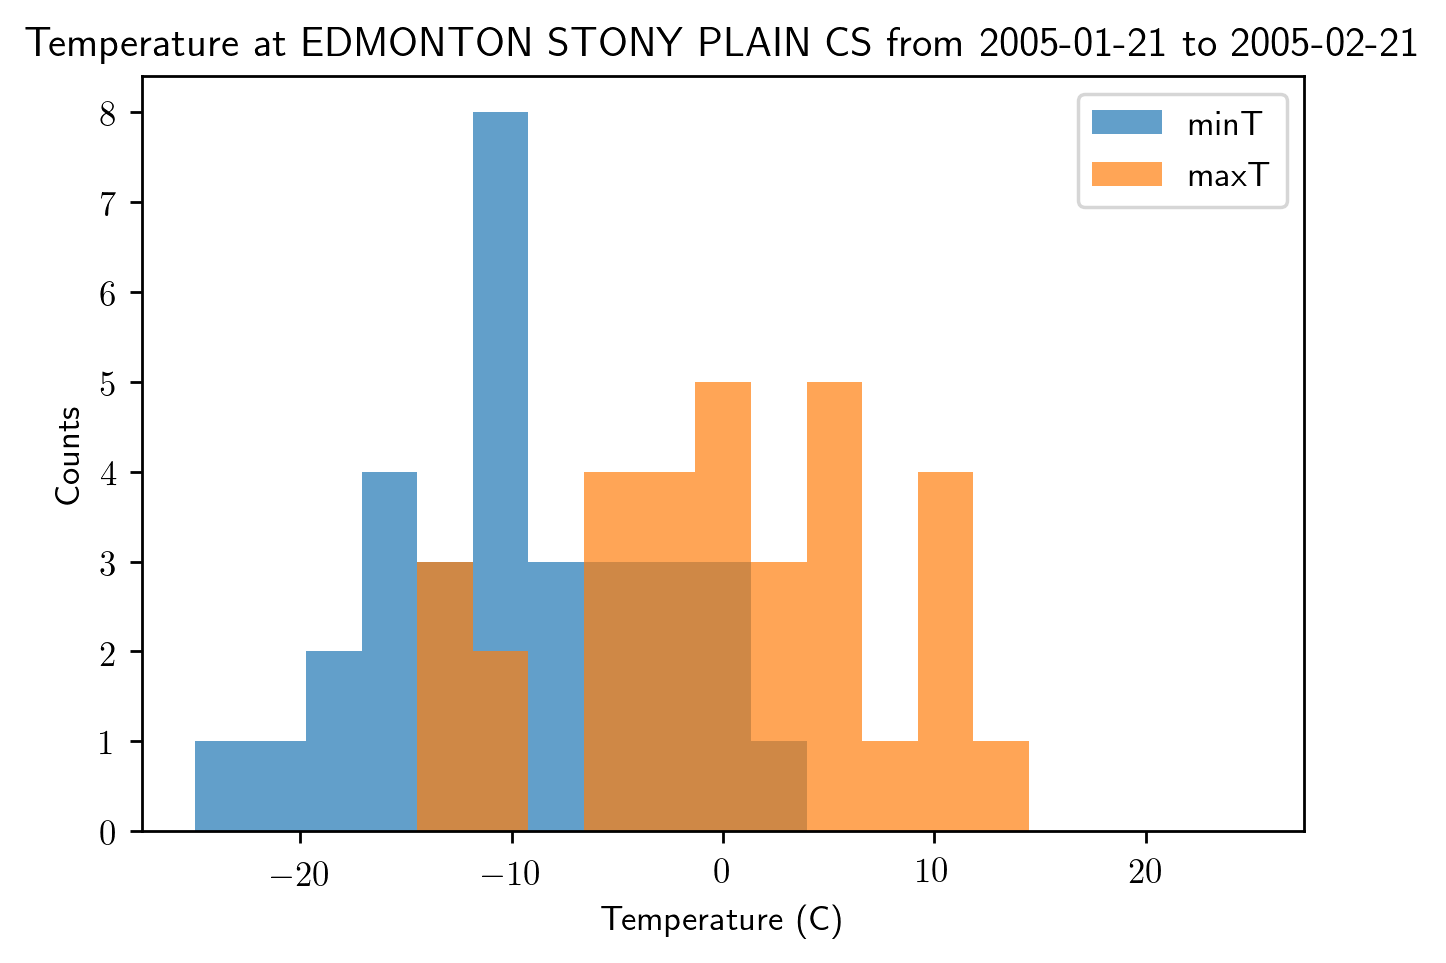

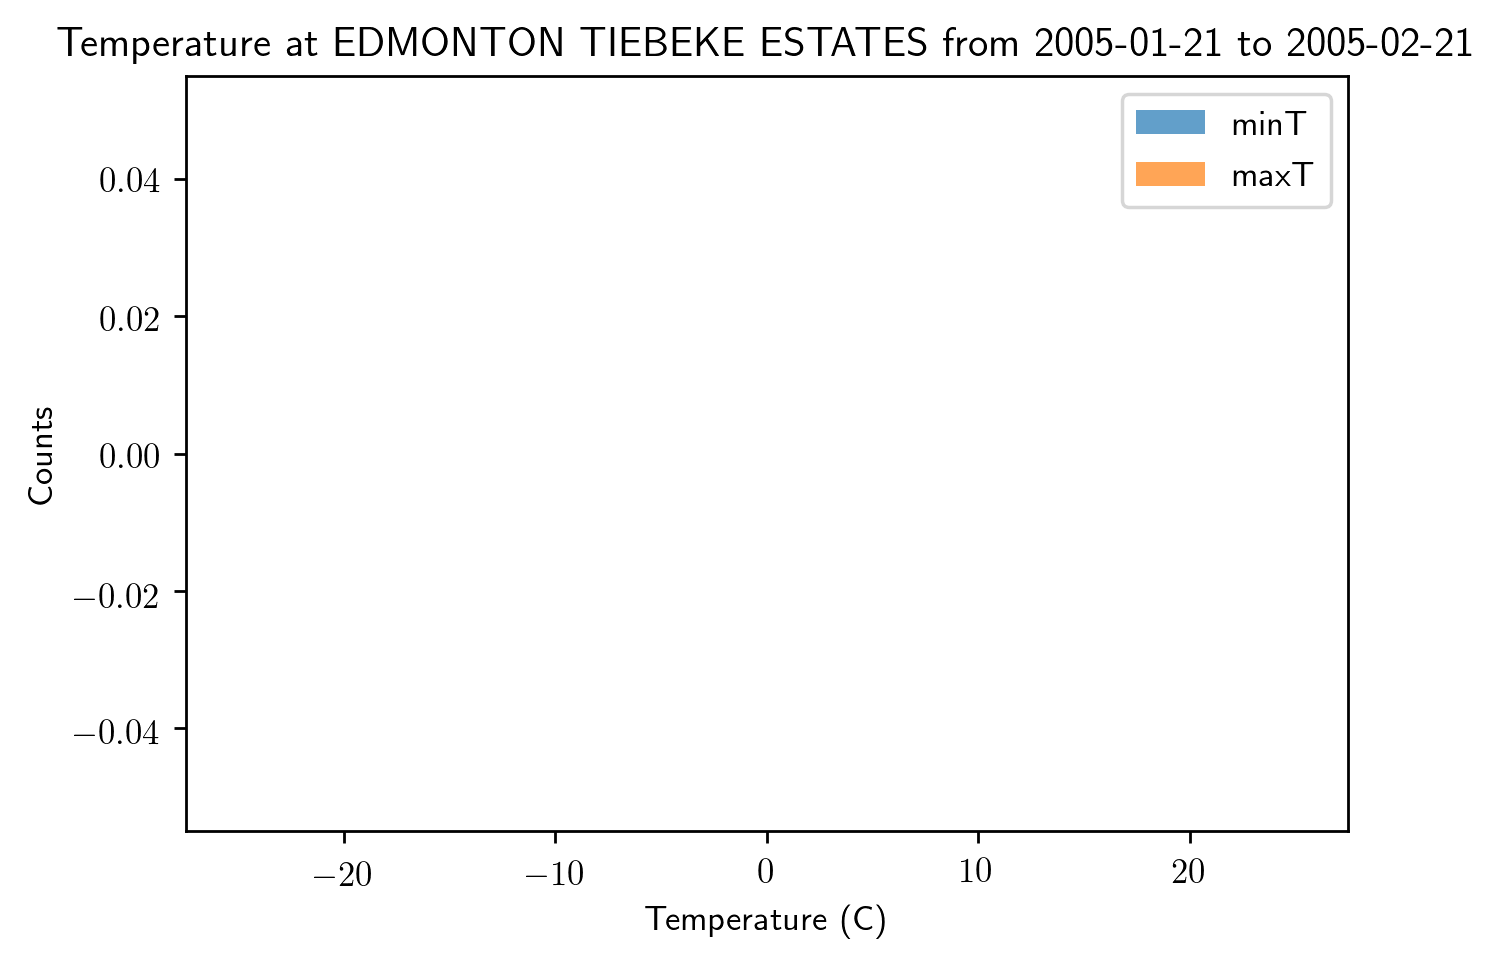

In [26]:
#In the following code, we generate over all stations
for stations in s:
    plot_histogram(stations) #Some plots are empty because there is no data from the period.

#### Grade breakdown
- Defined the dates used (1/1)
- Created the histogram with reasonable range and number of bins (3/3)

##### Total (4/4)

3.  For each pair of stations, find the periods of time during which they both measured temperatures.  If there is an overlapping period, find the mean and standard deviation of the differences between the max and min temperatures measured at the two stations for those periods.  Fill out a table with rows:  Name of Station 1, Name of Station 2, number of days that both measured temperatures, Average Difference in max, standard deviation of difference of Max, Average difference in min, standard deviation of difference in min

In [37]:
# Question 3. 

import pprint

def station_compare(station1, station2, table=False, print_table=True):
    
    # Make dataframes for two stations. Then find the time when they both measured temperatures.
    df_2_stations = pd.concat([make_dataFrame(station1),make_dataFrame(station2)], axis=1) 
    df_2_stations = df_2_stations.dropna() #Drop times where one station didn't measure temperatures.
    
    df_2_stations['delta_minT'] = df_2_stations['minT_'+station1.name] - df_2_stations['minT_'+station2.name]
    df_2_stations['delta_maxT'] = df_2_stations['maxT_'+station1.name] - df_2_stations['maxT_'+station2.name]
    
    #All this is already made calling pd.describe(), but I manually made a table if that's the goal of the problem. 
    #If you want my manually made table, then set table==True.
    #Else if you want the auto generated table then set table==False.
    
    
    
    if table==True:
        #We first call the appropiate function in pandas, then we call values to convert that to a numpy array.
        #Then we take the np.mean() of this 1 by 1 array so that it looks nicer when we print it.
        table = {'Name of Station 1': station1.name, #Name
             'Name of Station 2': station2.name,
             'Number of days that both measured temperatures': df_2_stations.count().values.mean(), #Since we dropped all rows containing nan, then we only need to count the size
             'Average Difference in max (C)': df_2_stations[['delta_maxT']].mean().values.mean(),
             'Standard Deviation of difference of Max': df_2_stations[['delta_maxT']].std().values.mean(),
             'Average Difference in min (C)': df_2_stations[['delta_minT']].mean().values.mean(),
             'Standard Deviation of difference in min': df_2_stations[['delta_minT']].std().values.mean(),
        }
        if print_table:
            pprint.pprint(table)
        return df_2_stations
    else:
        if print_table:
            print({'Station 1': station1.name,
                 'Station 2': station2.name})
            print(df_2_stations[['delta_minT','delta_maxT']].describe())
        return df_2_stations

#df_2_stations = station_compare(s[1], s[3]) #Autogenerated table
df_2_stations = station_compare(s[1], s[3], table=True) #Manually made table



{'Average Difference in max (C)': 0.6261977186311799,
 'Average Difference in min (C)': 3.7100760456273765,
 'Name of Station 1': 'EDMONTON CITY CENTRE AWOS',
 'Name of Station 2': "EDMONTON INT'L A",
 'Number of days that both measured temperatures': 2630.0,
 'Standard Deviation of difference in min': 2.478676116963948,
 'Standard Deviation of difference of Max': 1.270354996491765}


In [45]:
#In the following code, we simply generate all possible pairs of stations for which we wish to compare.
#Also, some stations have no data in common, and therefore there might be nans/0.
import itertools

for pair in itertools.combinations(s, 2):
    try:
        df_2_stations = station_compare(*pair, table=True) 
    except ValueError: # This error occurs when you have an empty dataframe
        pass

{'Average Difference in max (C)': nan,
 'Average Difference in min (C)': nan,
 'Name of Station 1': 'EDMONTON',
 'Name of Station 2': 'EDMONTON CITY CENTRE AWOS',
 'Number of days that both measured temperatures': 0.0,
 'Standard Deviation of difference in min': nan,
 'Standard Deviation of difference of Max': nan}
{'Average Difference in max (C)': nan,
 'Average Difference in min (C)': nan,
 'Name of Station 1': 'EDMONTON',
 'Name of Station 2': 'EDMONTON CALDER',
 'Number of days that both measured temperatures': 0.0,
 'Standard Deviation of difference in min': nan,
 'Standard Deviation of difference of Max': nan}
{'Average Difference in max (C)': nan,
 'Average Difference in min (C)': nan,
 'Name of Station 1': 'EDMONTON',
 'Name of Station 2': "EDMONTON INT'L A",
 'Number of days that both measured temperatures': 0.0,
 'Standard Deviation of difference in min': nan,
 'Standard Deviation of difference of Max': nan}
{'Average Difference in max (C)': nan,
 'Average Difference in min (

{'Average Difference in max (C)': 0.3052060737527111,
 'Average Difference in min (C)': 0.34143167028199617,
 'Name of Station 1': 'EDMONTON CITY CENTRE AWOS',
 'Name of Station 2': 'EDMONTON STONY PLAIN',
 'Number of days that both measured temperatures': 3688.0,
 'Standard Deviation of difference in min': 1.8288239465857068,
 'Standard Deviation of difference of Max': 1.4672780283292137}
{'Average Difference in max (C)': 0.14830904591696445,
 'Average Difference in min (C)': 2.17352213362661,
 'Name of Station 1': 'EDMONTON CITY CENTRE AWOS',
 'Name of Station 2': 'EDMONTON WOODBEND',
 'Number of days that both measured temperatures': 3637.0,
 'Standard Deviation of difference in min': 2.699765716390238,
 'Standard Deviation of difference of Max': 1.748872188888376}
{'Average Difference in max (C)': nan,
 'Average Difference in min (C)': nan,
 'Name of Station 1': 'EDMONTON CITY CENTRE AWOS',
 'Name of Station 2': 'FORT EDMONTON',
 'Number of days that both measured temperatures': 0.

{'Average Difference in max (C)': 0.1638198757763977,
 'Average Difference in min (C)': -1.4912525879917211,
 'Name of Station 1': "EDMONTON INT'L A",
 'Name of Station 2': 'EDMONTON NAMAO AWOS A',
 'Number of days that both measured temperatures': 3864.0,
 'Standard Deviation of difference in min': 2.2861638741583237,
 'Standard Deviation of difference of Max': 1.2808372814315463}
{'Average Difference in max (C)': nan,
 'Average Difference in min (C)': nan,
 'Name of Station 1': "EDMONTON INT'L A",
 'Name of Station 2': 'EDMONTON INTL A',
 'Number of days that both measured temperatures': 0.0,
 'Standard Deviation of difference in min': nan,
 'Standard Deviation of difference of Max': nan}
{'Average Difference in max (C)': nan,
 'Average Difference in min (C)': nan,
 'Name of Station 1': "EDMONTON INT'L A",
 'Name of Station 2': 'EDMONTON SOUTH CAMPUS',
 'Number of days that both measured temperatures': 0.0,
 'Standard Deviation of difference in min': nan,
 'Standard Deviation of diff

{'Average Difference in max (C)': 0.263639162561576,
 'Average Difference in min (C)': -0.04131773399014791,
 'Name of Station 1': 'EDMONTON CITY CENTRE A',
 'Name of Station 2': 'EDMONTON BLATCHFORD',
 'Number of days that both measured temperatures': 3248.0,
 'Standard Deviation of difference in min': 0.27574976052143896,
 'Standard Deviation of difference of Max': 0.3616748268135863}
{'Average Difference in max (C)': 0.6690700852476008,
 'Average Difference in min (C)': 1.0469122144855896,
 'Name of Station 1': 'EDMONTON CITY CENTRE A',
 'Name of Station 2': 'EDMONTON NAMAO A',
 'Number of days that both measured temperatures': 15367.0,
 'Standard Deviation of difference in min': 1.2118307802427866,
 'Standard Deviation of difference of Max': 0.8650851497114614}
{'Average Difference in max (C)': 0.8045202220459955,
 'Average Difference in min (C)': 2.112450436161774,
 'Name of Station 1': 'EDMONTON CITY CENTRE A',
 'Name of Station 2': 'EDMONTON NAMAO AWOS A',
 'Number of days that 

{'Average Difference in max (C)': nan,
 'Average Difference in min (C)': nan,
 'Name of Station 1': 'EDMONTON NAMAO A',
 'Name of Station 2': 'EDMONTON INTL A',
 'Number of days that both measured temperatures': 0.0,
 'Standard Deviation of difference in min': nan,
 'Standard Deviation of difference of Max': nan}
{'Average Difference in max (C)': nan,
 'Average Difference in min (C)': nan,
 'Name of Station 1': 'EDMONTON NAMAO A',
 'Name of Station 2': 'EDMONTON SOUTH CAMPUS',
 'Number of days that both measured temperatures': 0.0,
 'Standard Deviation of difference in min': nan,
 'Standard Deviation of difference of Max': nan}
{'Average Difference in max (C)': -0.12247324613555312,
 'Average Difference in min (C)': 0.6150614347998417,
 'Name of Station 1': 'EDMONTON NAMAO A',
 'Name of Station 2': 'EDMONTON VILLENEUVE A',
 'Number of days that both measured temperatures': 2523.0,
 'Standard Deviation of difference in min': 2.352253350077129,
 'Standard Deviation of difference of Max':

{'Average Difference in max (C)': 0.8859649122807005,
 'Average Difference in min (C)': 1.7361842105263183,
 'Name of Station 1': 'EDMONTON SOUTH CAMPUS',
 'Name of Station 2': 'EDMONTON VILLENEUVE A',
 'Number of days that both measured temperatures': 456.0,
 'Standard Deviation of difference in min': 1.9051653099664587,
 'Standard Deviation of difference of Max': 1.0401713462383853}
{'Average Difference in max (C)': 0.515049504950495,
 'Average Difference in min (C)': -0.17148514851485136,
 'Name of Station 1': 'EDMONTON SOUTH CAMPUS',
 'Name of Station 2': 'EDMONTON STONY PLAIN',
 'Number of days that both measured temperatures': 505.0,
 'Standard Deviation of difference in min': 1.6395589479874837,
 'Standard Deviation of difference of Max': 1.6604799601143103}
{'Average Difference in max (C)': nan,
 'Average Difference in min (C)': nan,
 'Name of Station 1': 'EDMONTON SOUTH CAMPUS',
 'Name of Station 2': 'EDMONTON WOODBEND',
 'Number of days that both measured temperatures': 0.0,


{'Average Difference in max (C)': nan,
 'Average Difference in min (C)': nan,
 'Name of Station 1': 'FORT EDMONTON',
 'Name of Station 2': 'EDMONTON STONY PLAIN CS',
 'Number of days that both measured temperatures': 0.0,
 'Standard Deviation of difference in min': nan,
 'Standard Deviation of difference of Max': nan}
{'Average Difference in max (C)': nan,
 'Average Difference in min (C)': nan,
 'Name of Station 1': 'FORT EDMONTON',
 'Name of Station 2': 'EDMONTON TIEBEKE ESTATES',
 'Number of days that both measured temperatures': 0.0,
 'Standard Deviation of difference in min': nan,
 'Standard Deviation of difference of Max': nan}
{'Average Difference in max (C)': 0.10895741556534512,
 'Average Difference in min (C)': 1.8261380323054335,
 'Name of Station 1': 'EDMONTON STONY PLAIN CS',
 'Name of Station 2': 'EDMONTON TIEBEKE ESTATES',
 'Number of days that both measured temperatures': 681.0,
 'Standard Deviation of difference in min': 2.0264989887752964,
 'Standard Deviation of diffe

#### Grade breakdown
- Properly found pairs of stations (2/2)
- Calculated and output the correct data (3/3)

##### Total (5/5)

4.  For a few of the pairs which have significant differences, make a 2d color histogram of Ta-Tb versus Ta, where Ta and Tb refer to the measurements at the two stations. 

{'Station 1': 'EDMONTON CITY CENTRE AWOS', 'Station 2': "EDMONTON INT'L A"}
        delta_minT   delta_maxT
count  2630.000000  2630.000000
mean      3.710076     0.626198
std       2.478676     1.270355
min      -7.700000    -9.000000
25%       1.800000    -0.100000
50%       3.800000     0.500000
75%       5.400000     1.100000
max      13.100000     8.200000


minT_EDMONTON CITY CENTRE AWOS  maxT_EDMONTON CITY CENTRE AWOS  \
2005-01-21                           -21.7                           -12.5   
2005-01-22                           -17.3                            -6.1   
2005-01-23                            -6.6                             4.4   
2005-01-24                            -1.6                             9.1   
2005-01-25                            -7.3                             6.3   
2005-01-26                           -11.1                            -2.3   
2005-01-27                            -5.6                            -1.0   
2005-01-28                            -9.6                            -3.5   
2005-01-29                            -9.0                            -2.9   
2005-01-30                            -4.3                             5.2   
2005-01-31                            -0.9                            10.1   
2005-02-01                            -0.2                             8.3   
2005-02-02                             2.0                            10.0   
2005-02-03                           -11.2                             9.0   
2005-02-04                           -15.6                            -9.1   
2005-02-05                           -16.3                           -14.7   
2005-02-06                           -16.7                           -13.7   
2005-02-07                           -21.6                           -12.1   
2005-02-08                           -13.6                             0.5   
2005-02-09                            -9.6                             1.5   
2005-02-10                            -4.9                             6.2   
2005-02-11                            -1.9                            11.6   
2005-02-12                            -5.1                             4.9   
2005-02-13                            -8.8                             0.1   
2005-02-14                           -12.1                            -5.5   
2005-02-15                           -12.7                            -4.6   
2005-02-16                           -14.6                             0.0   
2005-02-17                           -10.1                            -1.5   
2005-02-18                           -13.5                            -4.3   
2005-02-19                           -12.1                            -8.4   
...                                    ...                             ...   
2012-03-12                            -1.1                             7.0   
2012-03-13                            -2.4                             7.6   
2012-03-14                            -4.2                             5.5   
2012-03-15                            -5.4                             9.1   
2012-03-16                            -1.2                             7.9   
2012-03-17                            -4.3                             5.9   
2012-03-18                            -1.6                             4.9   
2012-03-19                            -5.0                            -0.3   
2012-03-20                            -9.1                             3.7   
2012-03-21                            -6.6                             6.3   
2012-03-22                            -5.0                             0.2   
2012-03-23                            -8.8                            -5.0   
2012-03-24                           -13.2                             1.1   
2012-03-25                            -3.9                             3.9   
2012-03-26                            -3.9                             5.2   
2012-03-27                            -2.8                             8.2   
2012-03-28                             1.0                             9.9   
2012-03-30                            -0.5                            10.7   
2012-03-31                            -2.6                            10.6   
2012-04-01                        

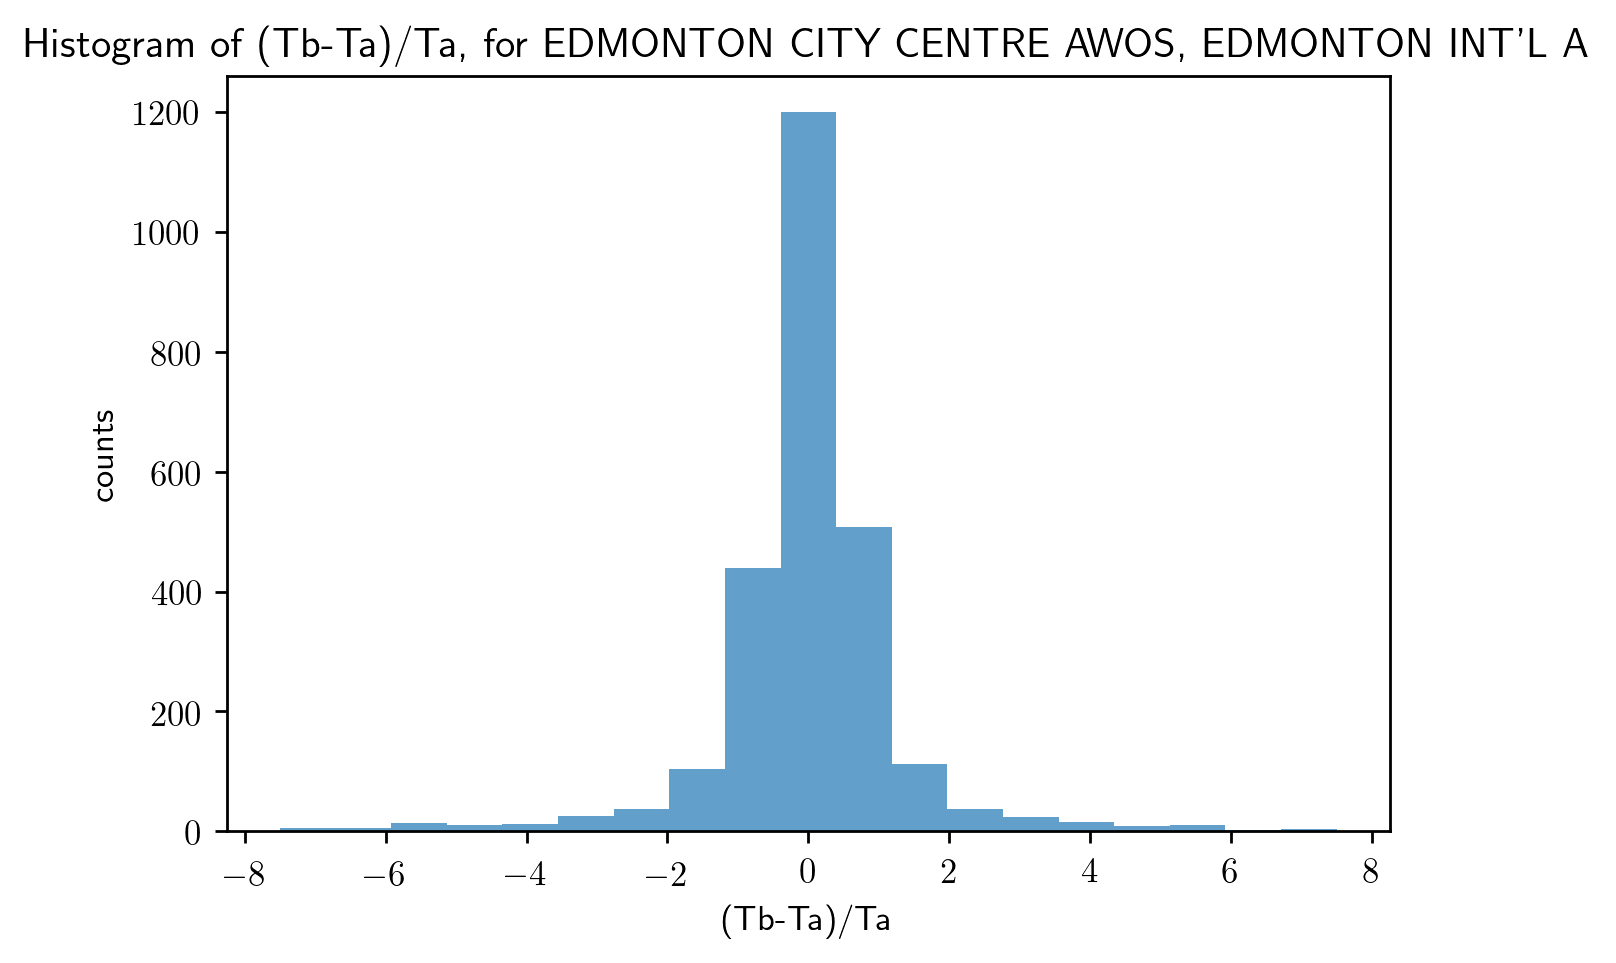

In [35]:
# Solution to Question 4. A histogram is only one variable along the axis, 
# so I decided to histogram the ratio (Ta-Tb)/Tb. 
# Also, it doesn't make sense to cherry pick "significant dates", so I just histogrammed all the dates.

def plot_histogram2(station1, station2):
    df_2_stations = station_compare(station1,station2) #Get the dataframe of the two stations

    Tb_Ta = df_2_stations['delta_minT']/df_2_stations['minT_'+station1.name] #Take Ta-Tb and divide by Tb
    Tb_Ta = Tb_Ta.replace([np.inf, -np.inf], np.nan) # get rid of bad data
    Tb_Ta = Tb_Ta.dropna() # get rid of nan
    
    bins = np.linspace(-7.5,7.5,num=20) #Bins
    
    plt.title(f'Histogram of (Tb-Ta)/Ta, for {station1.name}, {station2.name}')
    plt.ylabel('counts')
    plt.xlabel('(Tb-Ta)/Ta')
    plt.hist(Tb_Ta , alpha=0.7,bins=bins) #histogram the data
    
    return df_2_stations

#Compute this histogram. Like before, we can generalize this to loop over any 2 stations
df_2_stations = plot_histogram2(s[1], s[3]) 
df_2_stations

In [36]:
# Solution to Question 4 continued. 
# If we really want a Tb-Ta plot vs. Ta, then we should not use a histogram and just plot normally

def plot_2(station1, station2):
    df_2_stations = station_compare(station1,station2) #Get the dataframe of the two stations
    
    plt.title(f'{station1.name} vs. {station2.name}, (Tb-Ta) vs. Ta')
    plt.ylabel('(Tb-Ta)')
    plt.xlabel('Ta')
    plt.scatter(df_2_stations['minT_'+station1.name], df_2_stations['delta_minT'] , alpha=0.7) 
    return df_2_stations

#df_2_stations = plot_2(s[1], s[3])
#df_2_stations

#### Grade breakdown
- Didn't find pairs with significant differences (0/2)
- Didn't plot 2d histograms, plotted normal histograms instead. (0/8)

##### Total (0/10)

5. Combine all the data from the different stations into an average max and min for each each day of the year. To do this, you will to pick one station as the standard, and correct each of the others by its average difference. Keep the data as an np.array. Plot averages for the year.

Text(0.5, 1.0, 'Dates for which the station has data')

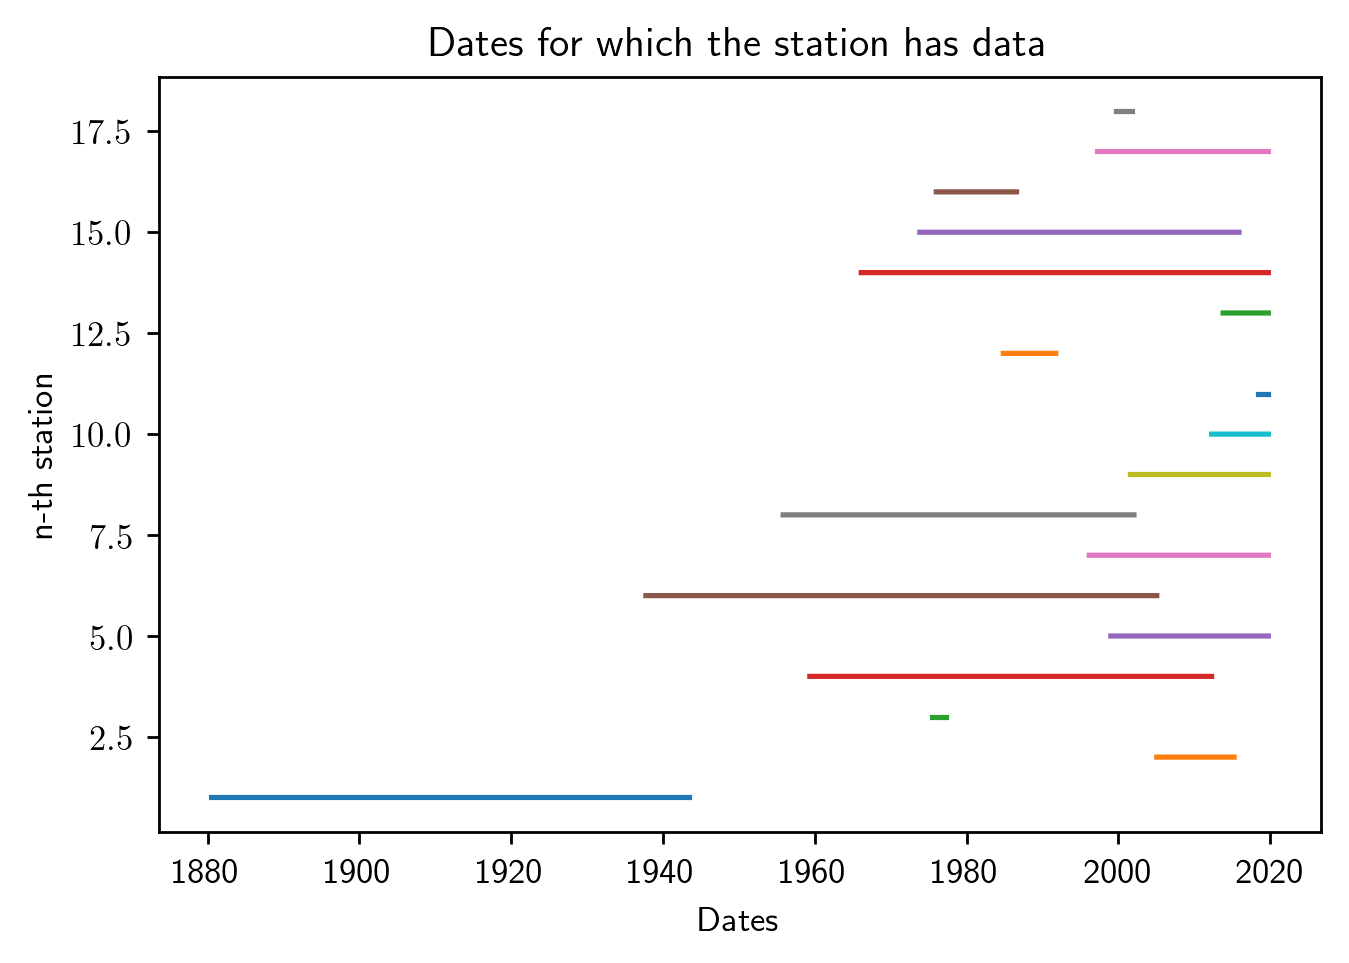

In [46]:
# Solution to Question 5.
for i, stations in enumerate(s):
    plt.plot(stations.dates, np.ones(len(stations.doy))+i)
    
plt.xlabel('Dates')
plt.ylabel('n-th station')
plt.title('Dates for which the station has data')

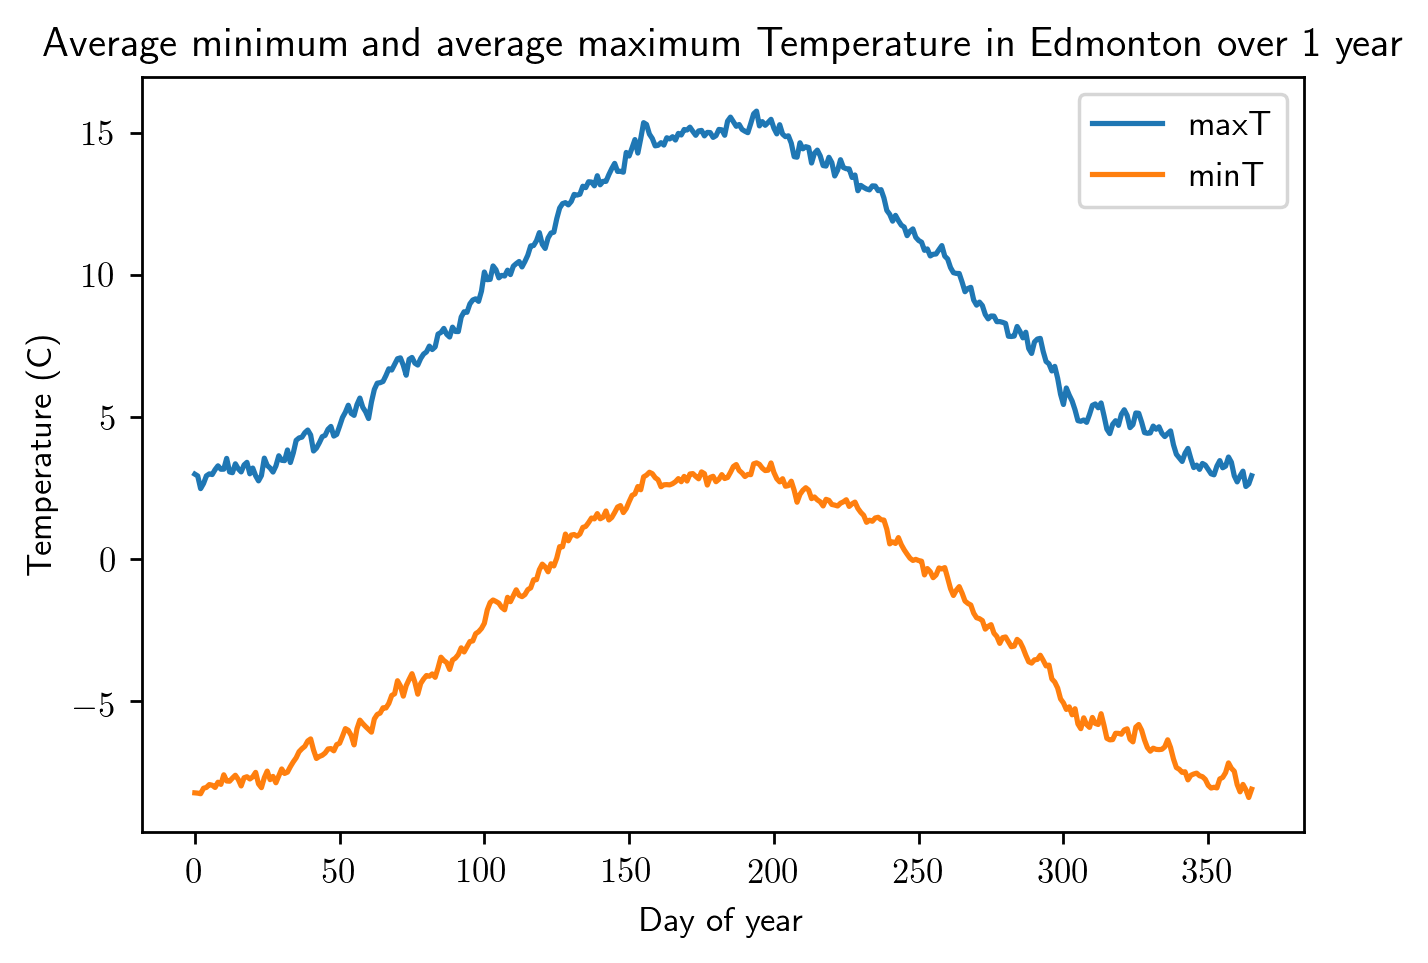

In [13]:
# Solutions to question 5 continued.

minT_all_stations = np.zeros(366) #initalize arrays
maxT_all_stations = np.zeros(366)

for day in range(0, 366):
    today_minT = [] #grab all minT for a single day.
    today_maxT = [] #grab all maxT for a single day.

    for stations in s: #Loop over all stations, and all days 
        for index, doy in enumerate(stations.doy): 
            if ((index-9)%366) == day:
                today_minT.append(stations.minT[index])
                today_maxT.append(stations.maxT[index])
    #print(day)
    minT_all_stations[day] = np.mean(np.array(today_minT)) #compute the mean for a single day and save the variables
    maxT_all_stations[day] = np.mean(np.array(today_maxT))
    
#Plot the average minimum and average maximum Temperature in Edmonton over 1 year, averaged over all stations
plt.title('Average minimum and average maximum Temperature in Edmonton over 1 year')

plt.plot(range(0, 366), maxT_all_stations, label='maxT')
plt.plot(range(0, 366), minT_all_stations, label='minT')
plt.xlabel('Day of year')
plt.ylabel('Temperature (C)')
plt.legend()

#### Grade breakdown
- Didn't account for the systematic errors (0/2)
- Found the averages for each of the dates (2/2)
- Plotted the average max and min temperature for a year (4/4)

##### Total (6/8)

## No-atmosphere model of heating and cooling

The atmosphere plays a critical role in weather and climate, but modelling it is difficult.  Anyone who has watched the weather forecast sees weather systems move into and out of regions and winds/fronts/ high and low pressure regions- all atmospheric phenomena.  However, we are going to see whether we can fit the data with a "no-atmosphere" model.  If there were no atmosphere, the the only source of heat would be solar radiation, and the only cooling would be from black body radiation.  We incorporate this as an ordinary differential equation.  

\begin{equation} \frac {dT}{dt}=\alpha F(t) - \beta T^4 \end{equation}

Here $T$ is the (absolute!)temperature since $T^4$ is the Stefan-Boltzman law, $t$ the time, $F$ the solar flux (in Watts/m$^2$) and $\alpha$ and $\beta$ are the parameters of the model that we will allow to fit.  If we were to calculate from first principles, $\alpha$ would include the reflectivity of the surface and the clouds , as well as the heat capacity per square meter of the layer of the earth/atmosphere that heat up and cool down.  Similarly, $\beta$ includes the Stefan-Boltzman constant, the emissivity of the earth, and the heat capacity.  So this model is quite simple.

However, it is still interesting to see how well such a simple average model can work.  Since everything in the model is independent of time (except for the orbit) our model does not allow any differences year to year or any difference between locations at the same latitude.  

To start the problem, I have modified the earth-sun solution from Problem Set 2 to include the rotation of the earth, which is important to calculate the solar flux at Edmonton.    This involves adding the vector from the center of the earth to Edmonton, $\vec{x_{Ed}}$ and solving the differential equation 
\begin{equation} \frac{d\vec{x_{Ed}}}{dt}=\vec{\omega} \times \vec{x_{Ed}}\end{equation} where $\vec{\omega}$ in the constant rotation vector of the earth.  

We start by finding the "north pole vector", which we know is aligned with the earth-sun vector on June 21 and December 21st.  If we look at the Horizon web page for Dec 22, we see that X~0, Y=1 at the solstice, and that the axial tilt (obliquity) is 23.4392911 degrees.  Thus $$\hat{n}=(0,\sin(23.4392911),\cos(23.4392911))\approx(0,0.398,0.918)$$ and $$\vec{\omega}=\frac{2\pi\hat{n}}{24\times 3600 \times 365.2425/366.2425}$$
(Notice here the factor 365.2425/366.2425- which converts from normal days to "sidereal days"; which take into account the fact that the earths revolution around the sun means noon-noon is a little longer than one rotation).

We pick $\vec{x_{Ed}}=\cos(53.55)(1,0,0)+\sin(53.55)\hat{n}$ at the solstice. (Only the latitude matters- in principle we need to set longitude as well, but in our model the longitude doesn't really matter).


We run the code below to generate the inputs to the flux calcuation- the sun-earth vector and the Edmonton vector.  We pick t to cover the year, with say 48 bins per day.

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
import datetime as dt
import time

GM=132712440041.93938e9 #m^3/s^2
GMEarth=398600.435436e9 #m^3/s^2
MEarth=5.97219e24 #kg
MSun=GM/GMEarth*MEarth  #  this keeps the mass ratio right, with most precise GM values!
AU=149597870700.0 #m (exactly)
D=24*3600.0 #s

#  Factors from Horizon web site at 2458839.916666667 = A.D. 2019-Dec-22 10:00:00.0000 TDB 
#  This is picked to be at the hour closest to the solstice- notice that the x position of earth is very small
x0=np.array([4.858434307587728E-04 *AU, 9.836920738092132E-01 *AU, -4.745398623388847E-05 *AU])
v0=np.array([-1.749013293502635E-02 *AU/D,-5.128449611745279E-05 *AU/D,  4.120640971206839E-07 *AU/D])
tilt=23.4392911/180*np.pi
n=np.array([0, np.sin(tilt),np.cos(tilt)])  # vector of earth's axis
omega=2*np.pi/(D*365.2425/366.2425)*n  #rotation axis
latitude=53.55/180*np.pi  # latitude of the "Edmonton" weather station
radius=6.37e6  #Earth's radius=6370 km from Horizons
x_ed0=radius*(np.array([np.cos(latitude),0,0])+np.sin(latitude)*n)  #Edmonton location at solstice (at least for some year!)
factor=(MSun+MEarth)/MSun  # to convert xe to earth-sun distance
xsun=np.array([0,0,0]) 

solarConstant=1367.6 #W/m**2 from Horizons.  At 1 AU

cm=MEarth*x0/(MEarth+MSun)
x=x0-cm #  x is distance wrt to the cm

vcm=MEarth*v0/(MEarth+MSun)  #velocity of CM
v=v0-vcm


def dvdt(xvArgument,t):
    xv=xvArgument.reshape(3,3)
    xearth_sun=factor*xv[0] #position wrt sun
    distance=np.sqrt(np.dot(xearth_sun,xearth_sun))
    v_ed=np.cross(omega,xv[2])  # velocity of Edmonton is omega x x_ed
    return np.array([xv[1],-GM/distance**3*xearth_sun,v_ed]).reshape(9)

spy=365.2425*24*3600
t=np.linspace(0,380*24*3600,380*48)  # 48 bins per day, starting December 22.  Go 380 days to cover whole next year
y0=np.array([x,v,x_ed0]).reshape(9)

run=False
if run:
    cpuT0=time.process_time()
    ephemeris = odeint(dvdt, y0, t,rtol=1e-12)
    print("CPU Time=",time.process_time()-cpuT0)
    np.save('problem3',ephemeris)
else:
    ephemeris=np.load('problem3.npy')



Write a function to calculate the Flux at any instant of time, from the output of this calculation.  To do this you will need to interpolate ephemeris (since it is only returned at discrete times).  

Ephemeris contains three vectors- the position of the earth wrt to CM, the velocity of the earth wrt CM, and the position of Edmonton with respect to the center of the earth.  

Once we have the three vectors, the flux is
\begin{equation} F(t)=\begin{cases}\phi_0 \frac{\vec{x_{Ed}} \cdot (\vec {x_s}-\vec{x_e})}{|\vec{x_{Ed}}| |\vec {x_s}-\vec{x_e}|} & \text{if } \vec{x_{Ed}} \cdot (\vec {x_s}-\vec{x_e})>0\\0 & \text{if } \vec{x_{Ed}} \cdot (\vec {x_s}-\vec{x_e})<0
\end{cases} \end{equation}

Plot your function versus date (for one year)



Text(0.5, 1.0, 'Solar flux in Edmonton for 1 year')

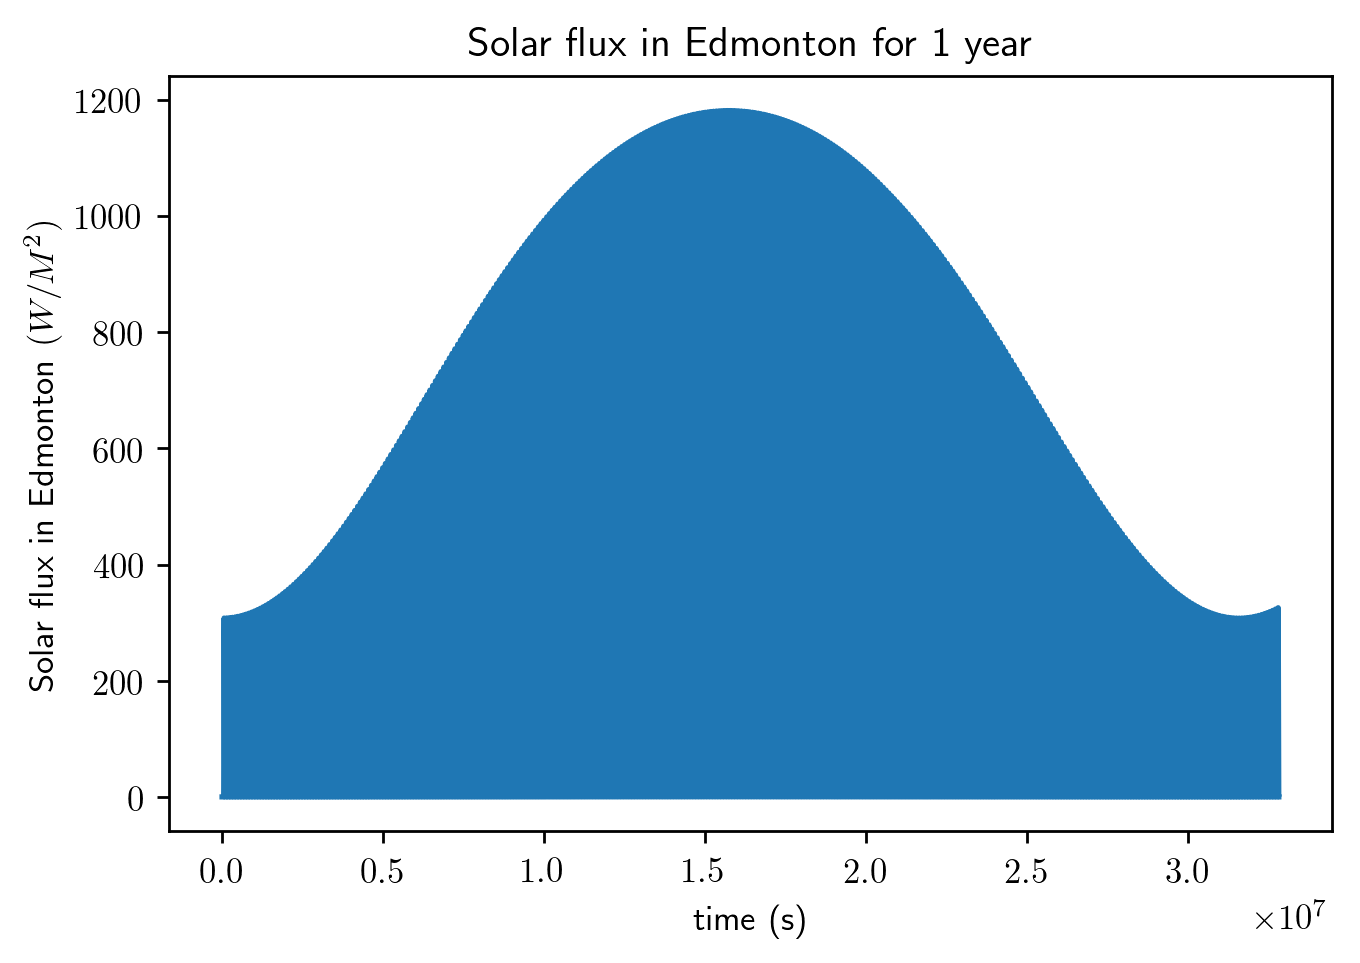

In [15]:
# Original plot

t = np.linspace(0,380*24*3600,380*48) 

# Flux function as defined above.
def flux(pos_earth_sun, pos_edmonton):    
    if np.dot(pos_earth_sun, pos_edmonton) > 0:
        return solarConstant*(np.dot(pos_earth_sun, pos_edmonton))/(np.linalg.norm(pos_earth_sun)*np.linalg.norm(pos_edmonton))
    else:
        return 0

#compute the flux for the discrete values of t.
flux_vals = []
for i,time in enumerate(t):
    pos_earth_sun = -ephemeris[i, 0:3] #Grab the position of the earth and sun. The negative sign is there to make sure in december, the temperature is minimum
    pos_edmonton = ephemeris[i, 6:9] #grab the position of edmonton
    flux_vals.append(flux(pos_earth_sun, pos_edmonton)) #compute the flux and save it.

#Plot the discretized flux
plt.plot(t, np.array(flux_vals))
plt.xlabel('time (s)')
plt.ylabel('Solar flux in Edmonton $(W/M^2)$')
plt.title('Solar flux in Edmonton for 1 year')

Text(0.5, 1.0, 'Interpolated solar flux in Edmonton for 1 year')

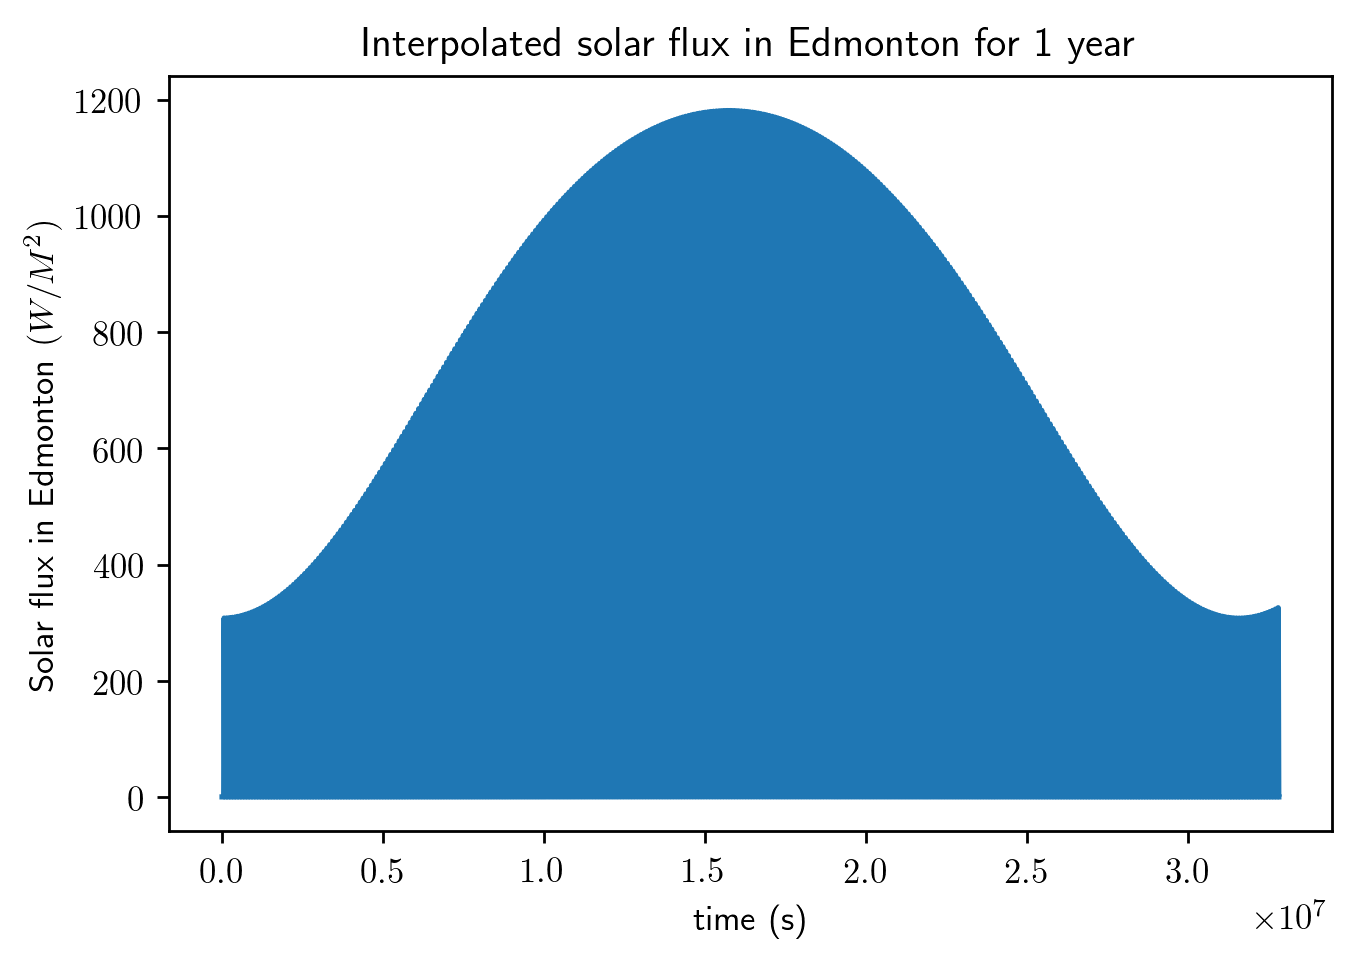

In [16]:
# Interpolated 

from scipy.interpolate import CubicSpline

t=np.linspace(0,380*24*3600,380*48)

#Interpolate using a cubic spline
flux_spline = CubicSpline(t, flux_vals)

#Plot the intepolated flux
plt.plot(t, flux_spline(t))
plt.xlabel('time (s)')
plt.ylabel('Solar flux in Edmonton $(W/M^2)$')
plt.title('Interpolated solar flux in Edmonton for 1 year')

Text(0.5, 1.0, 'Interpolated solar flux in Edmonton for a day in June 2019')

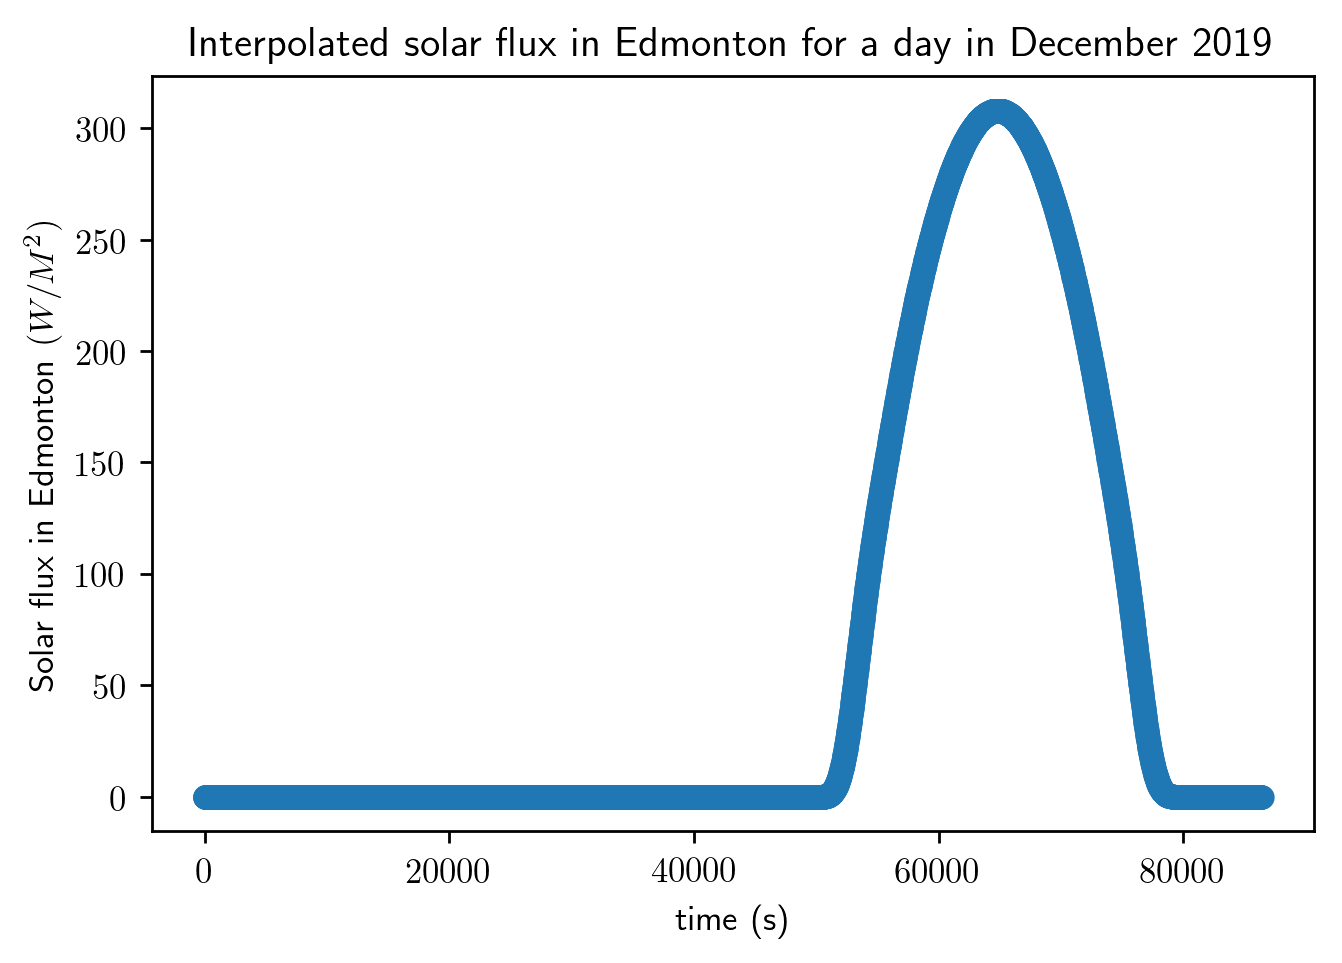

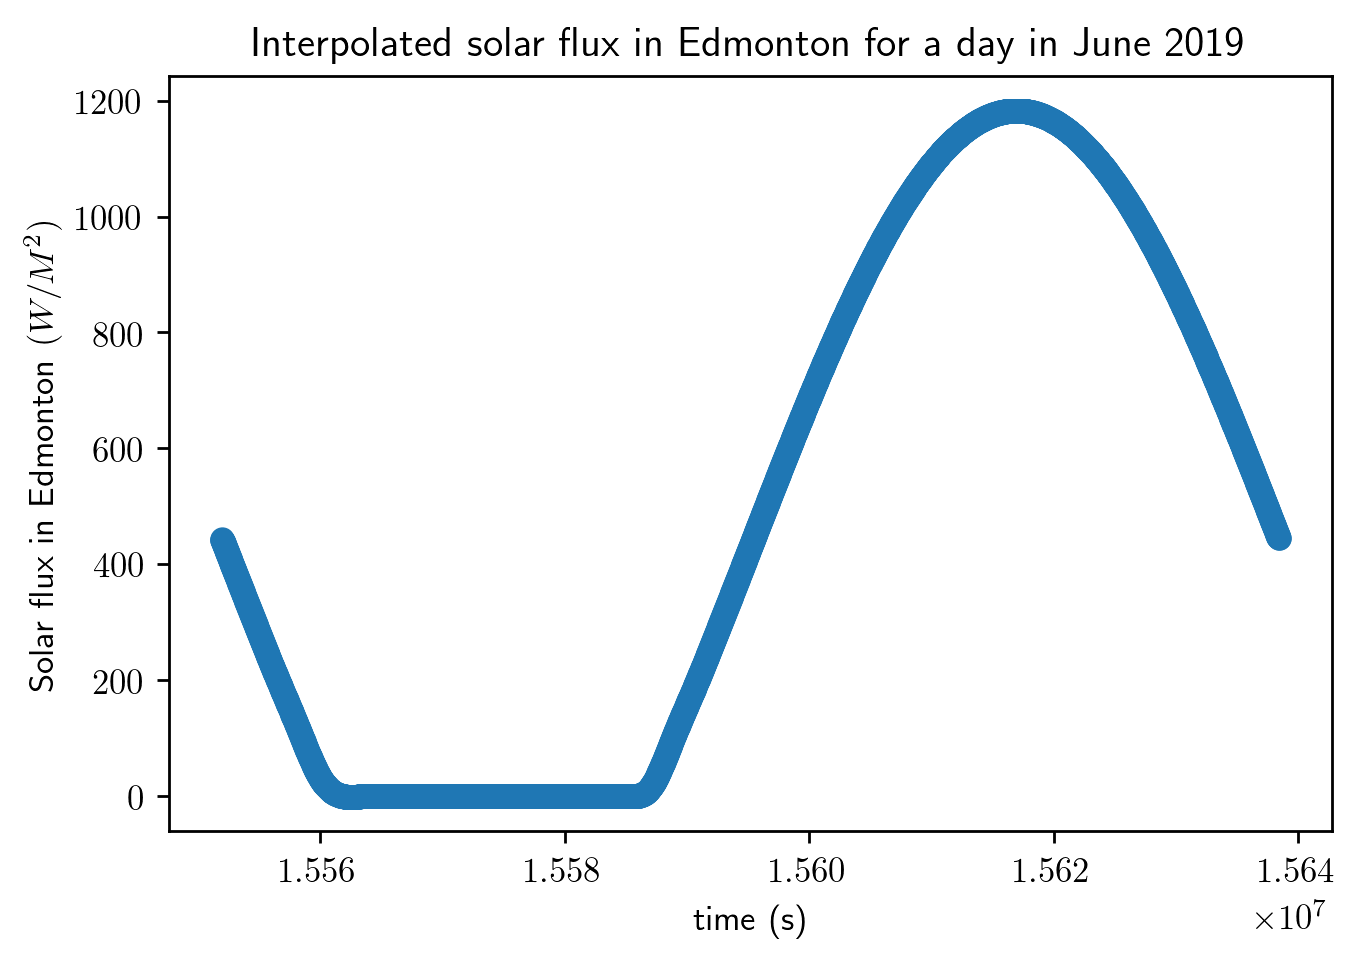

In [17]:
# Test out the interpolation by checking two days. One in decemeber and one in june.

plt.figure()

t_day = np.linspace(0, 24*3600, 24*200)

plt.scatter(t_day, flux_spline(t_day))
plt.xlabel('time (s)')
plt.ylabel('Solar flux in Edmonton $(W/M^2)$')
plt.title('Interpolated solar flux in Edmonton for a day in December 2019')

t_day = np.linspace(180*24*3600, 180*24*3600+24*3600, 24*200)

plt.figure()
plt.scatter(t_day, flux_spline(t_day))
plt.xlabel('time (s)')
plt.ylabel('Solar flux in Edmonton $(W/M^2)$')
plt.title('Interpolated solar flux in Edmonton for a day in June 2019')

Now write a model that integrates the ordinary differential equation:

\begin{equation} \frac {dT}{dt}=\alpha F(t) - \beta T^4 \end{equation}

using F(t) from the calculation of ephemeris.  

You will need to experiment to find values of $\alpha$ and $\beta$ that are semi-reasonable.  

Find the maximum and minimum temperature for each day from this model, and calculate the difference between this model and the data.

Fit the model to the data.  Plot the residuals.  Comment on the reasonableness of the fit.



loss is 4098443.697267187


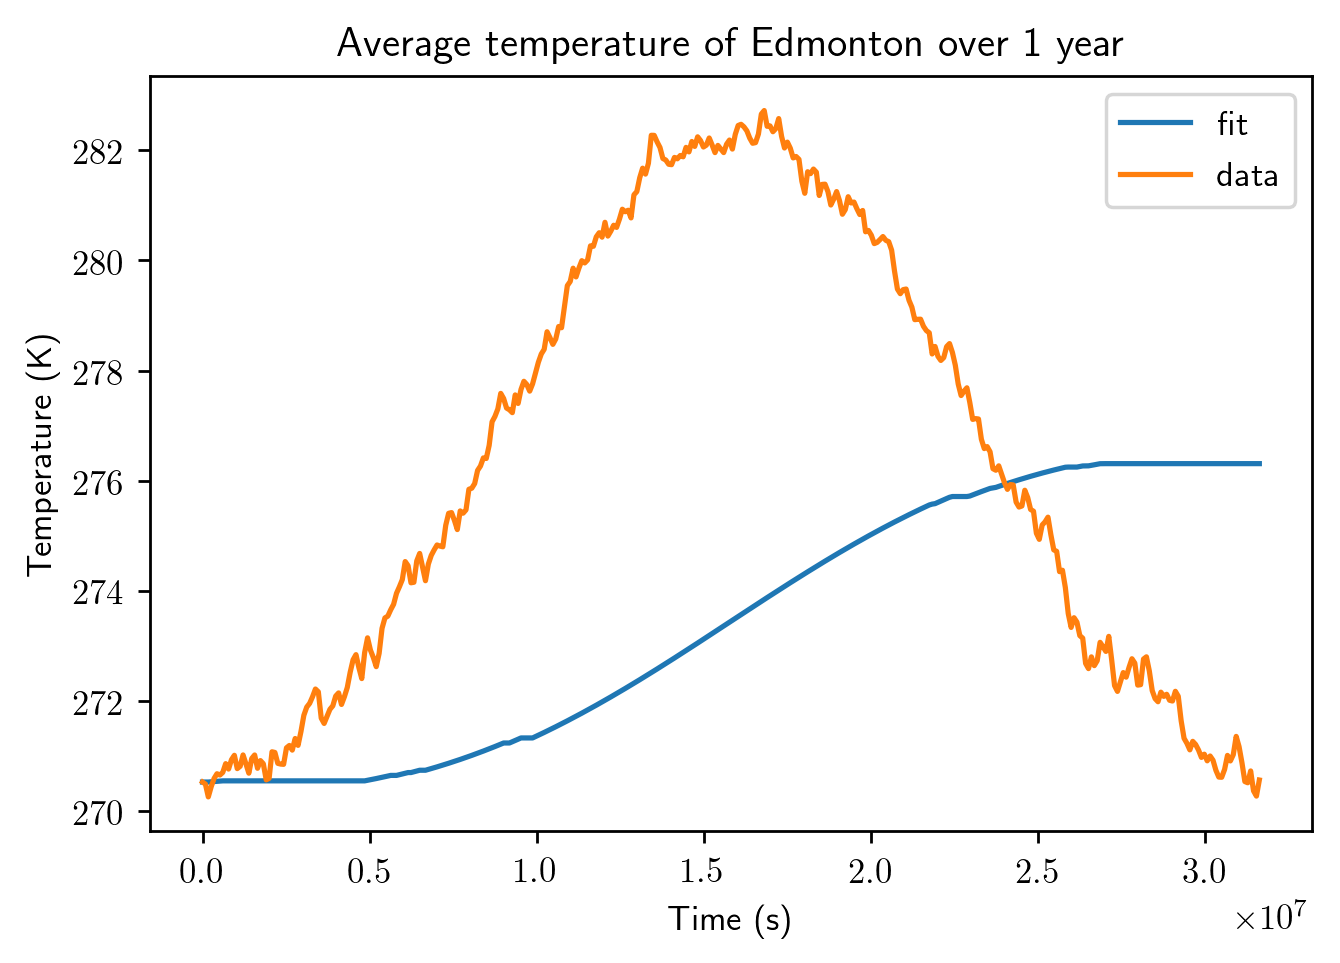

In [18]:
# Plot the graph for some alpha/beta

t=np.linspace(0,366*24*3600,366) #Change the number of points to 366 to better fit the data. 
averageT_Kelvin = (maxT_all_stations + minT_all_stations)/2 +273.15 #Compute the average Temperature for the data, in Kelvin
T0 = averageT_Kelvin[0] #First point of data

alpha, beta = np.array([7.99731445e-10, 5.42450055e-24]) #Fitted parameters

#Ode to integrate
def dTdt(T,t):    
    return alpha*flux_spline(t) - beta*T**4

T = odeint(dTdt, T0, t) #Solve ode
print(f'loss is {np.linalg.norm(T - averageT_Kelvin)**2}')

plt.title('Average temperature of Edmonton over 1 year')
plt.plot(t, T, label='fit')
plt.plot(t, averageT_Kelvin, label='data')
plt.ylabel('Temperature (K)')
plt.xlabel('Time (s)')
plt.legend()

Text(0.5, 0, 'Time (s)')

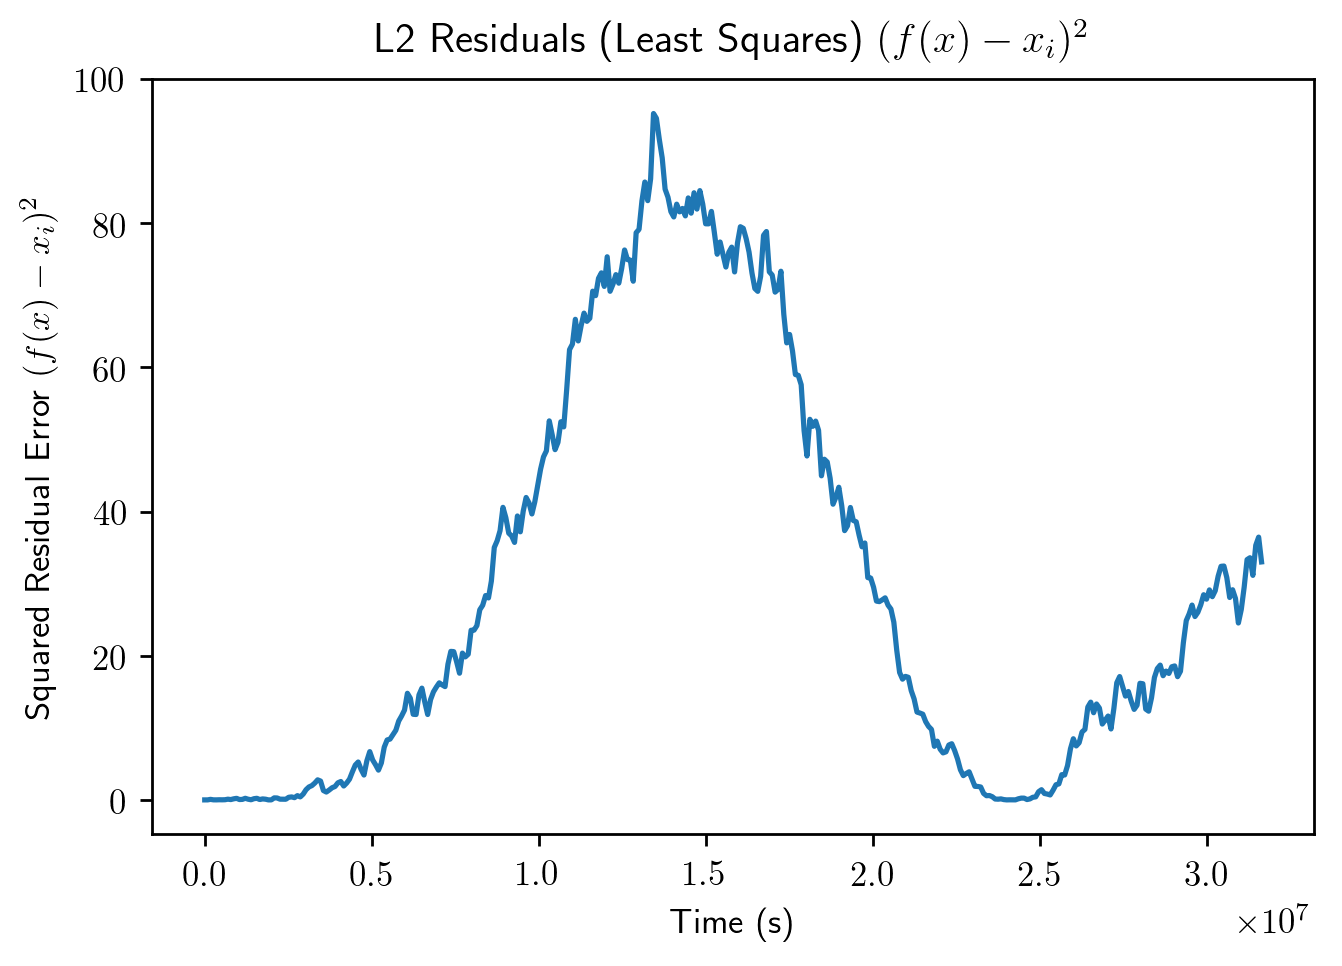

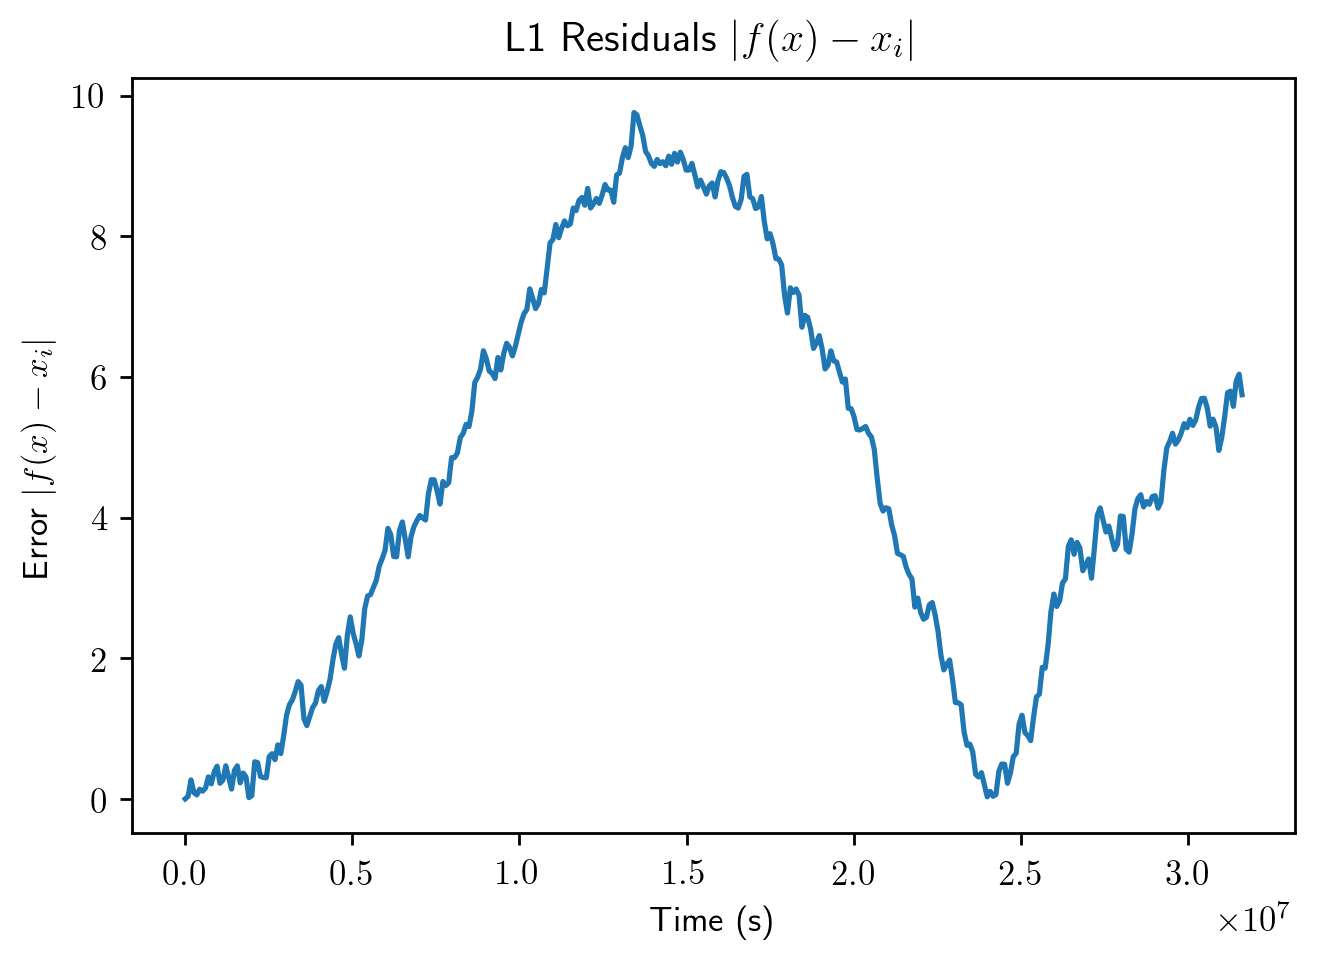

In [19]:
# Residuals

plt.plot(t, (T.reshape(366) - averageT_Kelvin)**2)
plt.title('L2 Residuals (Least Squares) $(f(x) - x_i)^2$')
plt.ylabel('Squared Residual Error $(f(x) - x_i)^2$')
plt.xlabel('Time (s)')

plt.figure()
plt.plot(t, np.abs(T.reshape(366) - averageT_Kelvin))
plt.title('L1 Residuals $|f(x) - x_i|$')
plt.ylabel('Error $|f(x) - x_i|$')
plt.xlabel('Time (s)')


In [20]:
# Find the minimum using brute force search

from tqdm import tqdm_notebook as tqdm

t = np.linspace(0,366*24*3600,366) #Change T to 366 days to match array shapes.
good_alpha = []
previous_loss = np.infty

for alpha in tqdm(np.logspace(-30, 30, num=50)):
    for beta in tqdm(np.logspace(-30, -30, num=50)):
        
        T = odeint(dTdt, T0, t) #Integrate T for some alpha beta
        loss = np.linalg.norm(T - averageT_Kelvin)**2 #Compute the least squares between data
        
        if loss < previous_loss: #If a better fit is found, keep it
            previous_loss = loss
            good_alpha.append((alpha, beta, loss))
            print('New minimum', (alpha, beta, loss))



ModuleNotFoundError: No module named 'tqdm'

In [ ]:
# Finding the minimum using Nelder-Mead Method

from scipy.optimize import minimize

def loss(args):
    alpha, beta = args
    
    t = np.linspace(0,380*24*3600,366)
    def dTdt(T,t):    
        return alpha*flux_spline(t) - beta*T**4
    T = odeint(dTdt, T0, t)
    cost = np.linalg.norm(T - averageT_Kelvin)**2
    print(cost)
    return cost

x0 = np.array([8e-10, 5.428675439323859e-24])
minimize(loss, x0, method='Nelder-Mead',options={'disp': True, 'maxiter':1000, 'adaptive': True})

## Comments on the reasonableness of the fit.

Based on my analysis the model is not a good model. I brute forced searched through alpha and beta in logspace(-30, 6) and it seems that the minimum parameters are visually not a good fit. The model fails to predict the peak and troughs in the temperature. 

From a physics point of view the model must fail: carbon dioxide and other greenhouse gases is what keeps the earth warm. When industry increased the amount of greenhouse gases, this caused global temperatures to increase by 1C. This is known as the **greenhouse effect** and is one of the main reasons why life exists on earth. Throughout my searches, our model is able to predict sinusoidal solutions but fail because they do not agree with the data or oscillating too rapidly. 

This makes sense: **without an atmosphere, the global temperature of the earth might end up like Mercury or Venus: Extremely hot days and cold nights. This implies that our best fit is simply due to luck, and thus does not model the data.** 

Furthermore, the loss function is very numerically unstable. This might be better improved by using a different loss function, but least squares is so standardized that it seems unlikely. The model could be improved by adding more complexity, however, I don't have the computing power to search through four parameters. It's possible that more powerful algorithms might help, but if a brute force search couldn't fit the data. 

A solid correction might be add in the atomsphere by adding more "damping terms", similar to the damped oscillator. I think the Earth cools like 9% of all heat is lost as going to space, the majority is absorbed by the ocean I think. Don't quote me on this, I am not an environment expert.

The following equation is probably wrong, but is just one of many ideas of adding more ways of losing heat. Maybe model heat absorbed into the ocean as a quadratic and linear term:

$$
\frac{dT}{dt} = \alpha F(t) - \beta T^4 - \gamma T^2 - \eta T
$$

The temperature might be more gradual, since the best fit for this equation will have a smaller beta and larger gamma/eta. This allows for more gradual changes and hence I would expect the solutions to be more smooth. This is good cause our algorithms can minimize better. I had a hard time minimizing since the parameter space was so bumpy.

-Zhi

#### Grade breakdown
- Calculated the flux hitting Edmonton (2/2)
- Plotted the flux hitting Edmonton as a function of time (2/2)
- Determined reasonable values of alpha/beta, explain where you got these values from (1/2)
- Integrated the alpha/beta function (2/2)
- Didn't find max/min temperature for each day in the model (0/2)
- Calculated the difference between the model and data (2/2)
- Plot the residuals (2/2)
- Discuss the fit (5/5)
##### Total (16/19)

(Optional) If you would like to experiment some more, we can add some elements to the model and see how the fit improves.  One can add 
feedback("clouds?") by making $\alpha$ and $\beta$ functions (first or second order polynomials) of T. You could also change $T^4$ to $(T-\Delta)^4$- basically saying the cooling infrared radiation doesn't come from the ground, but from higher in the atmosphere where the temperatures are colder.



In [ ]:
def loss_2(args):
    alpha1, alpha2, beta1, beta2 ,delta = args
    
    
    alphafunc = lambda T: alpha1 + alpha2*T
    betafunc = lambda T: beta1 + beta2*T
    
    
    t = np.linspace(0,380*24*3600,366)
    def dTdt(T,t):    
        return alphafunc(T)*flux_spline(t) - betafunc(T - delta)*T**4
    T = odeint(dTdt, T0, t)
    cost = np.linalg.norm(T - averageT_Kelvin)**2
    print(cost)
    return cost

In [ ]:
x0 = [8e-10, 0, 5.428675439323859e-24, 0, 0]


minimize(loss_2, x0, method='Nelder-Mead',options={'disp': True, 'maxiter':100000, 'adaptive': True})

# Seem like theres no improvement over current